In [1]:
import os, sys

module_path = os.path.abspath(os.path.join('../../'))

if module_path not in sys.path:
    sys.path.append(module_path)

from src.data_fcts import *
from src.retrain_fcts import *

from src.bench_fcts import *
from src.viz_fcts import *
from ast import literal_eval

/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


# List generate df functions

# List all results

4010 : comparative Shap backgrounds

In [2]:
results_path = os.environ.get("RESULTS_ROOT_PATH")+'/final_run'
print(results_path)

results = os.listdir(results_path)

/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/results//final_run


In [3]:
get_dataset_list(results)

['abrupt_concept_drift',
 'abrupt_concept_drift_noisy001',
 'abrupt_concept_drift_noisy01',
 'abrupt_concept_drift_noisy05',
 'abrupt_concept_drift_noisy1',
 'abrupt_concept_drift_noisy5',
 'abrupt_covariate',
 'abrupt_covariate_noisy001',
 'abrupt_covariate_noisy01',
 'abrupt_covariate_noisy05',
 'abrupt_covariate_noisy1',
 'abrupt_covariate_noisy5',
 'gradual_concept_drift',
 'gradual_concept_drift_noisy001',
 'gradual_concept_drift_noisy01',
 'gradual_concept_drift_noisy05',
 'gradual_concept_drift_noisy1',
 'gradual_concept_drift_noisy5',
 'nodrift_noisy',
 'nodrift_noisy001',
 'nodrift_noisy01',
 'nodrift_noisy05',
 'nodrift_noisy1',
 'nodrift_noisy5',
 'sine1_short',
 'sine1_short_noisy001',
 'sine1_short_noisy01',
 'sine1_short_noisy05',
 'sine1_short_noisy1',
 'sine1_short_noisy5',
 'sine2_short',
 'sine2_short_noisy001',
 'sine2_short_noisy01',
 'sine2_short_noisy05',
 'sine2_short_noisy1',
 'sine2_short_noisy5',
 'smooth_concept_drift',
 'smooth_concept_drift_noisy001',
 'smo

List of all datasets with some results

In [4]:
exp_list = {name: get_expe_list(name, results) for name in get_dataset_list(results)}
exp_list

{'abrupt_concept_drift': [3000],
 'abrupt_concept_drift_noisy001': [3000],
 'abrupt_concept_drift_noisy01': [3000],
 'abrupt_concept_drift_noisy05': [3000],
 'abrupt_concept_drift_noisy1': [3000],
 'abrupt_concept_drift_noisy5': [3000],
 'abrupt_covariate': [3000],
 'abrupt_covariate_noisy001': [3000],
 'abrupt_covariate_noisy01': [3000],
 'abrupt_covariate_noisy05': [3000],
 'abrupt_covariate_noisy1': [3000],
 'abrupt_covariate_noisy5': [3000],
 'gradual_concept_drift': [3000],
 'gradual_concept_drift_noisy001': [3000],
 'gradual_concept_drift_noisy01': [3000],
 'gradual_concept_drift_noisy05': [3000],
 'gradual_concept_drift_noisy1': [3000],
 'gradual_concept_drift_noisy5': [3000],
 'nodrift_noisy': [3000],
 'nodrift_noisy001': [3000],
 'nodrift_noisy01': [3000],
 'nodrift_noisy05': [3000],
 'nodrift_noisy1': [3000],
 'nodrift_noisy5': [3000],
 'sine1_short': [3000],
 'sine1_short_noisy001': [3000],
 'sine1_short_noisy01': [3000],
 'sine1_short_noisy05': [3000],
 'sine1_short_noisy1'

# List generate df functions

In [5]:
all_noises = [0, 0.001, 0.01, 0.05, 0.1, 0.5]

In [6]:
n_samples = 3000
n_features = 4

In [7]:

def generate_smooth_concept_drift(n_samples = n_samples, n_features = n_features):
    D_G = Drift_generators(n_samples = n_samples, n_features = n_features)
    D_G.smooth_concept_drift(n_drift=1)
    return(D_G)

def generate_abrupt_concept_drift(n_samples = n_samples, n_features = n_features):
    D_G = Drift_generators(n_samples = n_samples, n_features = n_features)
    D_G.abrupt_concept_drift(n_drift=1)
    return(D_G)

def generate_gradual_concept_drift(n_samples = n_samples, n_features = n_features):
    D_G = Drift_generators(n_samples = n_samples, n_features = n_features)
    D_G.gradual_concept_drift(n_drift=1)
    return(D_G)

def generate_abrupt_covariate_drift(n_samples = n_samples, n_features = n_features):
    D_G = Drift_generators(n_samples = n_samples, n_features = n_features)
    d_centers = [(0, 0,
    0.3, 0.25, 1),(0, 0.3, 0.5, 0, 0.25),(0, 0.5, 1, 0.25, 1)]
    D_G.abrupt_covariate_drift(d_centers=d_centers)
    return(D_G)

normal_fcts = [generate_smooth_concept_drift, generate_abrupt_concept_drift,
               generate_gradual_concept_drift, generate_abrupt_covariate_drift]



In [8]:

generate_drift_fcts = []
for noise_rate in all_noises:
    # NOISY 
    def generate_noisy_smooth_concept_drift(n_samples = n_samples, noise_rate=noise_rate):
        D_G = Drift_generators(n_samples = n_samples, n_features = n_features)
        D_G.smooth_concept_drift(n_drift=1)
        D_G.add_noise(noise_rate=noise_rate)
        return(D_G)

    def generate_noisy_abrupt_concept_drift(n_samples = n_samples, noise_rate=noise_rate):
        D_G = Drift_generators(n_samples = n_samples, n_features = n_features)
        D_G.abrupt_concept_drift(n_drift=1)
        D_G.add_noise(noise_rate=noise_rate)
        return(D_G)

    def generate_noisy_gradual_concept_drift(n_samples = n_samples, noise_rate=noise_rate):
        D_G = Drift_generators(n_samples = n_samples, n_features = n_features)
        D_G.gradual_concept_drift(n_drift=1)
        D_G.add_noise(noise_rate=noise_rate)
        return(D_G)

    def generate_noisy_abrupt_covariate_drift(n_samples = n_samples, noise_rate=noise_rate):
        D_G = Drift_generators(n_samples = n_samples, n_features = n_features)
        d_centers = [(0, 0,
                    0.3, 0.25, 1),(0, 0.3, 0.5, 0, 0.25),(0, 0.5, 1, 0.25, 1)]
        D_G.abrupt_covariate_drift(d_centers=d_centers)
        D_G.add_noise(noise_rate=noise_rate)
        return(D_G)



            #generate_noisy_smooth_concept_drift
    noisy_fcts = [generate_noisy_smooth_concept_drift, generate_noisy_abrupt_concept_drift, generate_noisy_abrupt_covariate_drift,
                generate_noisy_gradual_concept_drift],
                 #generate_noisy_abrupt_covariate_drift]
                #generate_noisy_sine1, generate_noisy_sine2, generate_noisy_stagger]
    generate_drift_fcts += noisy_fcts


In [9]:

list_df_generate_fcts_special = []
for noise_rate in all_noises:
    # NOISY 
    def generate_noisy_stagger(noise_rate=noise_rate):
        D_G = Drift_generators()
        D_G.load_df("stagger_short")
        D_G.add_noise(noise_rate=noise_rate)
        return(D_G)
#
    def generate_noisy_sine1(noise_rate=noise_rate):
        D_G = Drift_generators()
        D_G.load_df("sine1_short")
        D_G.add_noise(noise_rate=noise_rate)
        return(D_G)
#
    def generate_noisy_sine2(noise_rate=noise_rate):
        D_G = Drift_generators()
        D_G.load_df("sine2_short")
        D_G.add_noise(noise_rate=noise_rate)
        return(D_G)

    noisy_fcts = [generate_noisy_stagger, generate_noisy_sine1, generate_noisy_sine2],
    list_df_generate_fcts_special += noisy_fcts


In [10]:

generate_nodrift_fcts = []
for noise_rate in all_noises:
    # NOISY 
    def generate_nodrift_df(noise_rate=noise_rate):

        D_G = Drift_generators(n_samples = n_samples, n_features = n_features)
        D_G.abrupt_concept_drift(drifts=[Drift(is_abrupt=True,
                                    start=n_samples-2,
                                    characteristic=[0.7-0.3*(0 % 2) for i in range(D_G.n_features)])])
        D_G.add_noise(noise_rate=noise_rate)
        D_G.drift_name = f"nodrift_noisy{str(noise_rate)[2:]}"
        
        return(D_G)
    generate_nodrift_fcts += [generate_nodrift_df]

In [11]:
all_fcts_selected = [a+b for a,b in zip(list_df_generate_fcts_special, generate_drift_fcts)]
all_fcts_selected = [a+[b] for a,b in zip(all_fcts_selected, generate_nodrift_fcts)]

In [12]:
all_fcts_selected

[[<function __main__.generate_noisy_stagger(noise_rate=0)>,
  <function __main__.generate_noisy_sine1(noise_rate=0)>,
  <function __main__.generate_noisy_sine2(noise_rate=0)>,
  <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0)>,
  <function __main__.generate_noisy_abrupt_concept_drift(n_samples=3000, noise_rate=0)>,
  <function __main__.generate_noisy_abrupt_covariate_drift(n_samples=3000, noise_rate=0)>,
  <function __main__.generate_noisy_gradual_concept_drift(n_samples=3000, noise_rate=0)>,
  <function __main__.generate_nodrift_df(noise_rate=0)>],
 [<function __main__.generate_noisy_stagger(noise_rate=0.001)>,
  <function __main__.generate_noisy_sine1(noise_rate=0.001)>,
  <function __main__.generate_noisy_sine2(noise_rate=0.001)>,
  <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0.001)>,
  <function __main__.generate_noisy_abrupt_concept_drift(n_samples=3000, noise_rate=0.001)>,
  <function __main__.generate_noi

# Show df metrics

In [13]:
list_df_generate_fcts = np.ravel(all_fcts_selected)
nodrift_funcs = generate_nodrift_fcts

In [14]:
D_G = list_df_generate_fcts[3]()
print(D_G.drift_name)
results = os.listdir(results_path)

smooth concept drift


In [15]:
[x for x in results if "nodrift" in x]

['nodrift_noisy05_3000_df_reset_PH.csv',
 'nodrift_noisy001_3000_df_reset_ADWIN.csv',
 'nodrift_noisy5_3000_df_reset_ADWIN.csv',
 'nodrift_noisy5_3000_df_reset_KSWIN.csv',
 'nodrift_noisy05_3000_df_reset_ADWIN.csv',
 'nodrift_noisy01_3000_df_reset_KSWIN.csv',
 'nodrift_noisy1_3000_df_reset_ADWIN.csv',
 'nodrift_noisy01_3000_df_reset_ADWIN.csv',
 'nodrift_noisy1_3000_df_reset_KSWIN.csv',
 'nodrift_noisy05_3000_df_reset_KSWIN.csv',
 'nodrift_noisy5_3000_df_reset_PH.csv',
 'nodrift_noisy_3000_df_reset_ADWIN.csv',
 'nodrift_noisy1_3000_df_reset_PH.csv',
 'nodrift_noisy_3000_df_reset_PH.csv',
 'nodrift_noisy01_3000_df_reset_PH.csv',
 'nodrift_noisy_3000_df_reset_KSWIN.csv',
 'nodrift_noisy001_3000_df_reset_KSWIN.csv',
 'nodrift_noisy001_3000_df_reset_PH.csv']

In [16]:
D_G.drift_name.replace(" ", "_")

'smooth_concept_drift'

In [17]:
all_df_metrics = get_D_G_metrics(D_G, results, selected_methods = ["ADWIN", "PH", "KSWIN"],
                                  exp_type="df_reset", noisy = True, path = results_path+"/")

In [18]:
all_df_metrics

retrain_adwin  retrain_adwin_shap   retrain_PH  retrain_PH_shap  \
no                0.000000            0.000000     0.000000         0.000000   
false             0.000000            0.000000     0.000000         0.000000   
TP                1.000000            1.000000     1.000000         1.000000   
prec              1.000000            1.000000     1.000000         1.000000   
mean           1362.180000         1551.820000  1471.880000      1524.800000   
mean_true       362.180000          551.820000   471.880000       524.800000   
median         1374.000000         1550.000000  1472.500000      1529.500000   
median_true     374.000000          550.000000   472.500000       529.500000   
max            1518.000000         1827.000000  1581.000000      1664.000000   
max_true        518.000000          827.000000   581.000000       664.000000   
min            1249.000000         1187.000000  1385.000000      1308.000000   
min_true        249.000000          187.000000   385.000000       308.000000   
std              67.025639          138.912495    48.109416        67.101203   
std_true         67.025639          138.912495    48.109416        67.101203   

             retrain_KSWIN  retrain_KSWIN_shap  
no                0.440000            0.740000  
false             0.000000            0.000000  
TP                0.560000            0.260000  
prec              1.000000            1.000000  
mean           2065.392857         1866.153846  
mean_true      1065.392857          866.153846  
median         2025.000000         1877.000000  
median_true    1025.000000          877.000000  
max            2877.000000         2541.000000  
max_true       1877.000000         1541.000000  
min            1371.000000         1270.000000  
min_true        371.000000          270.000000  
std             422.552328          290.341996  
std_true        422.552328          290.341996

In [19]:
metrics_list = ['no', 'false', 'min','mean', 'median', 'median_true', 'max', 'std']

In [20]:
all_df_metrics.loc[metrics_list].T.sort_values(["no","false","median"])

no  false     min         mean  median  median_true  \
retrain_adwin       0.00    0.0  1249.0  1362.180000  1374.0        374.0   
retrain_PH          0.00    0.0  1385.0  1471.880000  1472.5        472.5   
retrain_PH_shap     0.00    0.0  1308.0  1524.800000  1529.5        529.5   
retrain_adwin_shap  0.00    0.0  1187.0  1551.820000  1550.0        550.0   
retrain_KSWIN       0.44    0.0  1371.0  2065.392857  2025.0       1025.0   
retrain_KSWIN_shap  0.74    0.0  1270.0  1866.153846  1877.0        877.0   

                       max         std  
retrain_adwin       1518.0   67.025639  
retrain_PH          1581.0   48.109416  
retrain_PH_shap     1664.0   67.101203  
retrain_adwin_shap  1827.0  138.912495  
retrain_KSWIN       2877.0  422.552328  
retrain_KSWIN_shap  2541.0  290.341996

In [21]:

D_G = list_df_generate_fcts[3]()
print(D_G.drift_name)


results = os.listdir(results_path)
all_df_metrics = get_D_G_metrics(D_G, results, selected_methods = ["ADWIN", "PH", "KSWIN"], 
                exp_type="df_reset", noisy=True, path =results_path+"/")
metrics_list = ['no', 'false', 'min','mean', 'median', 'median_true', 'max', 'std']
all_df_metrics.loc["median"] = all_df_metrics.loc["median"]-D_G.drift_points[0]
all_df_metrics.loc["mean"] = all_df_metrics.loc["mean"]-D_G.drift_points[0]
all_df_metrics.loc[metrics_list].T.sort_values(["no","false","median"]).sort_index()


smooth concept drift


no  false     min         mean  median  median_true  \
retrain_KSWIN       0.44    0.0  1371.0  1065.392857  1025.0       1025.0   
retrain_KSWIN_shap  0.74    0.0  1270.0   866.153846   877.0        877.0   
retrain_PH          0.00    0.0  1385.0   471.880000   472.5        472.5   
retrain_PH_shap     0.00    0.0  1308.0   524.800000   529.5        529.5   
retrain_adwin       0.00    0.0  1249.0   362.180000   374.0        374.0   
retrain_adwin_shap  0.00    0.0  1187.0   551.820000   550.0        550.0   

                       max         std  
retrain_KSWIN       2877.0  422.552328  
retrain_KSWIN_shap  2541.0  290.341996  
retrain_PH          1581.0   48.109416  
retrain_PH_shap     1664.0   67.101203  
retrain_adwin       1518.0   67.025639  
retrain_adwin_shap  1827.0  138.912495

In [22]:
res_to_latex(all_df_metrics)

\begin{tabular}{|l|l|l|l|l|l|}
\hline
{} & d\_rate &    FP &  mean &   med &  std \\\hline

adwin      &   1.00 &  0.00 &   362 &   374 &   67 \\\hline
PH         &   1.00 &  0.00 &   472 &   472 &   48 \\\hline
PH\_shap    &   1.00 &  0.00 &   525 &   530 &   67 \\\hline
adwin\_shap &   1.00 &  0.00 &   552 &   550 &  139 \\\hline
KSWIN      &   0.56 &  0.00 &  1065 &  1025 &  423 \\\hline
KSWIN\_shap &   0.26 &  0.00 &   866 &   877 &  290 \\\hline

\end{tabular}



In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


# Performance

In [23]:
list_df_generate_fcts

array([<function generate_noisy_stagger at 0x7f11d5c758b0>,
       <function generate_noisy_sine1 at 0x7f124004e940>,
       <function generate_noisy_sine2 at 0x7f11d5c1daf0>,
       <function generate_noisy_smooth_concept_drift at 0x7f11d5c75940>,
       <function generate_noisy_abrupt_concept_drift at 0x7f11d5c75af0>,
       <function generate_noisy_abrupt_covariate_drift at 0x7f11d5c75c10>,
       <function generate_noisy_gradual_concept_drift at 0x7f11d5c75b80>,
       <function generate_nodrift_df at 0x7f11d5c244c0>,
       <function generate_noisy_stagger at 0x7f11d5c1dc10>,
       <function generate_noisy_sine1 at 0x7f11d5c1dca0>,
       <function generate_noisy_sine2 at 0x7f11d5c1dd30>,
       <function generate_noisy_smooth_concept_drift at 0x7f11d5c75ca0>,
       <function generate_noisy_abrupt_concept_drift at 0x7f11d5c1d040>,
       <function generate_noisy_abrupt_covariate_drift at 0x7f11d5c1d160>,
       <function generate_noisy_gradual_concept_drift at 0x7f11d5c1d0d0>,
 

In [24]:
single_drift = [f for f in nodrift_funcs if "nodrift" in f.__name__]#[:3]
single_drift

[<function __main__.generate_nodrift_df(noise_rate=0)>,
 <function __main__.generate_nodrift_df(noise_rate=0.001)>,
 <function __main__.generate_nodrift_df(noise_rate=0.01)>,
 <function __main__.generate_nodrift_df(noise_rate=0.05)>,
 <function __main__.generate_nodrift_df(noise_rate=0.1)>,
 <function __main__.generate_nodrift_df(noise_rate=0.5)>]

In [25]:
D_G = single_drift[-1]()
print(D_G.drift_name)
results = os.listdir(results_path)

all_df_metrics = get_D_G_metrics(D_G, results, selected_methods = ["ADWIN", "PH", "KSWIN"],
                        exp_type="noisy", noisy = True, path=results_path+"/")

metrics_list = ['no', 'false', 'min','mean', 'median', 'median_true', 'max', 'std']

all_df_metrics.loc[metrics_list].T.sort_values(["no","false","median"]).sort_index()

invalid value encountered in scalar divide
invalid value encountered in scalar divide


nodrift_noisy5


no  false     min         mean  median  median_true  \
retrain_KSWIN_0.5       0.14   0.86   598.0  1595.604651  1415.0          NaN   
retrain_KSWIN_shap_0.5  0.98   0.02  1707.0  1707.000000  1707.0          NaN   
retrain_PH_0.5          0.84   0.16  1489.0  2125.625000  2197.5          NaN   
retrain_PH_shap_0.5     1.00   0.00     NaN          NaN     NaN          NaN   
retrain_adwin_0.5       0.92   0.08   736.0  1757.000000  1900.5          NaN   
retrain_adwin_shap_0.5  1.00   0.00     NaN          NaN     NaN          NaN   

                           max         std  
retrain_KSWIN_0.5       2960.0  765.826013  
retrain_KSWIN_shap_0.5  1707.0         NaN  
retrain_PH_0.5          2739.0  386.287065  
retrain_PH_shap_0.5        NaN         NaN  
retrain_adwin_0.5       2491.0  866.160493  
retrain_adwin_shap_0.5     NaN         NaN

# Get Global overview 

In [26]:

D_G = list_df_generate_fcts[0]()
print(D_G.drift_name)


results = os.listdir(results_path)
all_df_metrics = get_D_G_metrics(D_G, results, selected_methods = ["ADWIN", "PH", "KSWIN"], 
                exp_type="df_reset", noisy=True, path =results_path+"/")
metrics_list = ['prec','no', 'false', 'min','mean', 'median', 'median_true', 'max', 'std']
all_df_metrics.loc["median"] = all_df_metrics.loc["median"]-D_G.drift_points[0]
all_df_metrics.loc["mean"] = all_df_metrics.loc["mean"]-D_G.drift_points[0]
all_df_metrics.loc[metrics_list].T.sort_values(["prec","median"])#.sort_index()


stagger_short


prec   no  false     min    mean  median  median_true  \
retrain_PH_shap      0.5  0.0    0.5   914.0 -317.26  -205.0         44.0   
retrain_KSWIN        1.0  0.0    0.0  2020.0   22.90    23.0         23.0   
retrain_adwin        1.0  0.0    0.0  2063.0   63.00    63.0         63.0   
retrain_PH           1.0  0.0    0.0  2094.0   94.00    94.0         94.0   
retrain_KSWIN_shap   1.0  0.0    0.0  2078.0   95.38    95.0         95.0   
retrain_adwin_shap   1.0  0.0    0.0  2069.0  113.70   109.0        109.0   

                       max         std  
retrain_PH_shap     2058.0  411.779702  
retrain_KSWIN       2027.0    1.541931  
retrain_adwin       2063.0    0.000000  
retrain_PH          2094.0    0.000000  
retrain_KSWIN_shap  2123.0   10.790945  
retrain_adwin_shap  2164.0   21.096716

In [27]:
all_df_metrics.loc['prec', all_df_metrics.columns]

retrain_adwin         1.0
retrain_adwin_shap    1.0
retrain_PH            1.0
retrain_PH_shap       0.5
retrain_KSWIN         1.0
retrain_KSWIN_shap    1.0
Name: prec, dtype: float64

In [28]:
def get_drift_type_from_name(drift_name):
    drift_type = drift_name
    if("sine" not in drift_type):
        drift_type = "".join(["" if x.isdigit() else x for x in drift_type ])
    if("noisy" in drift_type):
        drift_type = "".join(drift_type.split("noisy")[:-1])
    drift_type = drift_type.replace(" ","_")
    if(drift_type[-1] == "_"):
        drift_type = drift_type[:-1]
    return(drift_type)

In [29]:
df_scenario_prec = pd.DataFrame(index = [f().drift_name for f in list_df_generate_fcts],
                            columns = ["_".join(x.split("_")[:-1])  if any([a.isdigit() for a in x]) else x for x in  all_df_metrics.columns])
df_scenario_med = pd.DataFrame(index = [f().drift_name for f in list_df_generate_fcts],
                    columns = ["_".join(x.split("_")[:-1])  if any([a.isdigit() for a in x]) else x for x in  all_df_metrics.columns])
for i, f in enumerate(list_df_generate_fcts):
    D_G = f()
    results = os.listdir(results_path)
    all_df_metrics = get_D_G_metrics(D_G, results, selected_methods = ["ADWIN", "PH", "KSWIN"], 
                    exp_type="df_reset", noisy=True, path =results_path+"/")
    noiseless_columns = ["_".join(x.split("_")[:-1])  if any([a.isdigit() for a in x]) else x for x in  all_df_metrics.columns]
    precisions = all_df_metrics.loc['TP', all_df_metrics.columns].values
    medians = all_df_metrics.loc['median', all_df_metrics.columns].values
    df_scenario_med.loc[D_G.drift_name, noiseless_columns] = medians
    df_scenario_prec.loc[D_G.drift_name, noiseless_columns] = precisions
    
    df_scenario_prec.loc[D_G.drift_name,"noise_rate"] = D_G.noise_rate
    df_scenario_med.loc[D_G.drift_name,"noise_rate"]  = D_G.noise_rate
    df_scenario_prec.loc[D_G.drift_name,"drift_type"] = get_drift_type_from_name(D_G.drift_name)
    df_scenario_med.loc[D_G.drift_name,"drift_type"]  = get_drift_type_from_name(D_G.drift_name)
    

invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide


In [30]:
df_scenario_med.head(3)

retrain_adwin retrain_adwin_shap retrain_PH retrain_PH_shap  \
stagger_short        2063.0             2109.0     2094.0          1795.0   
sine1_short          1027.0             1043.0     1066.0          1033.0   
sine2_short          1025.0             1033.0     1073.0          1023.0   

              retrain_KSWIN retrain_KSWIN_shap  noise_rate     drift_type  
stagger_short        2023.0             2095.0         0.0  stagger_short  
sine1_short          1007.0             1096.0         0.0    sine1_short  
sine2_short          1015.0             1086.0         0.0    sine2_short

In [31]:
df_scenario_prec.head(3)

retrain_adwin retrain_adwin_shap retrain_PH retrain_PH_shap  \
stagger_short           1.0                1.0        1.0             0.5   
sine1_short             1.0                1.0        1.0             1.0   
sine2_short             1.0                1.0        1.0             1.0   

              retrain_KSWIN retrain_KSWIN_shap  noise_rate     drift_type  
stagger_short           1.0                1.0         0.0  stagger_short  
sine1_short             1.0                1.0         0.0    sine1_short  
sine2_short             1.0                1.0         0.0    sine2_short

## Precision

In [32]:
df_scenario_prec.loc[[x for x in df_scenario_prec.index if "covariate" in x]]

retrain_adwin retrain_adwin_shap retrain_PH  \
abrupt covariate                    0.9               0.94       0.38   
abrupt covariate noisy001           0.9                1.0        0.6   
abrupt covariate noisy01           0.94               0.98       0.42   
abrupt covariate noisy05           0.74               0.94       0.42   
abrupt covariate noisy1             0.5               0.72       0.34   
abrupt covariate noisy5            0.14               0.08        0.2   

                          retrain_PH_shap retrain_KSWIN retrain_KSWIN_shap  \
abrupt covariate                     0.94           0.0                1.0   
abrupt covariate noisy001            0.88          0.02                1.0   
abrupt covariate noisy01             0.76          0.02                1.0   
abrupt covariate noisy05             0.54          0.04               0.98   
abrupt covariate noisy1              0.32           0.2               0.98   
abrupt covariate noisy5               0.0          0.52               0.26   

                           noise_rate        drift_type  
abrupt covariate                0.000  abrupt_covariate  
abrupt covariate noisy001       0.001  abrupt_covariate  
abrupt covariate noisy01        0.010  abrupt_covariate  
abrupt covariate noisy05        0.050  abrupt_covariate  
abrupt covariate noisy1         0.100  abrupt_covariate  
abrupt covariate noisy5         0.500  abrupt_covariate

In [33]:
df_scenario_prec = df_scenario_prec.drop([x for x in df_scenario_prec.index if "stagger_short" in x])
df_scenario_prec = df_scenario_prec.drop([x for x in df_scenario_prec.index if "nodrift" in x])

In [34]:
sorted(df_scenario_prec.noise_rate.unique())

[0.0, 0.001, 0.01, 0.05, 0.1, 0.5]

In [35]:

df_res_diff_prec = compute_shap_diff(df_scenario_prec, max_noise = sorted(df_scenario_prec.noise_rate.unique())[4])

In [36]:
col_order = df_res_diff_prec.index

/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/global_prec_delta.pdf


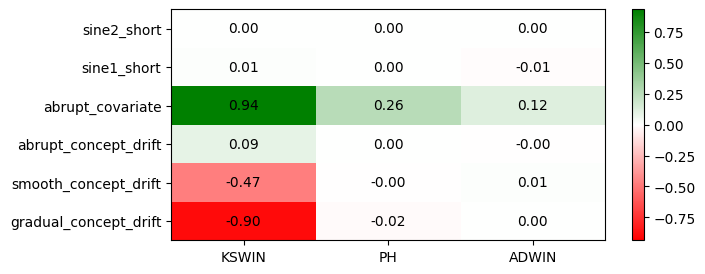

In [37]:
y = np.arange(len(df_res_diff_prec.index))
x = np.arange(len(df_res_diff_prec.columns))
X, Y = np.meshgrid(x, y)
Z = df_res_diff_prec.values
#Z = Z>=0 #THIS IS TO GO TO BOOLEAN Version
from  matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
fig, ax = plt.subplots(figsize = [7,3])
pc = ax.pcolormesh(Z,norm=matplotlib.colors.CenteredNorm(), cmap=cmap)
ax.set_yticks(np.arange(0.5,len(df_res_diff_prec.index)+0.5), df_res_diff_prec.index)
ax.set_xticks(np.arange(0.5, len(df_res_diff_prec.columns)+0.5), ["".join(x.split("_")[-1:]).upper() for x in df_res_diff_prec.columns])
fig.colorbar(pc, ax=ax)
#plt.title("Precision difference between Shap-detect and vanilla detector")



for (i, j), z in np.ndenumerate(Z):
    ax.text(j+0.5, i+0.5, '{:0.2f}'.format(z), ha='center', va='center')


save_path = os.environ.get("FIGURES_PATH")
save_path += 'global_prec_delta.pdf'
print(save_path)
plt.savefig(save_path, bbox_inches='tight')

## Median

In [38]:
df_scenario_med = df_scenario_med.drop([x for x in df_scenario_med.index if "stagger_short" in x])
df_scenario_med = df_scenario_med.drop([x for x in df_scenario_med.index if "nodrift" in x])

In [39]:
sorted(df_scenario_med.noise_rate.unique())

[0.0, 0.001, 0.01, 0.05, 0.1, 0.5]

In [40]:
df_res_diff_med = compute_shap_diff(df_scenario_med, max_noise = sorted(df_scenario_med.noise_rate.unique())[4])
df_res_diff_med = df_res_diff_med.loc[[x for x in col_order if "nodrift" not in x]]#Keep same order as the above graph
#df_res_diff_med = df_res_diff_med.drop("nodrift")#no need keeping it

/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/global_median_delta.pdf


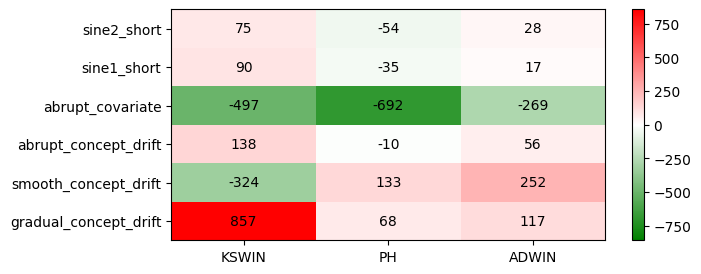

In [41]:
y = np.arange(len(df_res_diff_med.index))
x = np.arange(len(df_res_diff_med.columns))
X, Y = np.meshgrid(x, y)
Z = df_res_diff_med.values
#Z = Z>=0 #THIS IS TO GO TO BOOLEAN Version
from  matplotlib.colors import LinearSegmentedColormap

cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"][::-1], N=256) 
fig, ax = plt.subplots(figsize = [7,3])
pc = ax.pcolormesh(Z,norm=matplotlib.colors.CenteredNorm(), cmap=cmap)
ax.set_yticks(np.arange(0.5,len(df_res_diff_med.index)+0.5), df_res_diff_med.index)
ax.set_xticks(np.arange(0.5, len(df_res_diff_med.columns)+0.5), ["".join(x.split("_")[-1:]).upper() for x in df_res_diff_med.columns])
fig.colorbar(pc, ax=ax)
#plt.title("Mean median detection difference between Shap-detect and vanilla detector\nThe lower the better")


for (i, j), z in np.ndenumerate(Z):
    ax.text(j+0.5, i+0.5, '{:.0f}'.format(z), ha='center', va='center')



save_path = os.environ.get("FIGURES_PATH")
save_path += 'global_median_delta.pdf'
print(save_path)
plt.savefig(save_path, bbox_inches='tight')

# Evolution of Median detection for a given Drift and algo

In [42]:
results = os.listdir(results_path)
metrics_list = ['no', 'false', 'min','mean', 'median', 'median_true', 'max', 'std']

for i,f in enumerate(single_drift[1:-1]):

    D_G = f()#generate_abrupt_concept_drift(n_samples=5000)
    print(D_G.drift_name)
    all_df_metrics = get_D_G_metrics(D_G, results, selected_methods = ["ADWIN", "PH", "KSWIN"],
                    exp_type="noisy", noisy = True, path=results_path+"/")
    if(i==0):
        df_drift_res = all_df_metrics
    else:
        df_drift_res = pd.concat([df_drift_res, all_df_metrics], axis=1)
    #all_df_metrics = all_df_metrics.loc[metrics_list].T.sort_values(["no","false","median"]).sort_index()
    
df_drift_res = df_drift_res.loc[metrics_list].T.sort_values(["no","false","median"]).sort_index()
df_drift_res = df_drift_res.drop(columns = ["no","false"])
df = df_drift_res.copy()
df['noise_rate'] = [x.split("_")[-1] for x in df.index]
df['algo'] = ["_".join(x.split("_")[1:-1]) for x in df.index]

nodrift_noisy001


invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide


nodrift_noisy01
nodrift_noisy05


invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide


nodrift_noisy1


invalid value encountered in scalar divide
invalid value encountered in scalar divide


<Axes: ylabel='Median detection '>

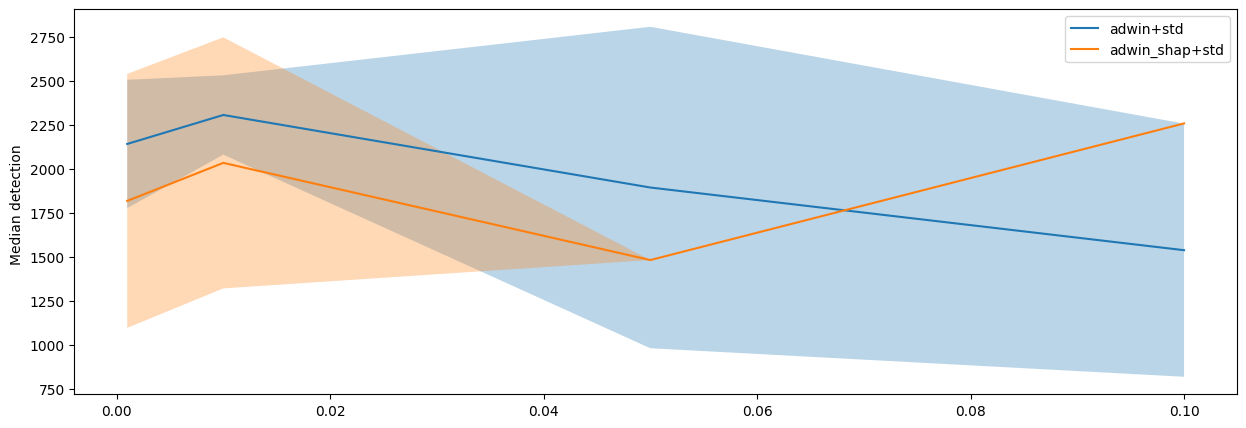

In [43]:
plot_median_evolution(df, ["ADWIN"])

####################nodrift####################


invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide


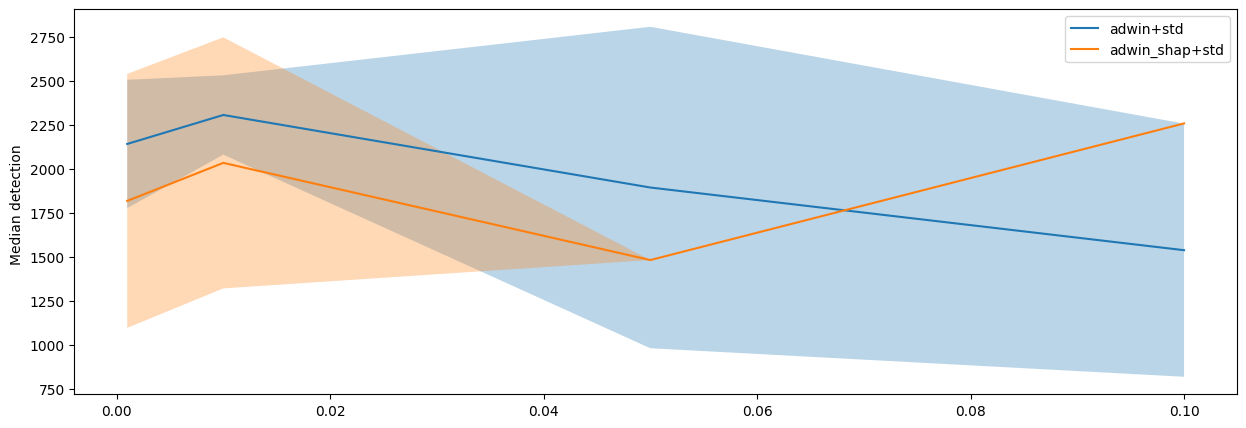

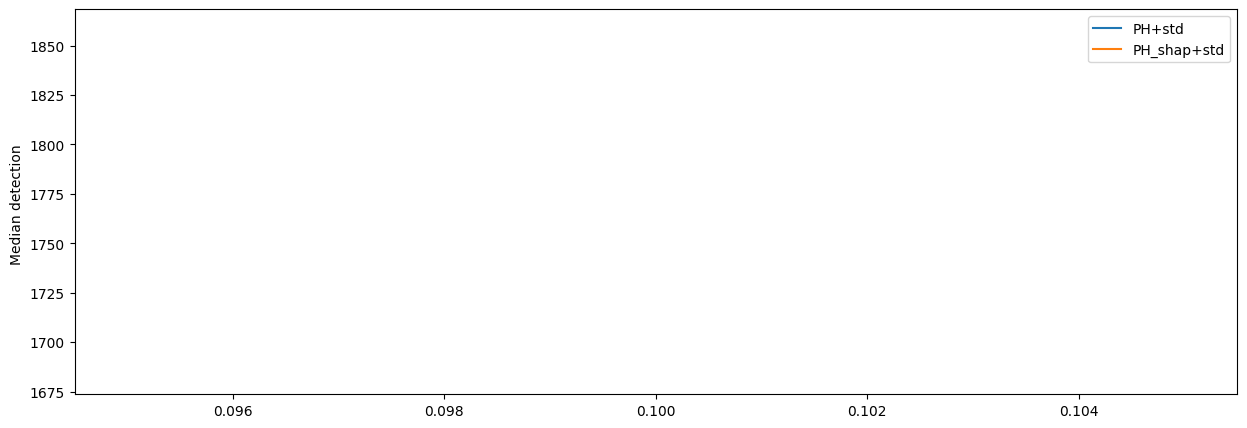

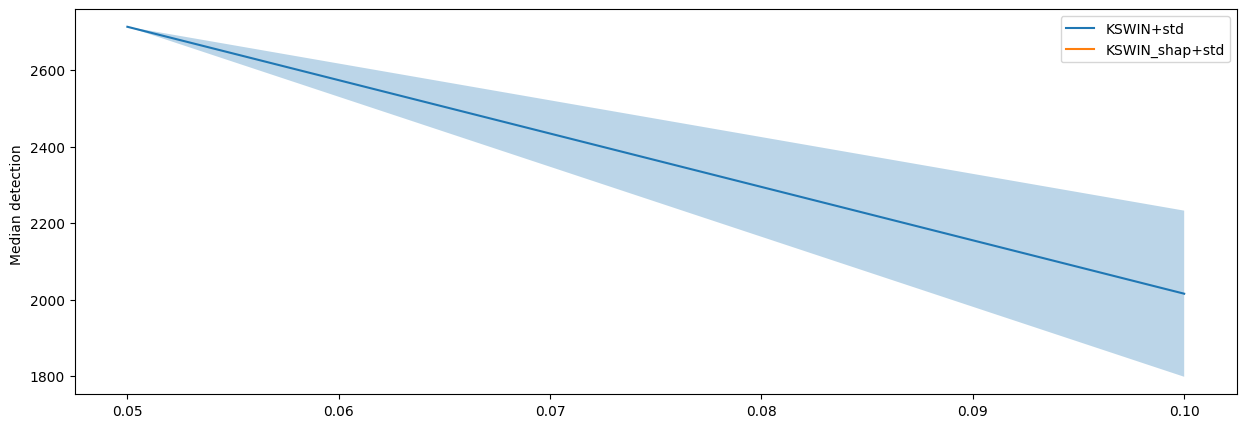

####################mooth_concept_drif####################


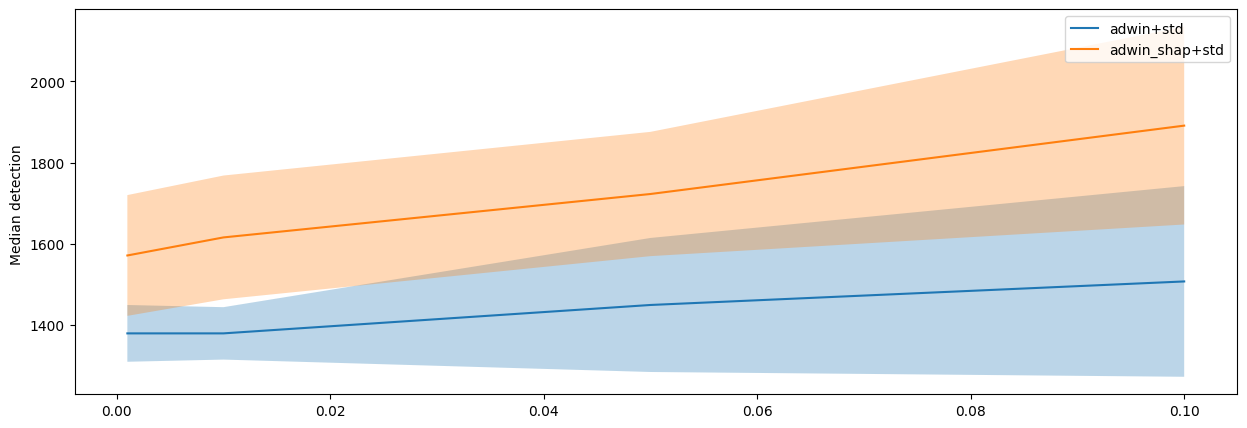

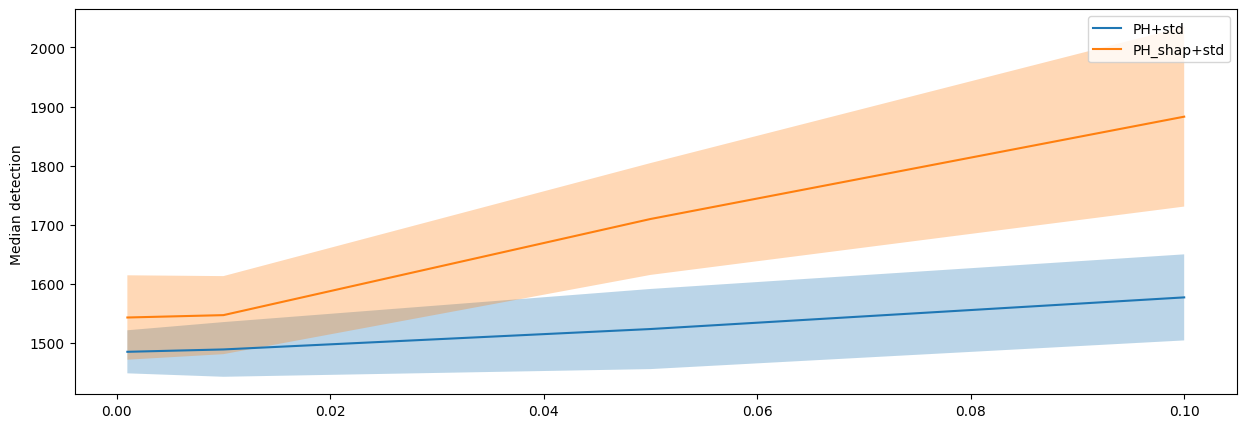

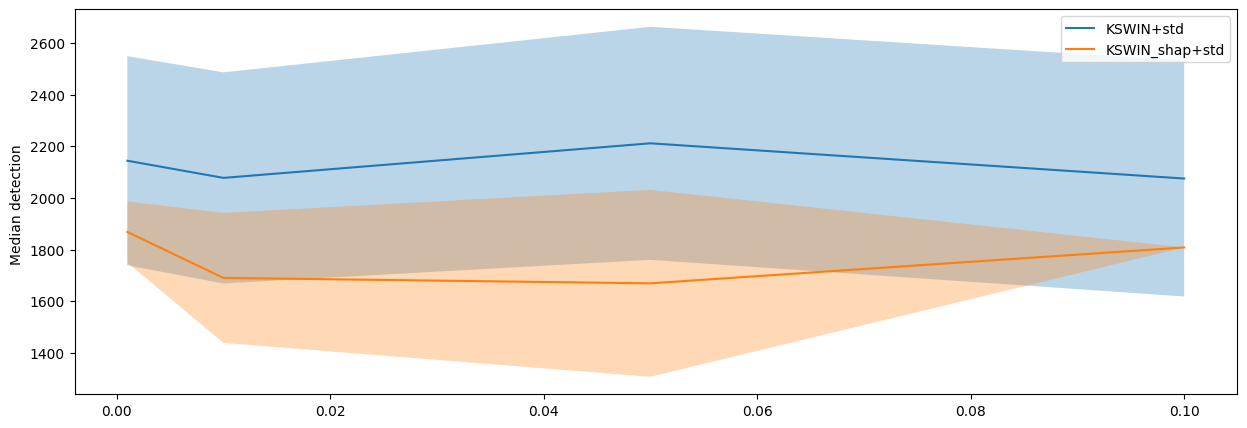

####################abrupt_concept_drif####################


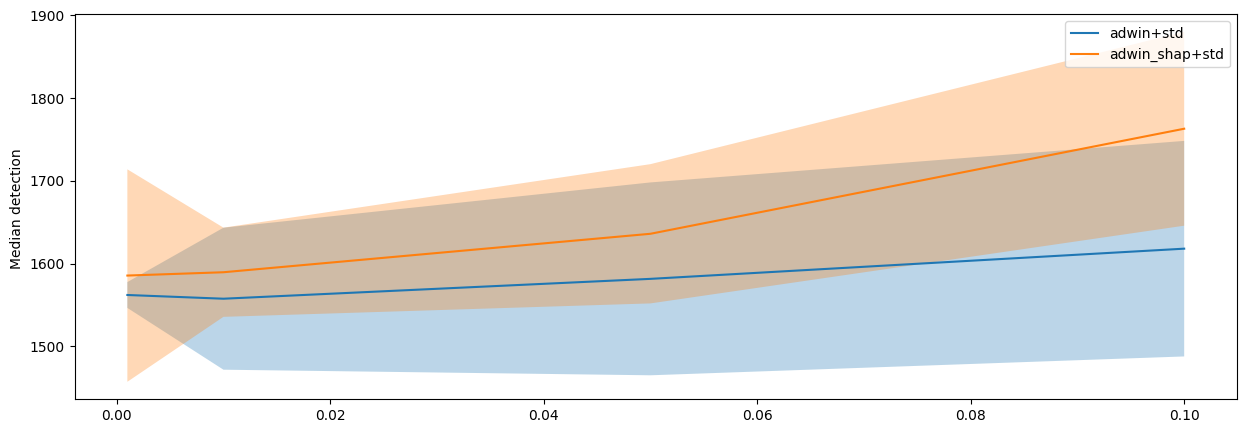

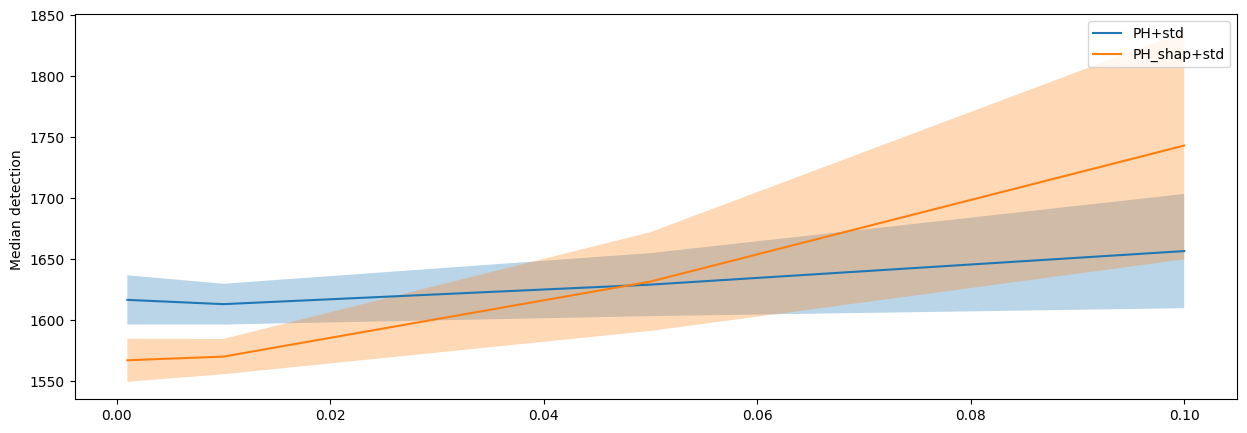

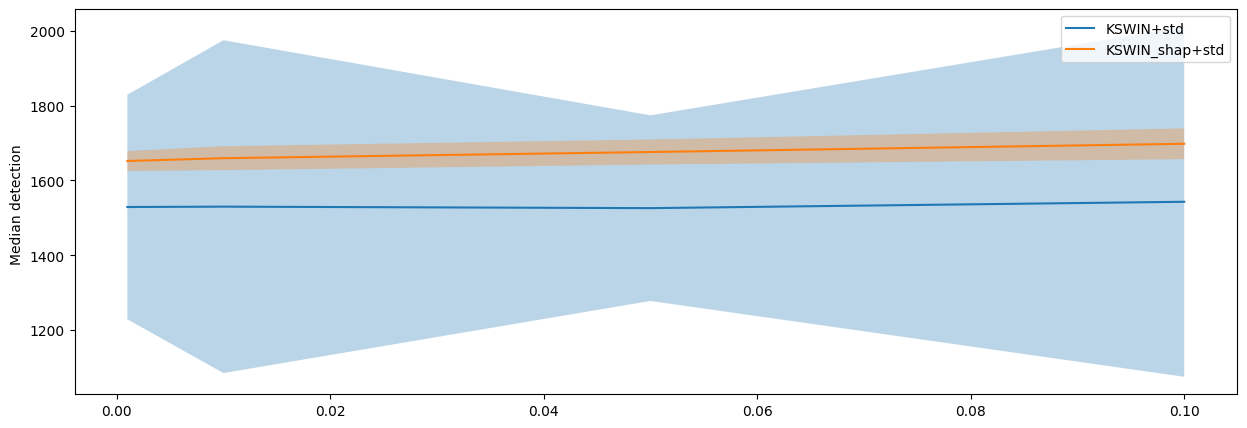

####################abrupt_covariate_drif####################


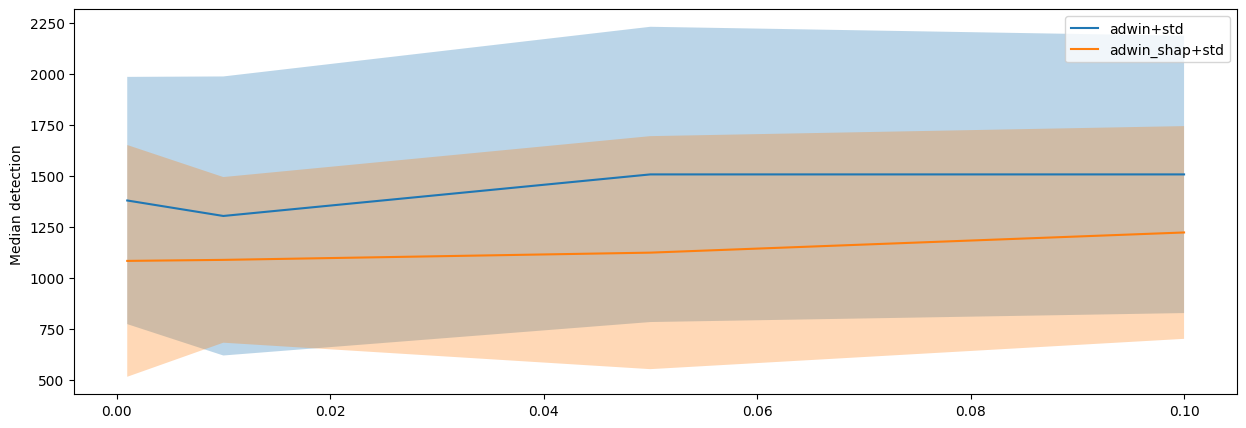

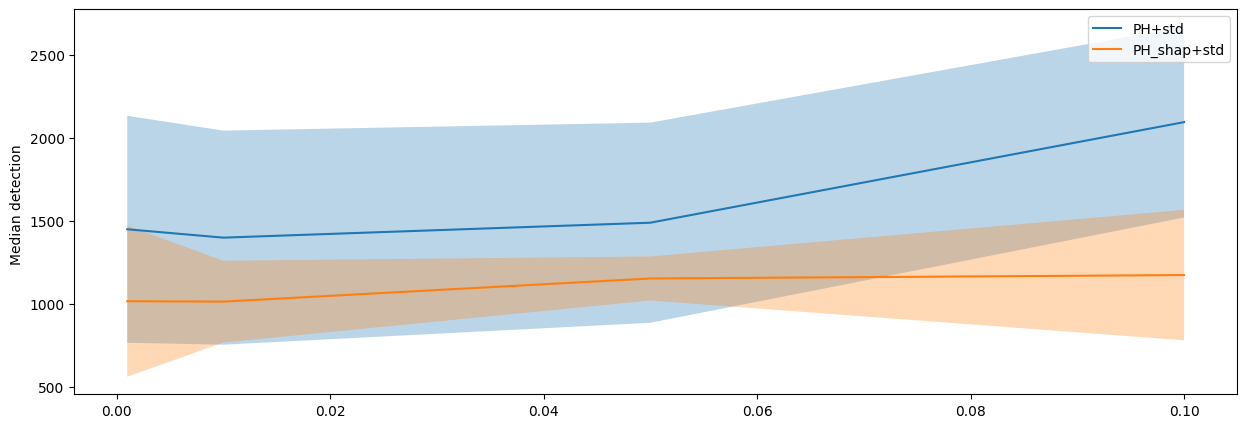

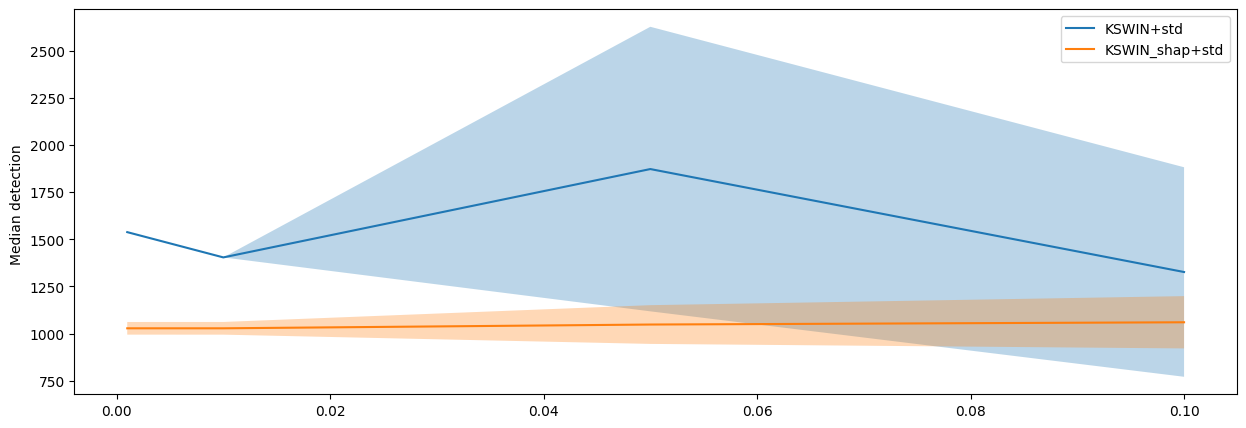

In [44]:

results = os.listdir(results_path)
metrics_list = ['no', 'false', 'min','mean', 'median', 'median_true', 'max', 'std']
for d_name in ["nodrift","mooth_concept_drif", "abrupt_concept_drif", 
        "abrupt_covariate_drif"]:#, "sine2","sine1","stagger"]:
    if(d_name=="nodrift"):
        single_drift = [f for f in nodrift_funcs if "nodrift" in f.__name__]#[:3]
    else:
        single_drift = [f for f in list_df_generate_fcts if d_name in f.__name__]#[:3]
    print(f"####################{d_name}####################")
    for i,f in enumerate(single_drift[1:-1]):
        D_G = f()#generate_abrupt_concept_drift(n_samples=5000)
        all_df_metrics = get_D_G_metrics(D_G, results, selected_methods = ["ADWIN", "PH", "KSWIN"],
                        exp_type="noisy", noisy = True, path=results_path+"/")
        if(i==0):
            df_drift_res = all_df_metrics
        else:
            df_drift_res = pd.concat([df_drift_res, all_df_metrics], axis=1)
        #all_df_metrics = all_df_metrics.loc[metrics_list].T.sort_values(["no","false","median"]).sort_index()
        
    df_drift_res = df_drift_res.loc[metrics_list].T.sort_values(["no","false","median"]).sort_index()
    df_drift_res = df_drift_res.drop(columns = ["no","false"])
    df = df_drift_res.copy()
    df['noise_rate'] = [x.split("_")[-1] for x in df.index]
    df['algo'] = ["_".join(x.split("_")[1:-1]) for x in df.index]


    for method in ["ADWIN", "PH", "KSWIN"]:
        selected_methods = [method]

        ax = plot_median_evolution(df, selected_methods)
    plt.show()

# Reliability
## Generate all noise rate plots

In [45]:
results = os.listdir(results_path)
metrics_list = ['no', 'false', 'min','mean', 'median', 'median_true', 'max', 'std']

In [46]:
df

min         mean  median  median_true     max  \
retrain_KSWIN_0.001       1538.0  1538.000000  1538.0        638.0  1538.0   
retrain_KSWIN_0.01        1404.0  1404.000000  1404.0        504.0  1404.0   
retrain_KSWIN_0.05        1339.0  1872.500000  1872.5        972.5  2406.0   
retrain_KSWIN_0.1          984.0  1491.200000  1326.5        426.5  2981.0   
retrain_KSWIN_shap_0.001   971.0  1032.040000  1028.0        128.0  1106.0   
retrain_KSWIN_shap_0.01    966.0  1034.100000  1028.0        128.0  1121.0   
retrain_KSWIN_shap_0.05    980.0  1062.489796  1048.0        148.0  1723.0   
retrain_KSWIN_shap_0.1     976.0  1089.367347  1060.0        160.0  1735.0   
retrain_PH_0.001          1159.0  1826.933333  1450.5        550.5  2960.0   
retrain_PH_0.01           1154.0  1704.714286  1400.0        500.0  2989.0   
retrain_PH_0.05           1156.0  1915.047619  1490.0        590.0  2979.0   
retrain_PH_0.1            1238.0  1981.941176  2096.0       1196.0  2765.0   
retrain_PH_shap_0.001      957.0  1198.659091  1017.0        117.0  2870.0   
retrain_PH_shap_0.01       949.0  1098.263158  1014.5        114.5  2436.0   
retrain_PH_shap_0.05       978.0  1152.851852  1154.0        254.0  1478.0   
retrain_PH_shap_0.1       1006.0  1297.125000  1174.5        274.5  2568.0   
retrain_adwin_0.001        979.0  1577.644444  1379.0        479.0  2951.0   
retrain_adwin_0.01         932.0  1653.446809  1303.0        403.0  2915.0   
retrain_adwin_0.05         995.0  1794.027027  1507.0        607.0  2948.0   
retrain_adwin_0.1         1013.0  1739.520000  1507.0        607.0  2950.0   
retrain_adwin_shap_0.001   936.0  1288.200000  1082.5        182.5  2947.0   
retrain_adwin_shap_0.01    707.0  1195.580000  1087.5        193.0  2915.0   
retrain_adwin_shap_0.05    901.0  1374.255319  1123.0        223.0  2931.0   
retrain_adwin_shap_0.1     835.0  1415.486486  1222.0        336.5  2967.0   

                                 std noise_rate        algo  
retrain_KSWIN_0.001              NaN      0.001       KSWIN  
retrain_KSWIN_0.01               NaN       0.01       KSWIN  
retrain_KSWIN_0.05        754.482936       0.05       KSWIN  
retrain_KSWIN_0.1         555.528737        0.1       KSWIN  
retrain_KSWIN_shap_0.001   33.510863      0.001  KSWIN_shap  
retrain_KSWIN_shap_0.01    33.648392       0.01  KSWIN_shap  
retrain_KSWIN_shap_0.05   102.696381       0.05  KSWIN_shap  
retrain_KSWIN_shap_0.1    138.659459        0.1  KSWIN_shap  
retrain_PH_0.001          683.698609      0.001          PH  
retrain_PH_0.01           644.944892       0.01          PH  
retrain_PH_0.05           603.039590       0.05          PH  
retrain_PH_0.1            574.508646        0.1          PH  
retrain_PH_shap_0.001     455.294586      0.001     PH_shap  
retrain_PH_shap_0.01      246.338340       0.01     PH_shap  
retrain_PH_shap_0.05      132.613001       0.05     PH_shap  
retrain_PH_shap_0.1       393.049424        0.1     PH_shap  
retrain_adwin_0.001       606.722572      0.001       adwin  
retrain_adwin_0.01        684.794187       0.01       adwin  
retrain_adwin_0.05        724.577827       0.05       adwin  
retrain_adwin_0.1         680.530499        0.1       adwin  
retrain_adwin_shap_0.001  568.767339      0.001  adwin_shap  
retrain_adwin_shap_0.01   406.441305       0.01  adwin_shap  
retrain_adwin_shap_0.05   571.791748       0.05  adwin_shap  
retrain_adwin_shap_0.1    522.084371        0.1  adwin_shap

In [47]:
results = os.listdir(results_path)
metrics_list = ['no', 'false', 'min','mean', 'median', 'median_true', 'max', 'std']
for d_name in ["nodrift"]:#,"mooth_concept_drif", "abrupt_concept_drif", #nodrift
        #"abrupt_covariate_drif"]:#, "sine2","sine1","stagger"]:
    if(d_name=="nodrift"):
        single_drift = [f for f in nodrift_funcs if "nodrift" in f.__name__]#[:3]
    else:
        single_drift = [f for f in list_df_generate_fcts if d_name in f.__name__]#[:3]
    print(f"####################{d_name}####################")
    for i,f in enumerate(single_drift[:]):
        D_G = f()#generate_abrupt_concept_drift(n_samples=5000)
        #print(D_G.noise_rate)
        if(D_G.noise_rate==0):
            all_df_metrics = get_D_G_metrics(D_G, results, selected_methods = ["ADWIN", "PH", "KSWIN"],
                            exp_type="noisy", noisy = True, path=results_path+"/")            
            #print(all_df_metrics, D_G.noise_rate, )
            all_df_metrics.columns = [x+"_0.0" for x in all_df_metrics.columns]
        else:
            all_df_metrics = get_D_G_metrics(D_G, results, selected_methods = ["ADWIN", "PH", "KSWIN"],
                            exp_type="noisy", noisy = True, path=results_path+"/")
        if(i==0):
            df_drift_res = all_df_metrics
        else:
            df_drift_res = pd.concat([df_drift_res, all_df_metrics], axis=1)
        #all_df_metrics = all_df_metrics.loc[metrics_list].T.sort_values(["no","false","median"]).sort_index()
        
    df_drift_res = df_drift_res.loc[metrics_list].T.sort_values(["no","false","median"]).sort_index()
    #df_drift_res = df_drift_res.drop(columns = ["no","false"])
    df_drift_res = df_drift_res[["no","false"]]
    df = df_drift_res.copy()
    df['noise_rate'] = [x.split("_")[-1] for x in df.index]
    df['algo'] = ["_".join(x.split("_")[1:-1]) for x in df.index]

    df
    break

####################nodrift####################


invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide


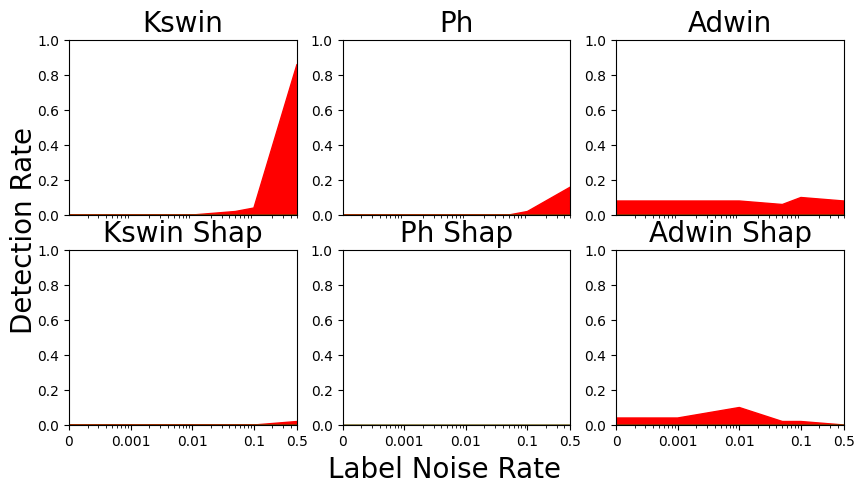

In [48]:
ax = plot_evolving_noise_rates(df, True)

####################nodrift####################


invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide
invalid value encountered in scalar divide


/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/dfevolving_detect_rates.pdf


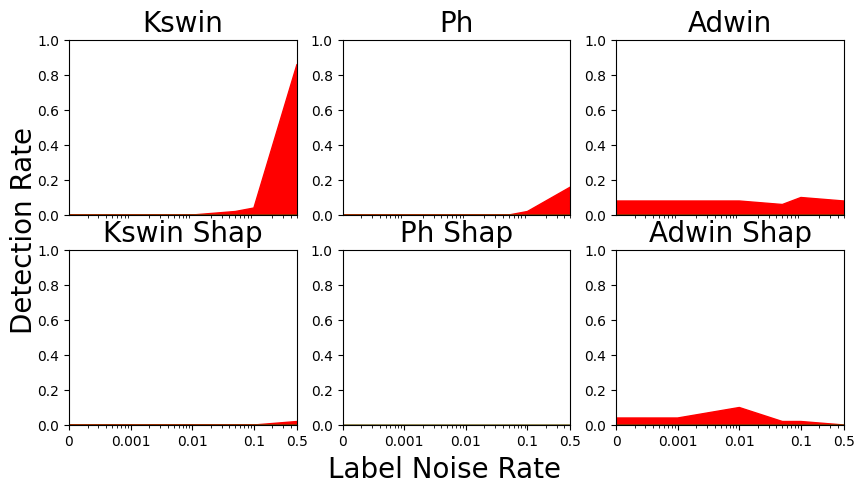

####################mooth_concept_drif####################


invalid value encountered in scalar divide
invalid value encountered in scalar divide


/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/smooth_concept_driftevolving_detect_rates.pdf


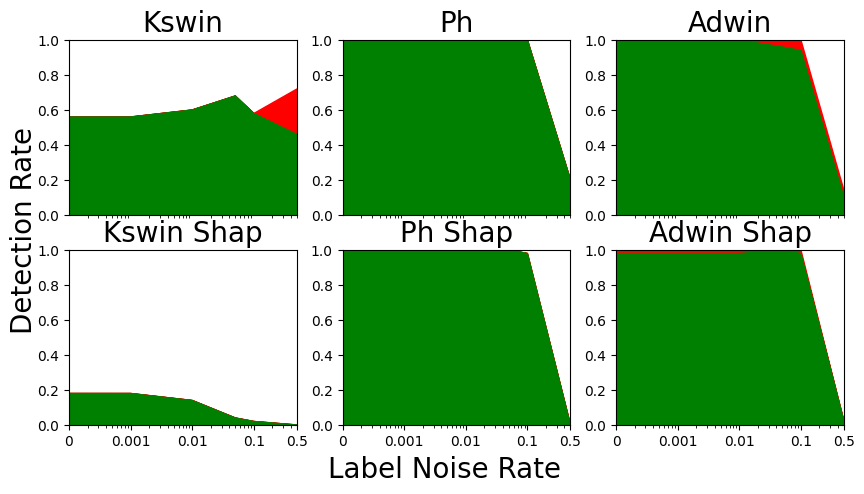

####################abrupt_concept_drif####################


invalid value encountered in scalar divide
invalid value encountered in scalar divide


/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_concept_driftevolving_detect_rates.pdf


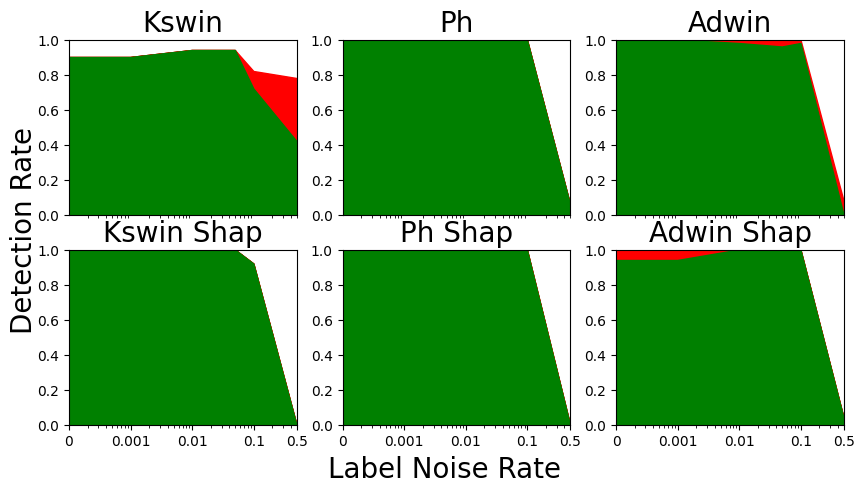

####################abrupt_covariate_drif####################


invalid value encountered in scalar divide
invalid value encountered in scalar divide


/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_covariate_driftevolving_detect_rates.pdf


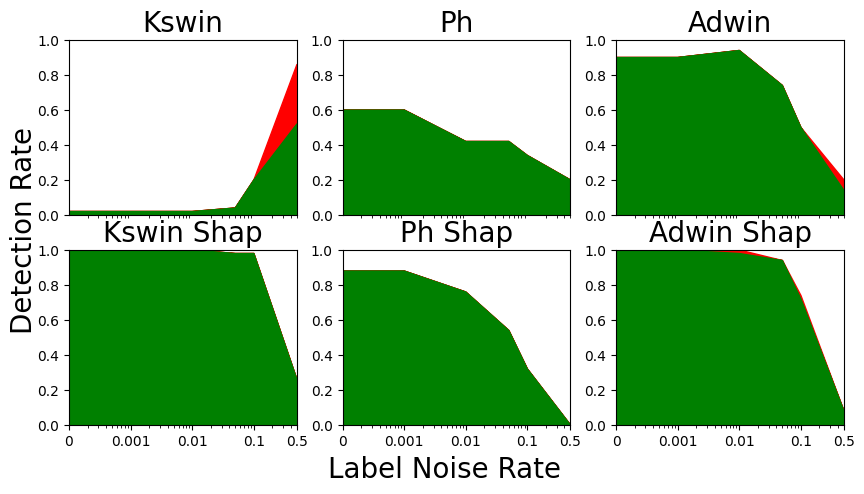

####################sine2####################


invalid value encountered in scalar divide


/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine2evolving_detect_rates.pdf


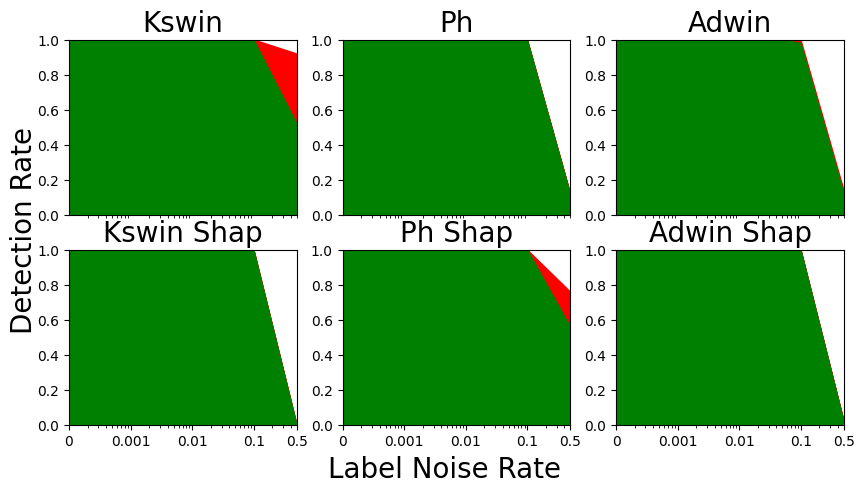

####################sine1####################


invalid value encountered in scalar divide


/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine1evolving_detect_rates.pdf


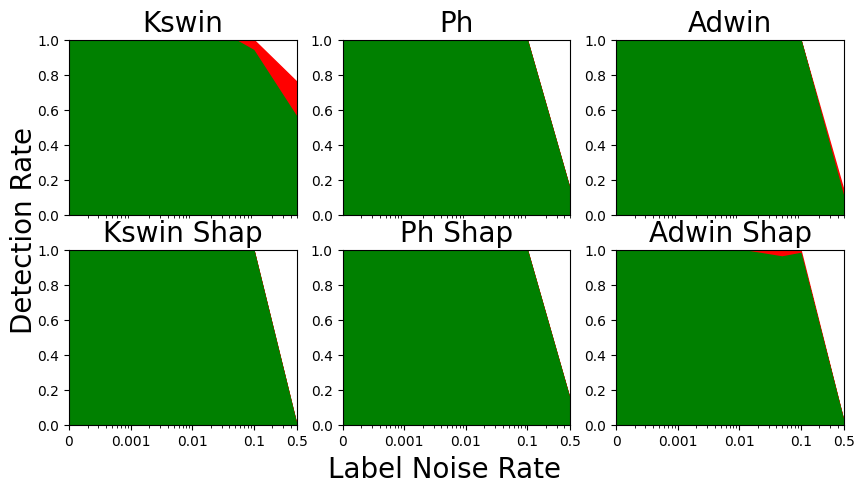

####################stagger####################
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/staggerevolving_detect_rates.pdf


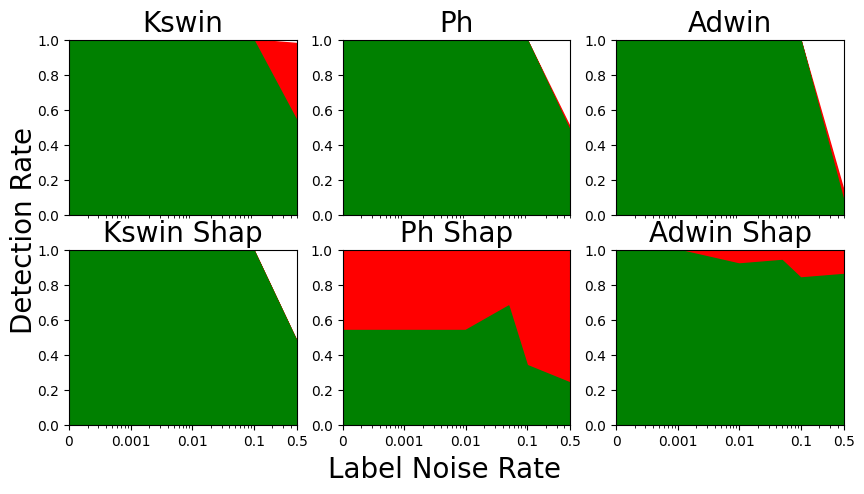

In [49]:
results = os.listdir(results_path)
metrics_list = ['no', 'false', 'min','mean', 'median', 'median_true', 'max', 'std']
for d_name in ["nodrift","mooth_concept_drif", "abrupt_concept_drif", "abrupt_covariate_drif", "sine2","sine1","stagger"]:
#for d_name in ["abrupt_covariate_drif", "abrupt_covariate_drif"]:#, "sine2","sine1","stagger"]:
    if(d_name=="nodrift"):
        single_drift = [f for f in nodrift_funcs if "nodrift" in f.__name__]#[:3]
    else:
        single_drift = [f for f in list_df_generate_fcts if d_name in f.__name__]#[:3]
    print(f"####################{d_name}####################")
    for i,f in enumerate(single_drift[:]):
        D_G = f()#generate_abrupt_concept_drift(n_samples=5000)
        if(D_G.noise_rate==0):
            all_df_metrics = get_D_G_metrics(D_G, results, selected_methods = ["ADWIN", "PH", "KSWIN"],
                            exp_type="noisy", noisy = True, path=results_path+"/")            
            #print(all_df_metrics, D_G.noise_rate, )
            all_df_metrics.columns = [x+"_0.0" for x in all_df_metrics.columns]
        else:
            all_df_metrics = get_D_G_metrics(D_G, results, selected_methods = ["ADWIN", "PH", "KSWIN"],
                            exp_type="noisy", noisy = True, path=results_path+"/")
        if(i==0):
            df_drift_res = all_df_metrics
        else:
            df_drift_res = pd.concat([df_drift_res, all_df_metrics], axis=1)
        #all_df_metrics = all_df_metrics.loc[metrics_list].T.sort_values(["no","false","median"]).sort_index()
        
    df_drift_res = df_drift_res.loc[metrics_list].T.sort_values(["no","false","median"]).sort_index()
    #df_drift_res = df_drift_res.drop(columns = ["no","false"])
    #df_drift_res = df_drift_res[["no","false"]]
    df = df_drift_res.copy()
    df['noise_rate'] = [x.split("_")[-1] for x in df.index]
    df['algo'] = ["_".join(x.split("_")[1:-1]) for x in df.index]


    fig, ax = plot_evolving_noise_rates(df, True)

    save_path = os.environ.get("FIGURES_PATH")+"_".join(single_drift[0].__name__.split("_")[2:])
    save_path += 'evolving_detect_rates.pdf'
    print(save_path)
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

# plot_results

# Show all df violins

In [50]:
selected_methods = ["ADWIN", "PH", "KSWIN"]

## Compare all detectors for a given scenario

In [51]:
list_df_generate_fcts

array([<function generate_noisy_stagger at 0x7f11d5c758b0>,
       <function generate_noisy_sine1 at 0x7f124004e940>,
       <function generate_noisy_sine2 at 0x7f11d5c1daf0>,
       <function generate_noisy_smooth_concept_drift at 0x7f11d5c75940>,
       <function generate_noisy_abrupt_concept_drift at 0x7f11d5c75af0>,
       <function generate_noisy_abrupt_covariate_drift at 0x7f11d5c75c10>,
       <function generate_noisy_gradual_concept_drift at 0x7f11d5c75b80>,
       <function generate_nodrift_df at 0x7f11d5c244c0>,
       <function generate_noisy_stagger at 0x7f11d5c1dc10>,
       <function generate_noisy_sine1 at 0x7f11d5c1dca0>,
       <function generate_noisy_sine2 at 0x7f11d5c1dd30>,
       <function generate_noisy_smooth_concept_drift at 0x7f11d5c75ca0>,
       <function generate_noisy_abrupt_concept_drift at 0x7f11d5c1d040>,
       <function generate_noisy_abrupt_covariate_drift at 0x7f11d5c1d160>,
       <function generate_noisy_gradual_concept_drift at 0x7f11d5c1d0d0>,
 

#################### stagger_short 6000 ####################
[(50, 2), (50, 2), (50, 2)]


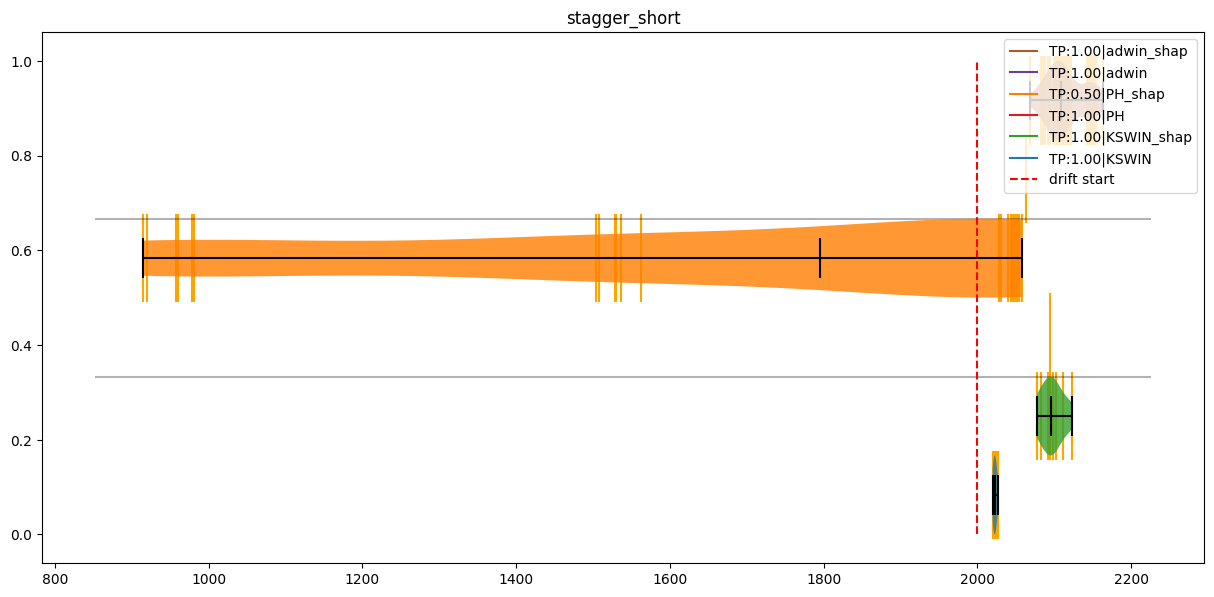

#################### sine1_short 3000 ####################
[(50, 2), (50, 2), (50, 2)]


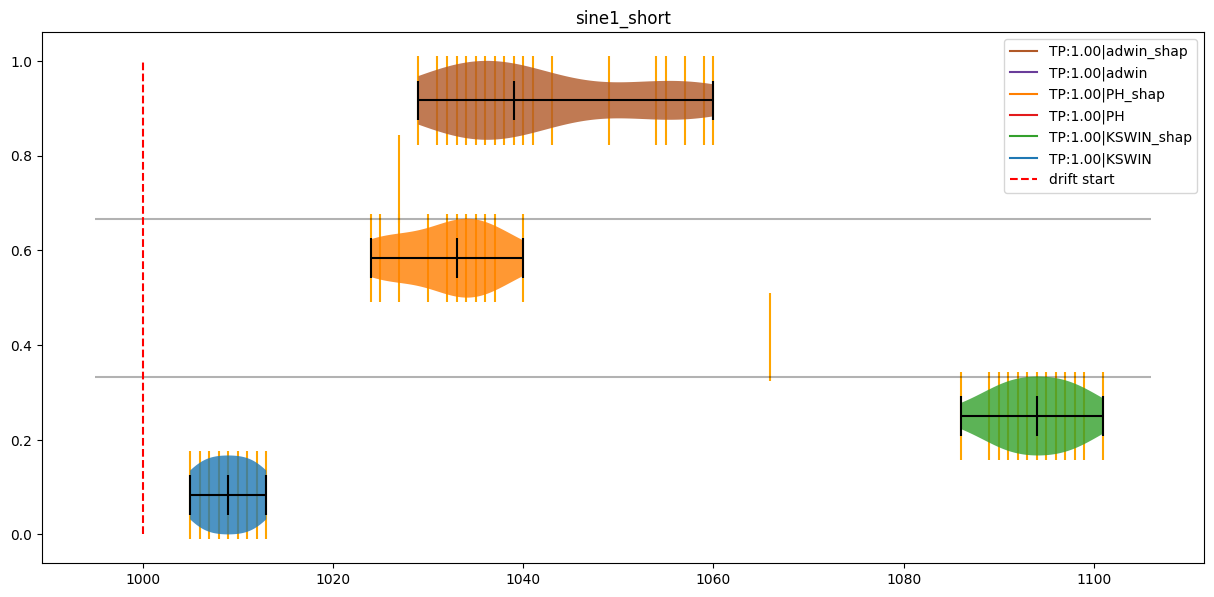

#################### sine2_short 3000 ####################
[(50, 2), (50, 2), (50, 2)]


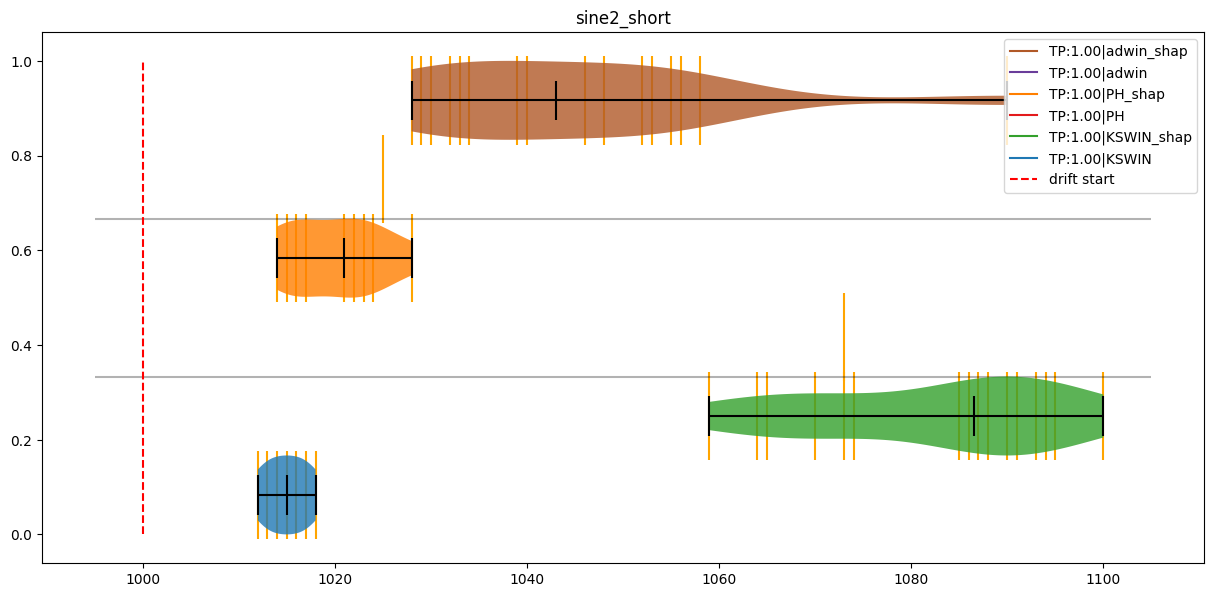

#################### smooth concept drift 3000 ####################
[(50, 2), (50, 2), (50, 2)]


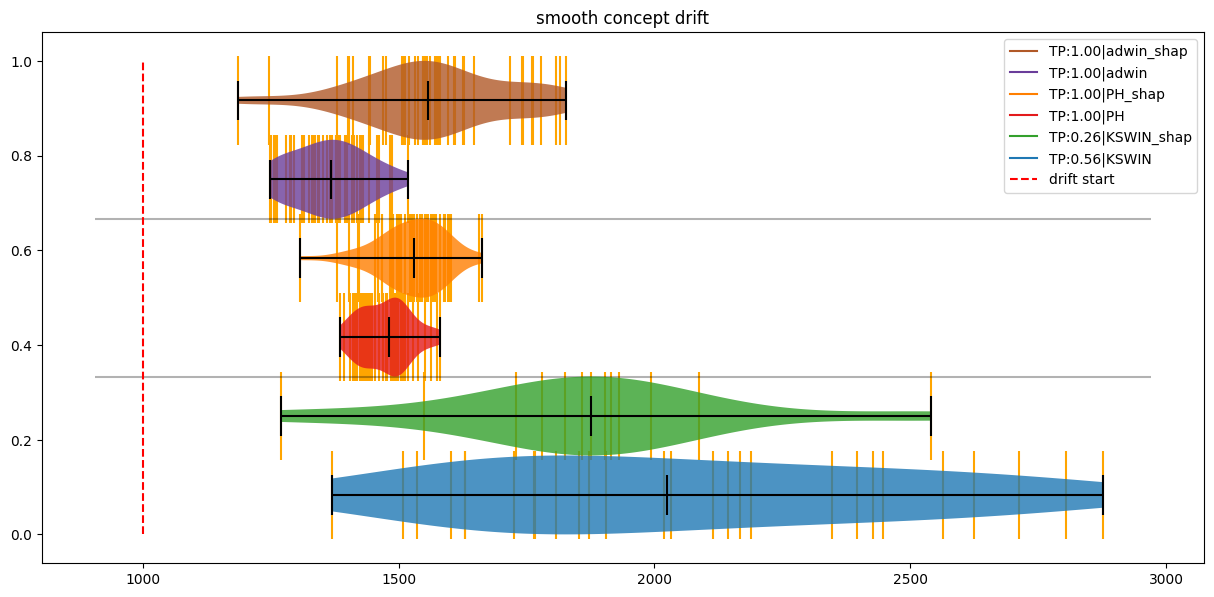

#################### abrupt concept drift 3000 ####################
[(50, 2), (50, 2), (50, 2)]


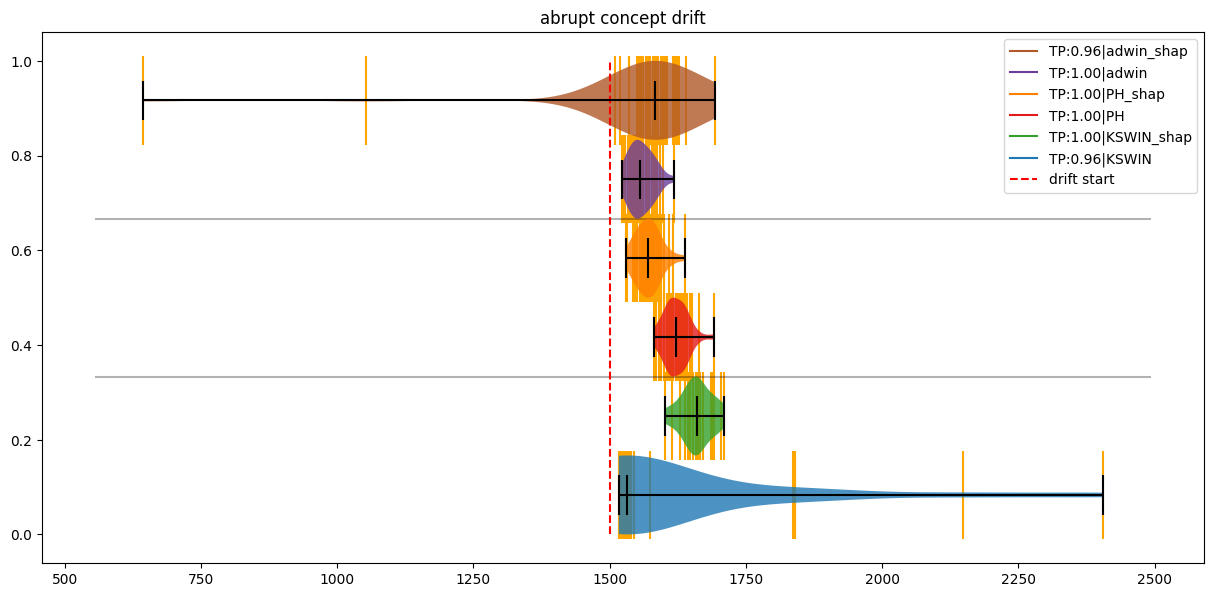

#################### abrupt covariate 3000 ####################
[(50, 2), (50, 2), (50, 2)]


invalid value encountered in scalar divide


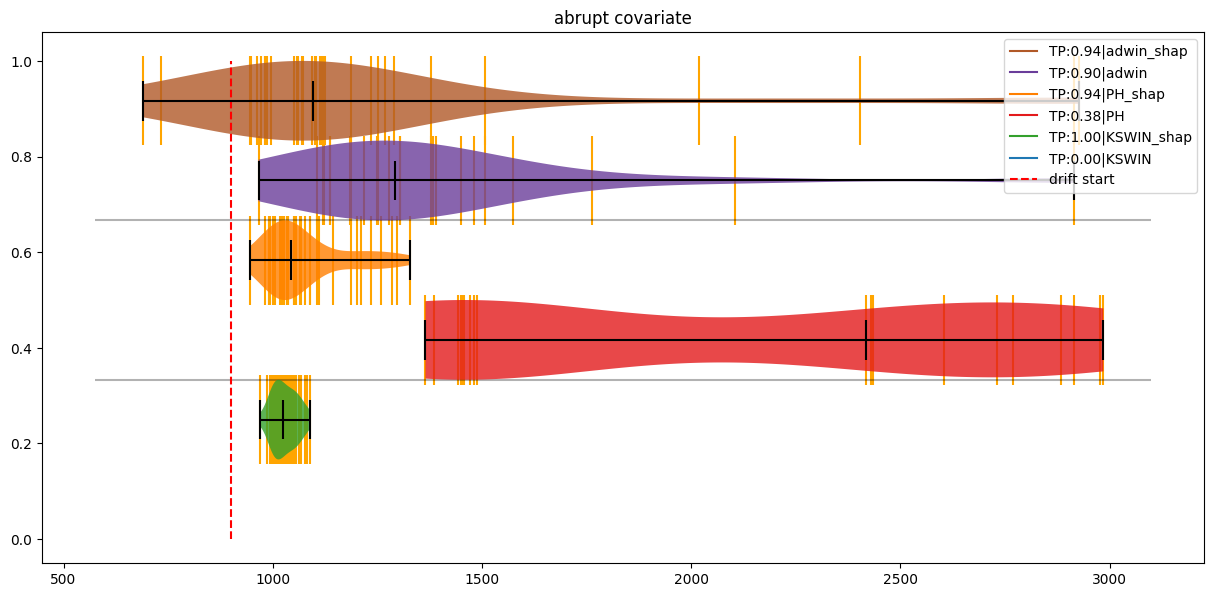

#################### gradual concept drift 3000 ####################
[(50, 2), (50, 2), (50, 2)]


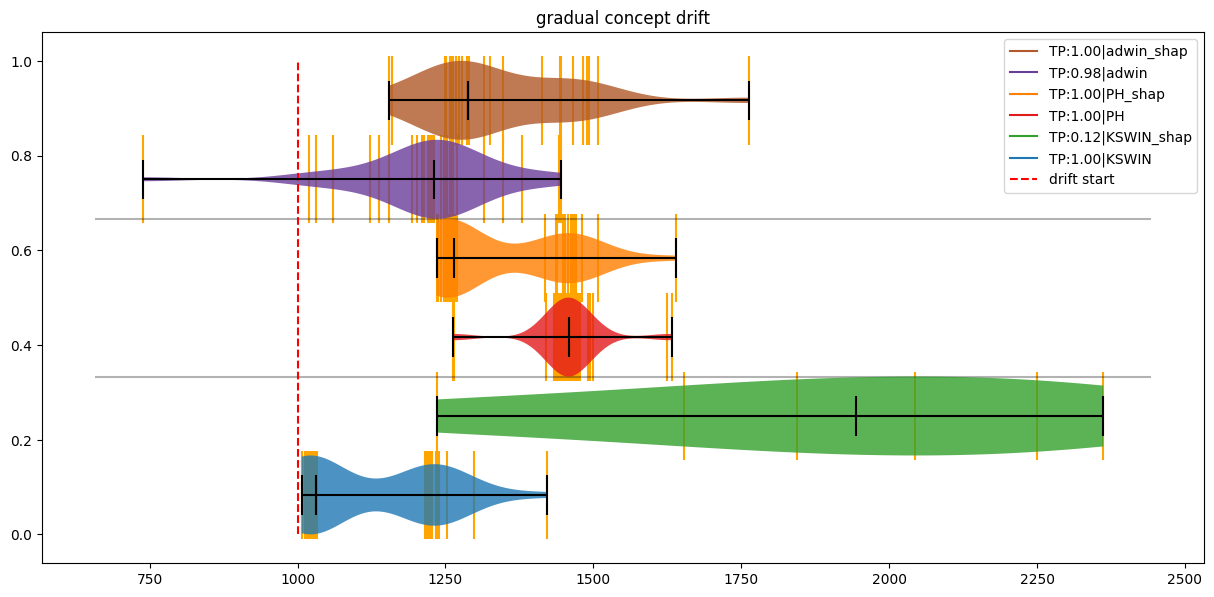

#################### nodrift_noisy 3000 ####################
#################### stagger_short noisy001 6000 ####################
[(50, 2), (50, 2), (50, 2)]


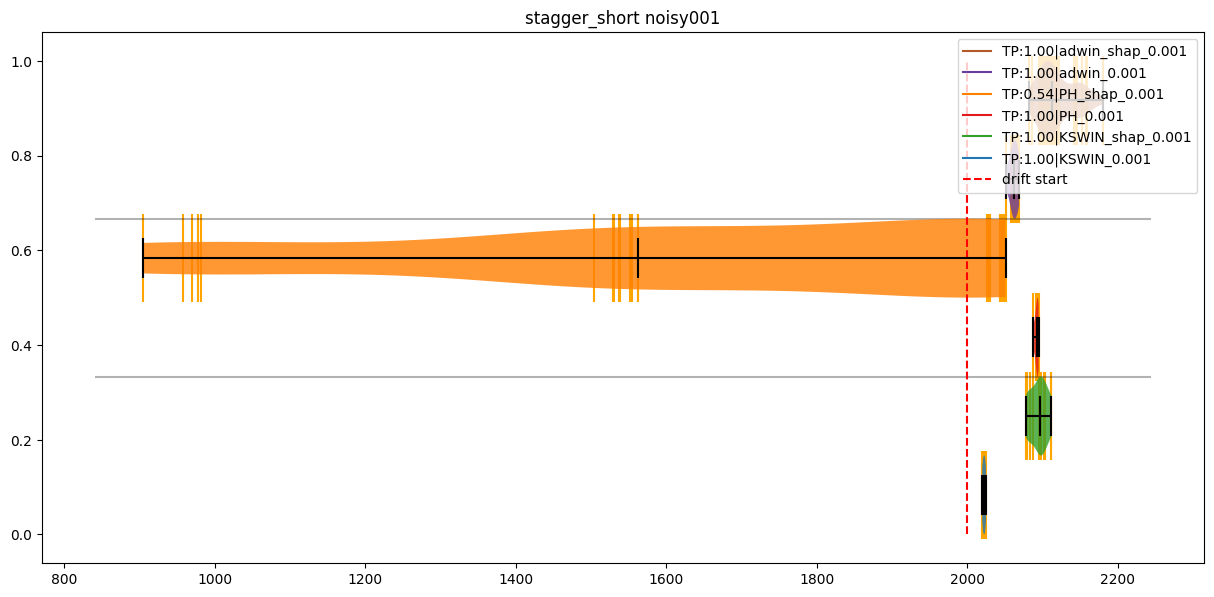

#################### sine1_short noisy001 3000 ####################
[(50, 2), (50, 2), (50, 2)]


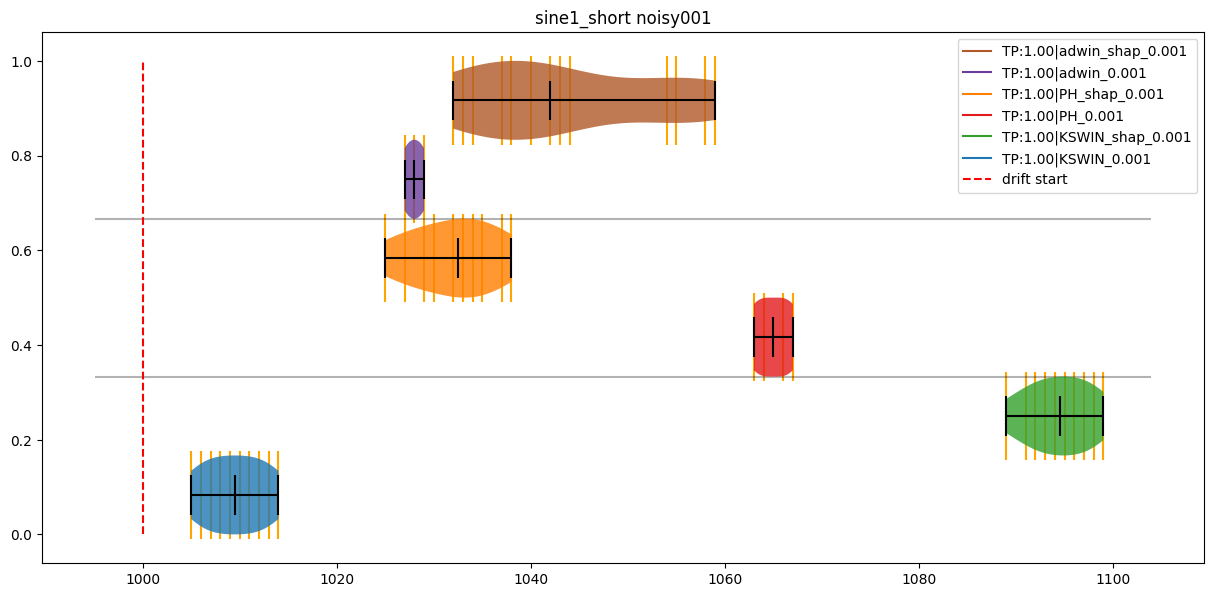

#################### sine2_short noisy001 3000 ####################
[(50, 2), (50, 2), (50, 2)]


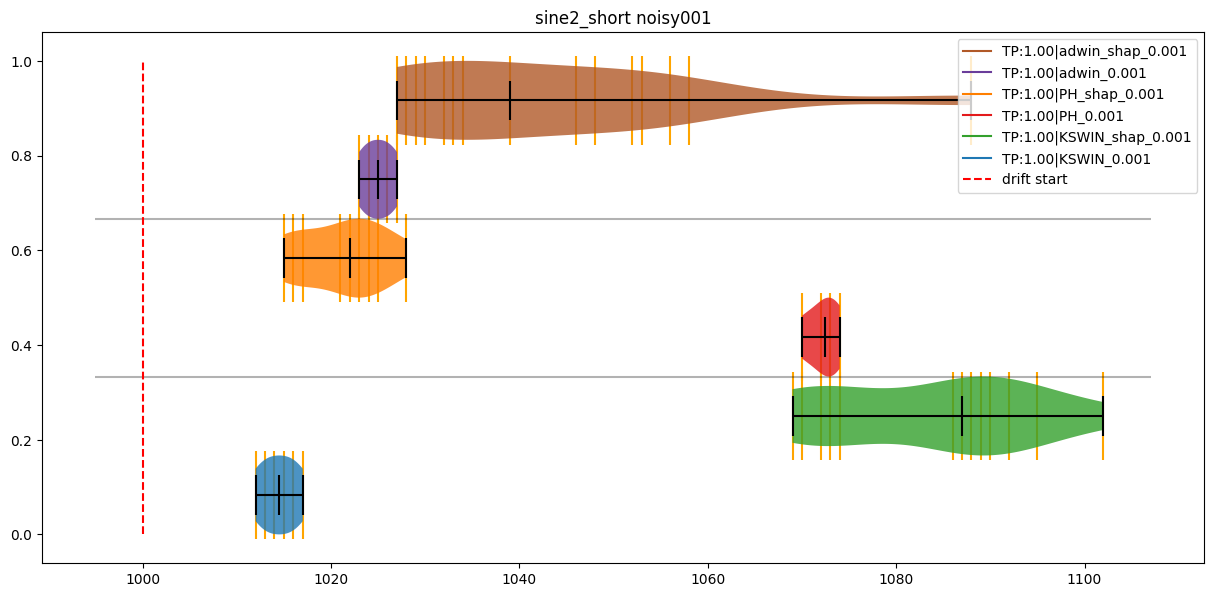

#################### smooth concept drift noisy001 3000 ####################
[(50, 2), (50, 2), (50, 2)]


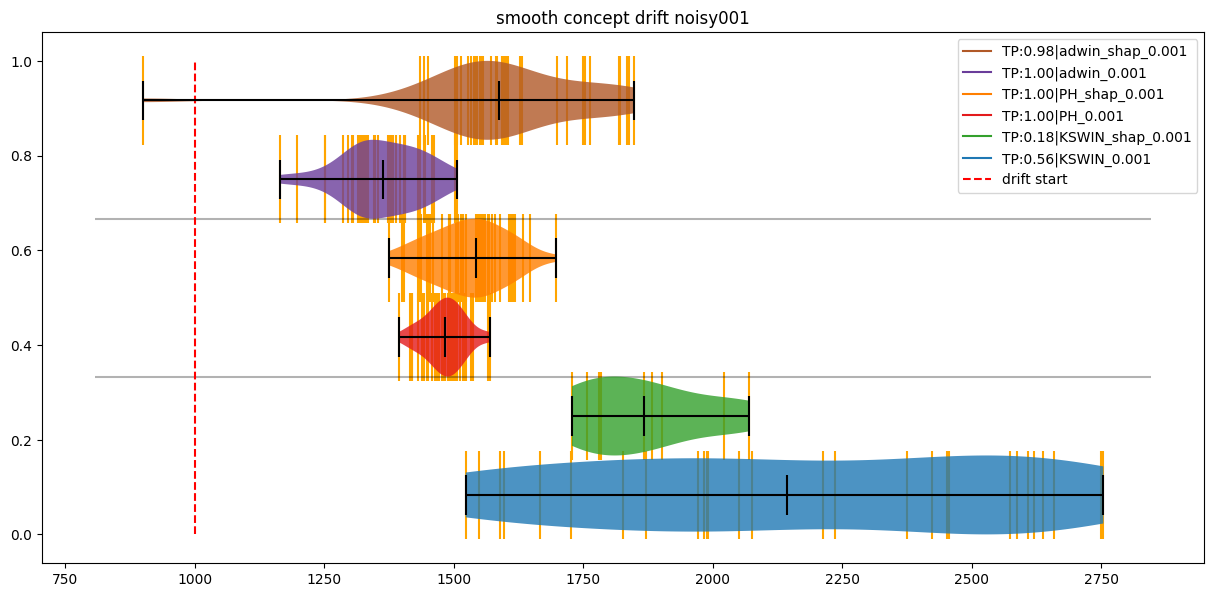

#################### abrupt concept drift noisy001 3000 ####################
[(50, 2), (50, 2), (50, 2)]


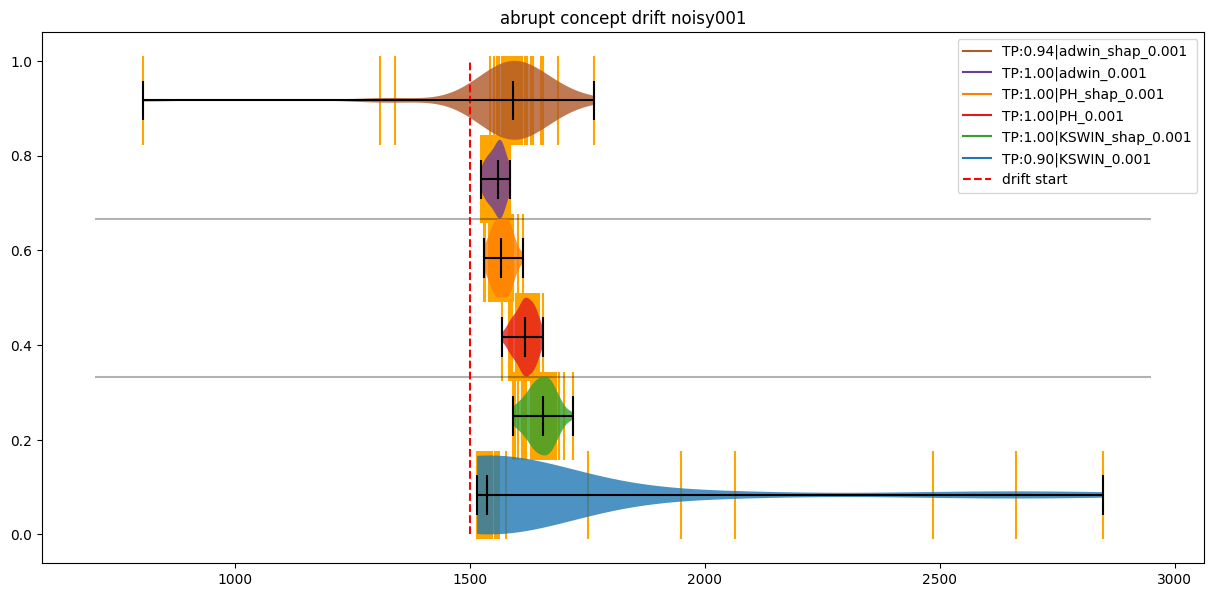

#################### abrupt covariate noisy001 3000 ####################
[(50, 2), (50, 2), (50, 2)]


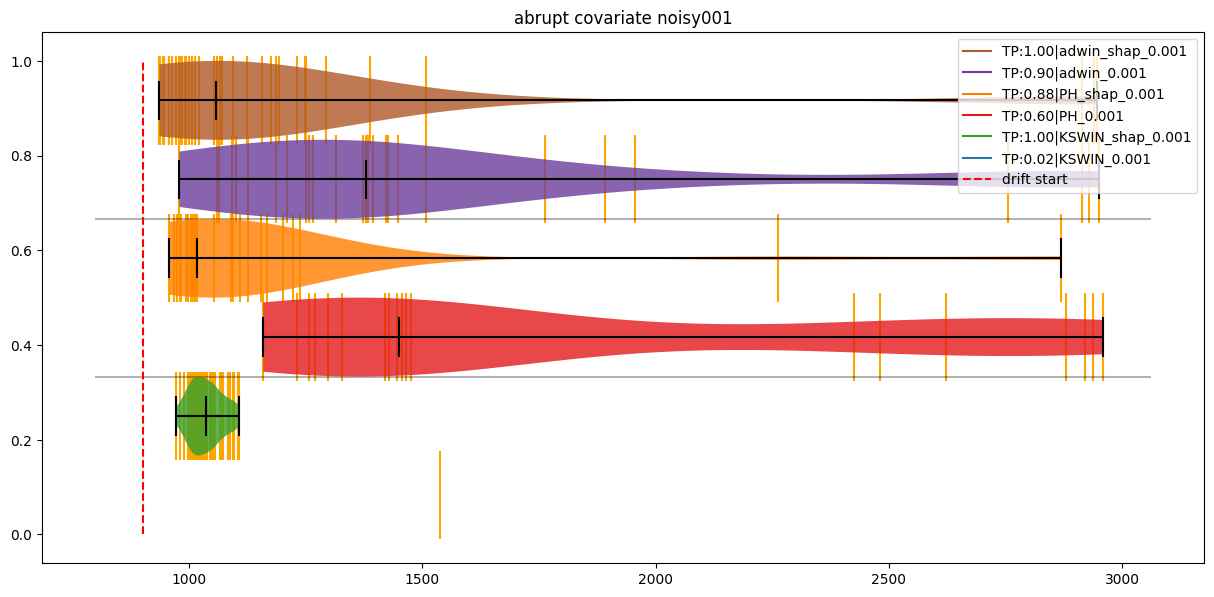

#################### gradual concept drift noisy001 3000 ####################
[(50, 2), (50, 2), (50, 2)]


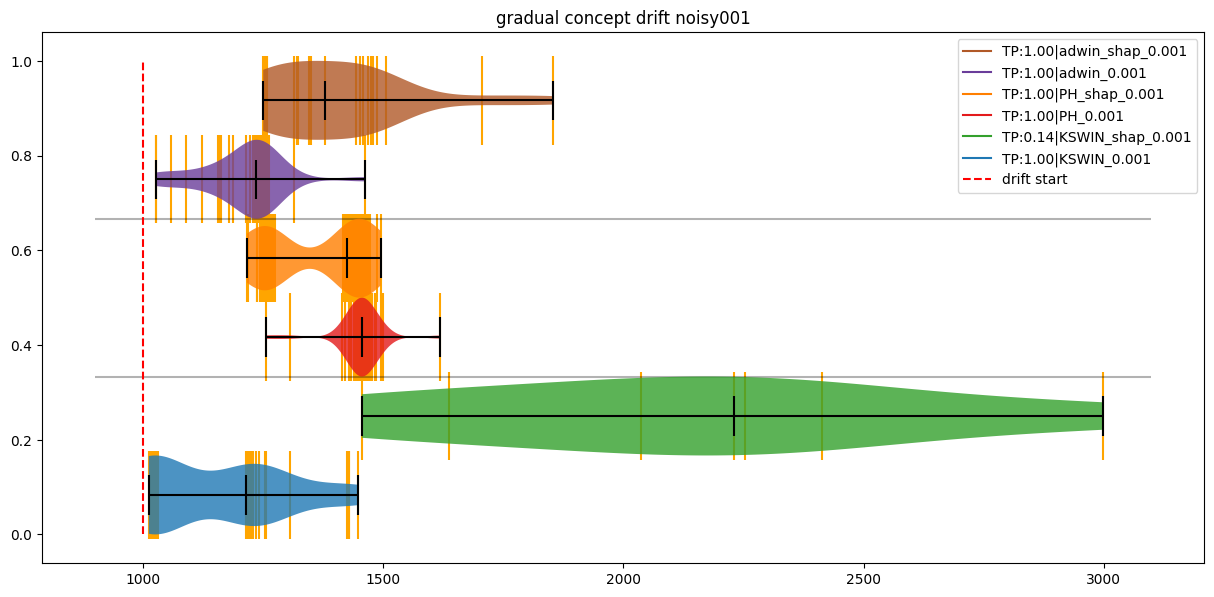

#################### nodrift_noisy001 3000 ####################
#################### stagger_short noisy01 6000 ####################
[(50, 2), (50, 2), (50, 2)]


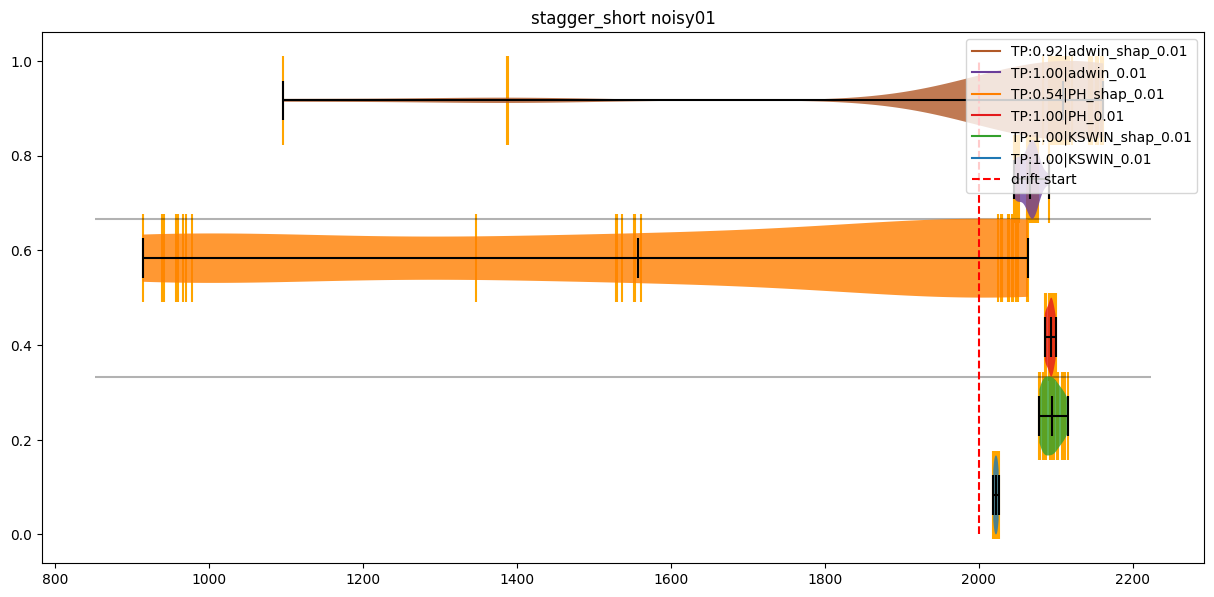

#################### sine1_short noisy01 3000 ####################
[(50, 2), (50, 2), (50, 2)]


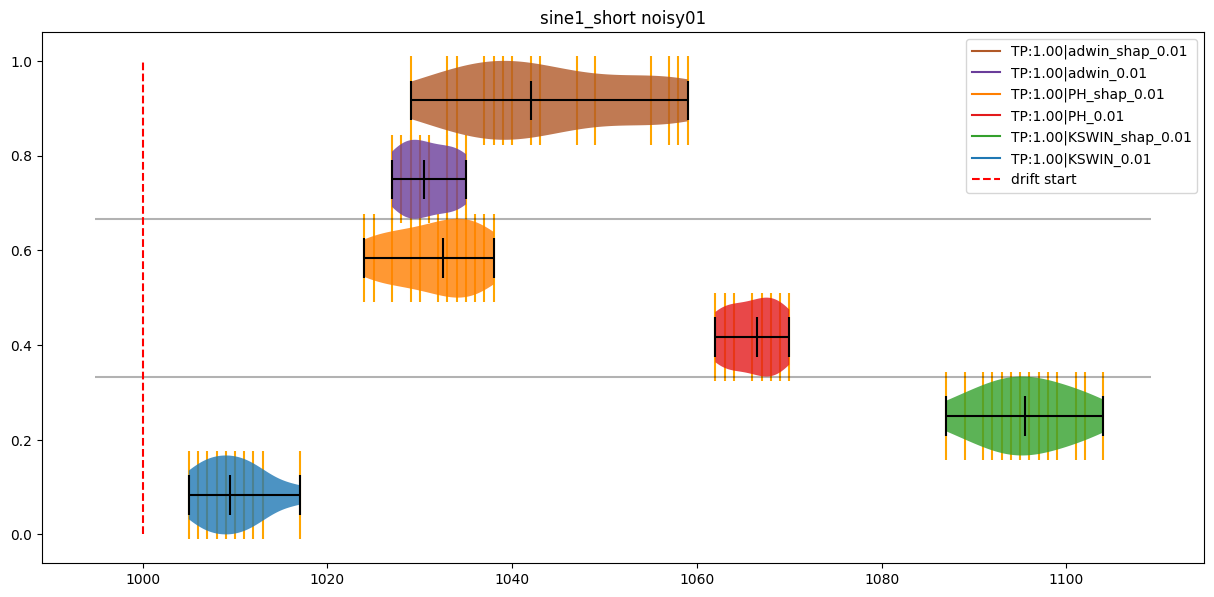

#################### sine2_short noisy01 3000 ####################
[(50, 2), (50, 2), (50, 2)]


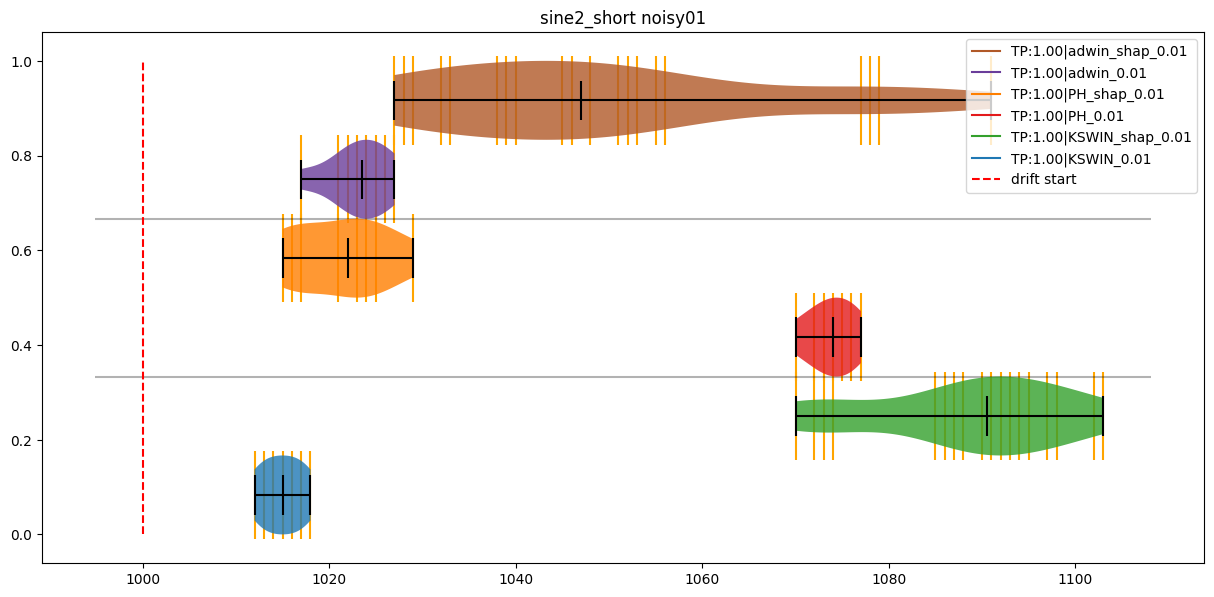

#################### smooth concept drift noisy01 3000 ####################
[(50, 2), (50, 2), (50, 2)]


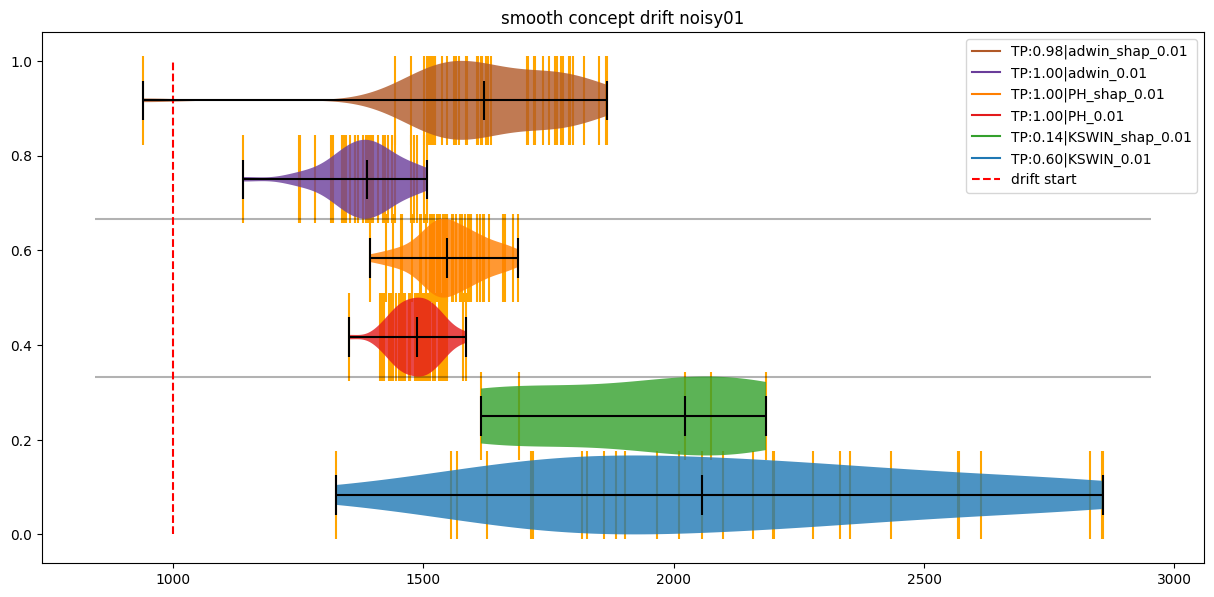

#################### abrupt concept drift noisy01 3000 ####################
[(50, 2), (50, 2), (50, 2)]


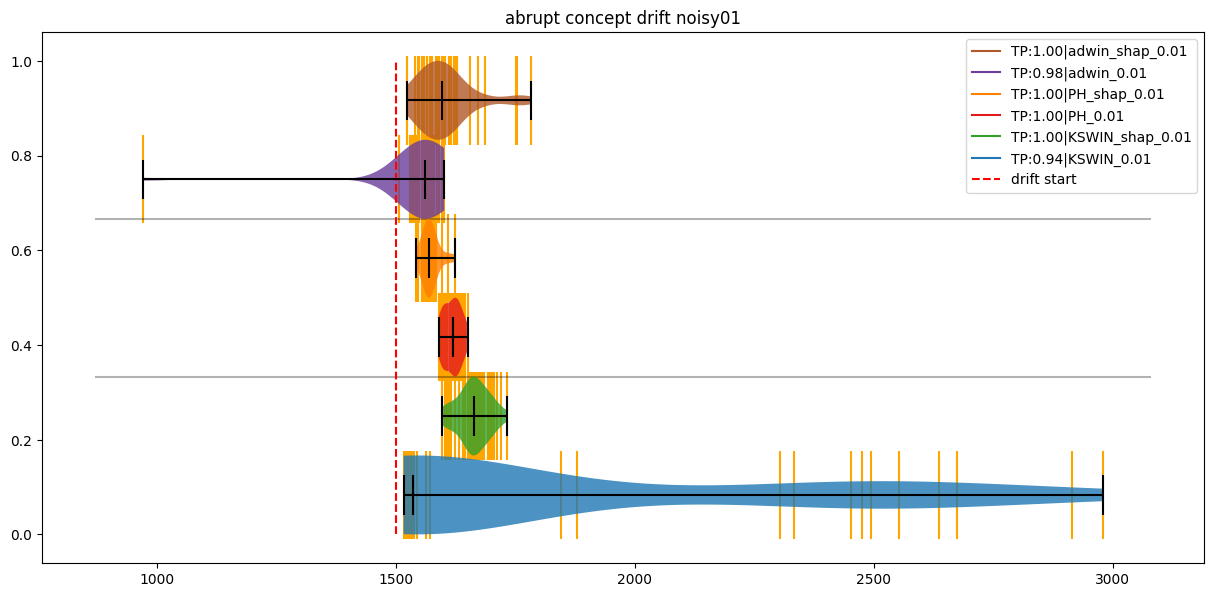

#################### abrupt covariate noisy01 3000 ####################
[(50, 2), (50, 2), (50, 2)]


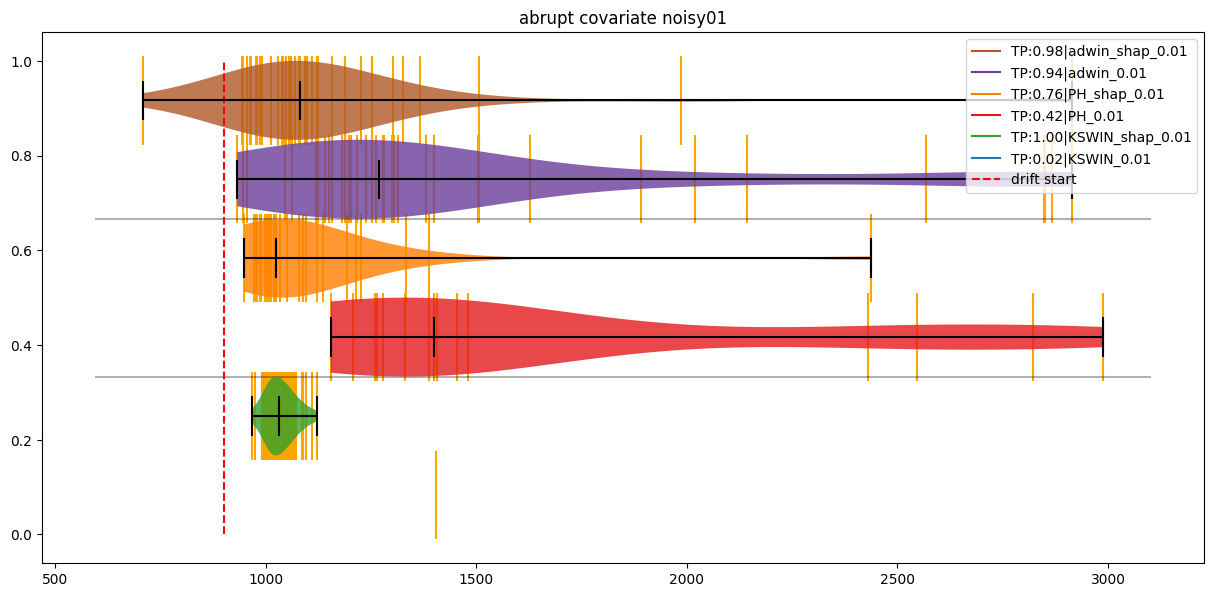

#################### gradual concept drift noisy01 3000 ####################
[(50, 2), (50, 2), (50, 2)]


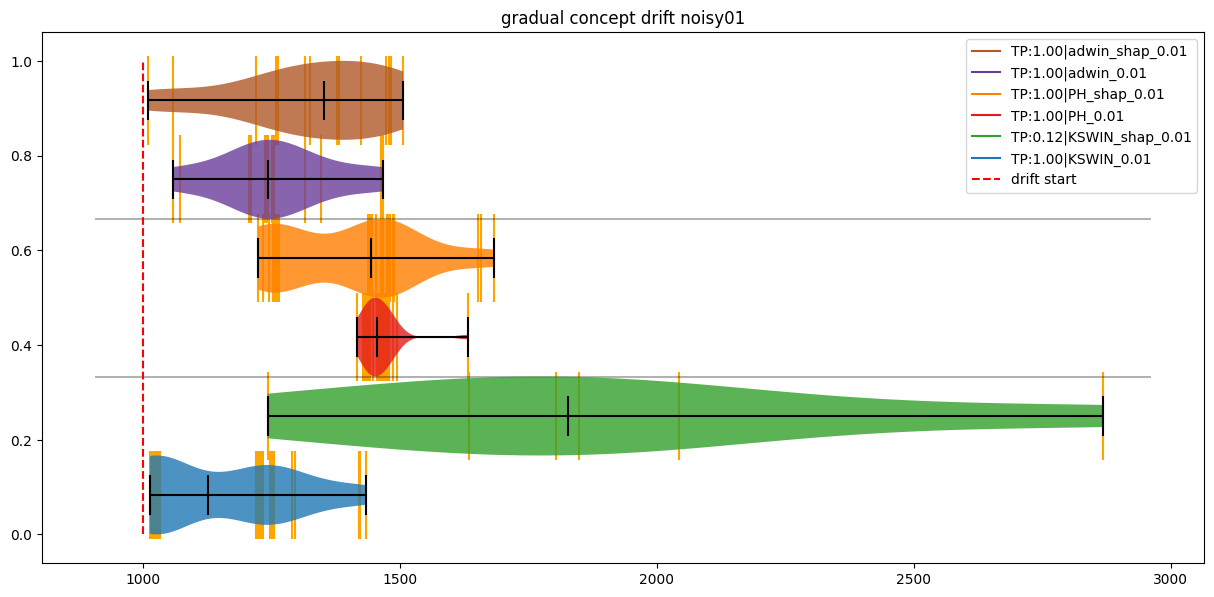

#################### nodrift_noisy01 3000 ####################
#################### stagger_short noisy05 6000 ####################
[(50, 2), (50, 2), (50, 2)]


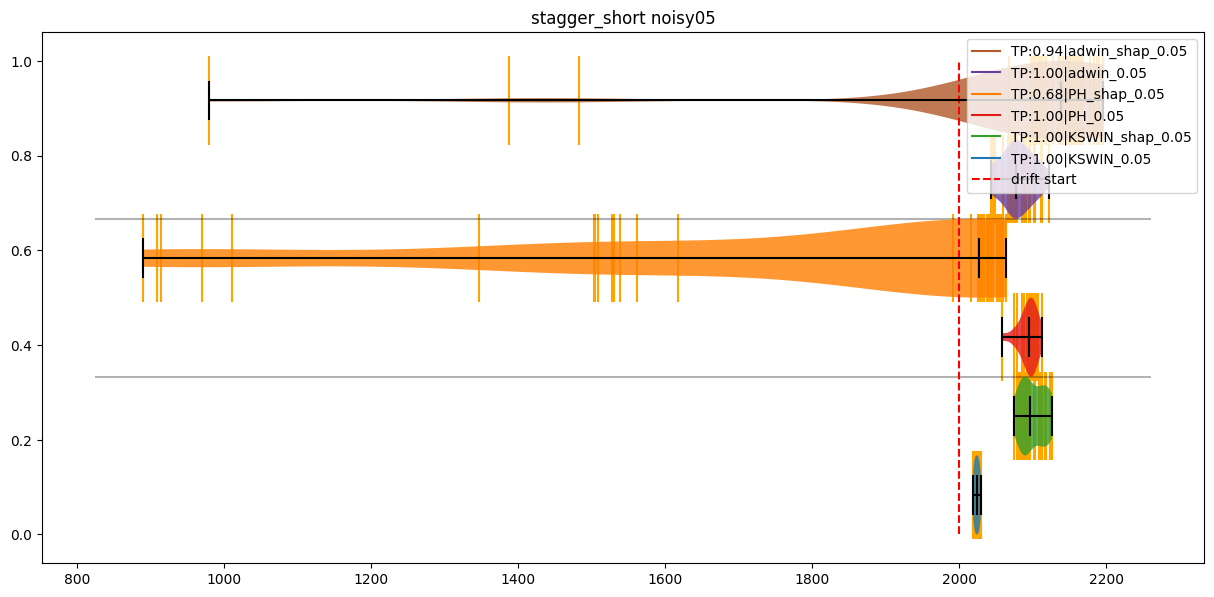

#################### sine1_short noisy05 3000 ####################
[(50, 2), (50, 2), (50, 2)]


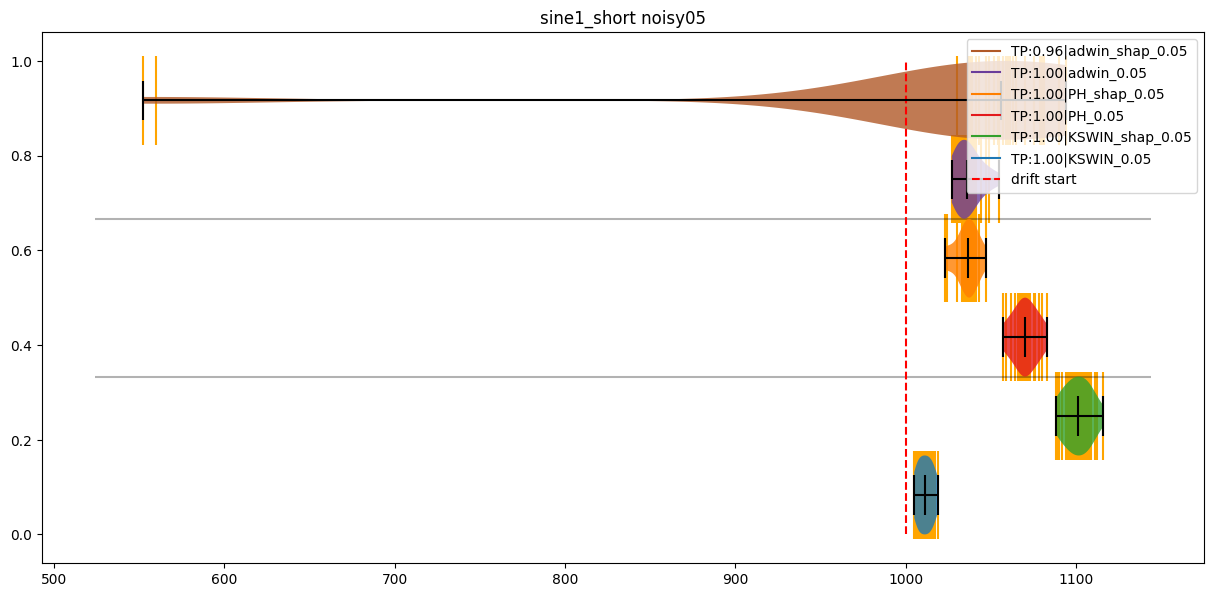

#################### sine2_short noisy05 3000 ####################
[(50, 2), (50, 2), (50, 2)]


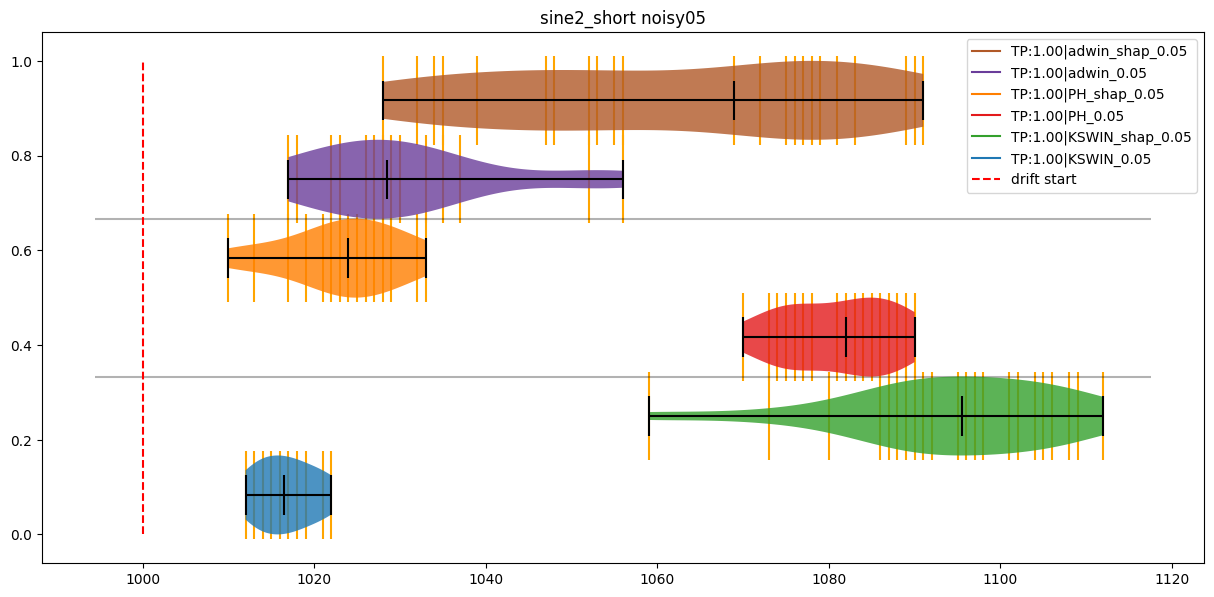

#################### smooth concept drift noisy05 3000 ####################
[(50, 2), (50, 2), (50, 2)]


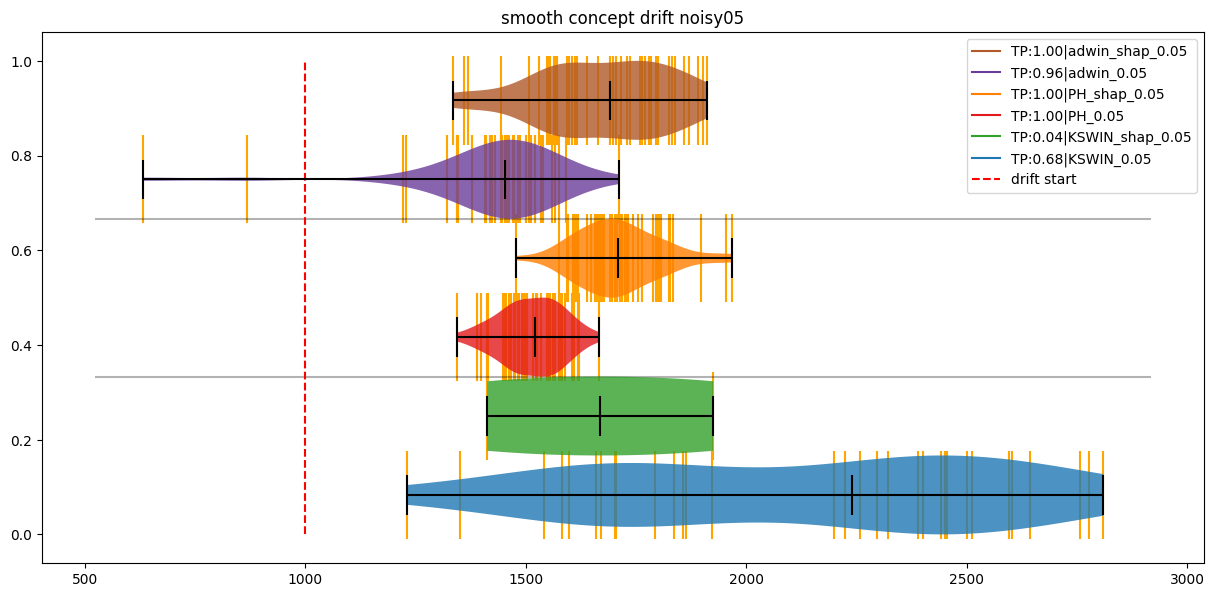

#################### abrupt concept drift noisy05 3000 ####################
[(50, 2), (50, 2), (50, 2)]


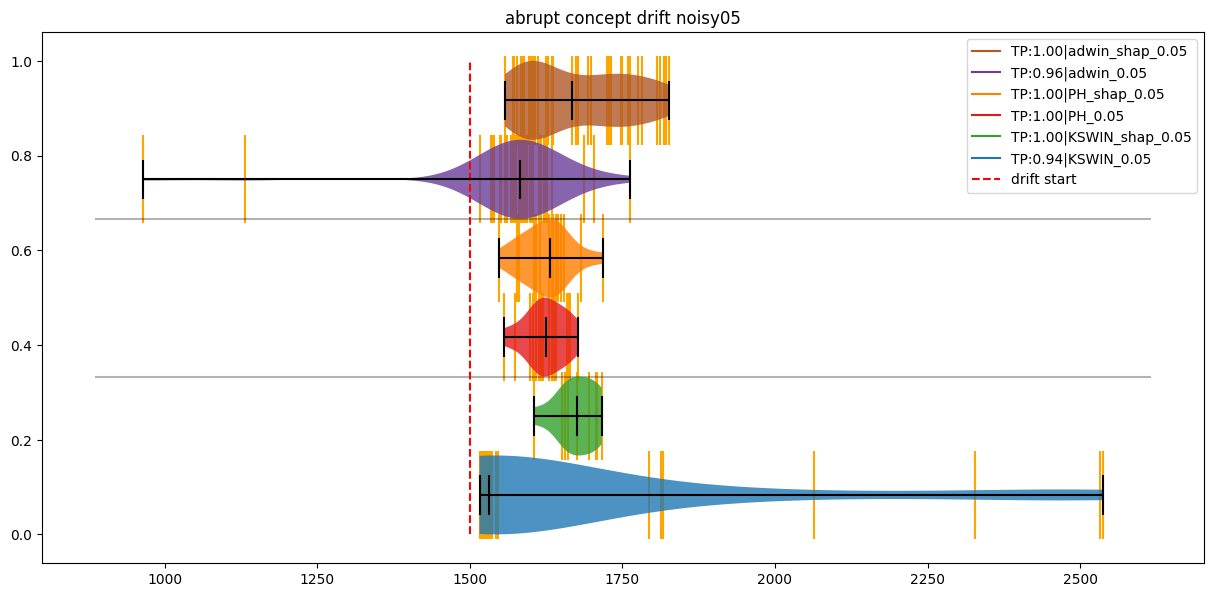

#################### abrupt covariate noisy05 3000 ####################
[(50, 2), (50, 2), (50, 2)]


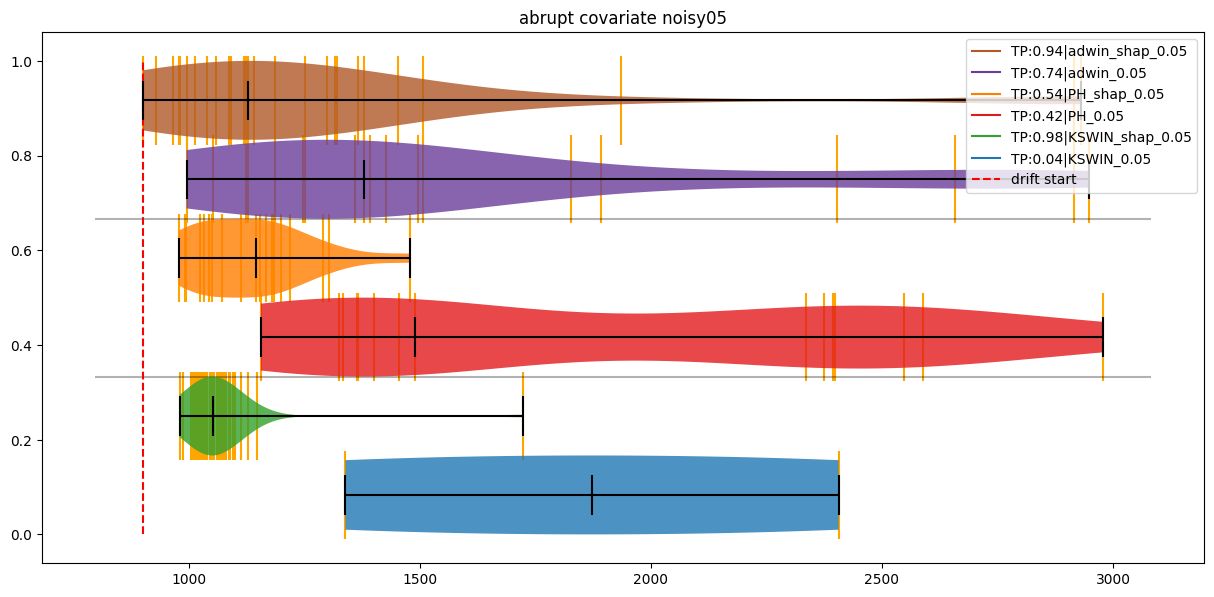

#################### gradual concept drift noisy05 3000 ####################
[(50, 2), (50, 2), (50, 2)]


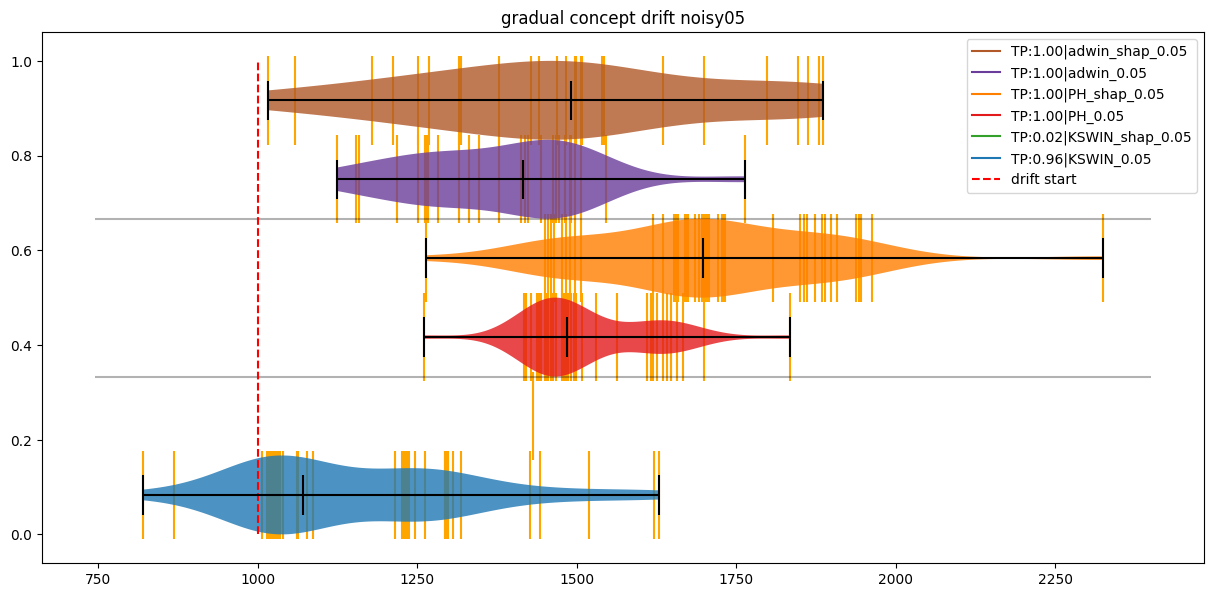

#################### nodrift_noisy05 3000 ####################
#################### stagger_short noisy1 6000 ####################
[(50, 2), (50, 2), (50, 2)]


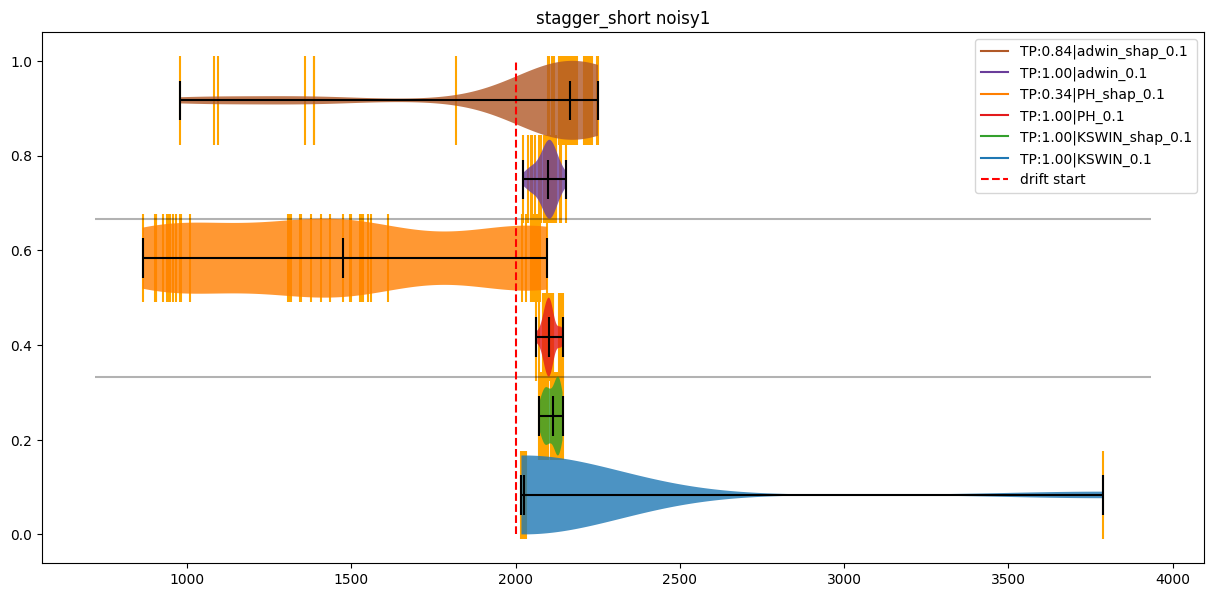

#################### sine1_short noisy1 3000 ####################
[(50, 2), (50, 2), (50, 2)]


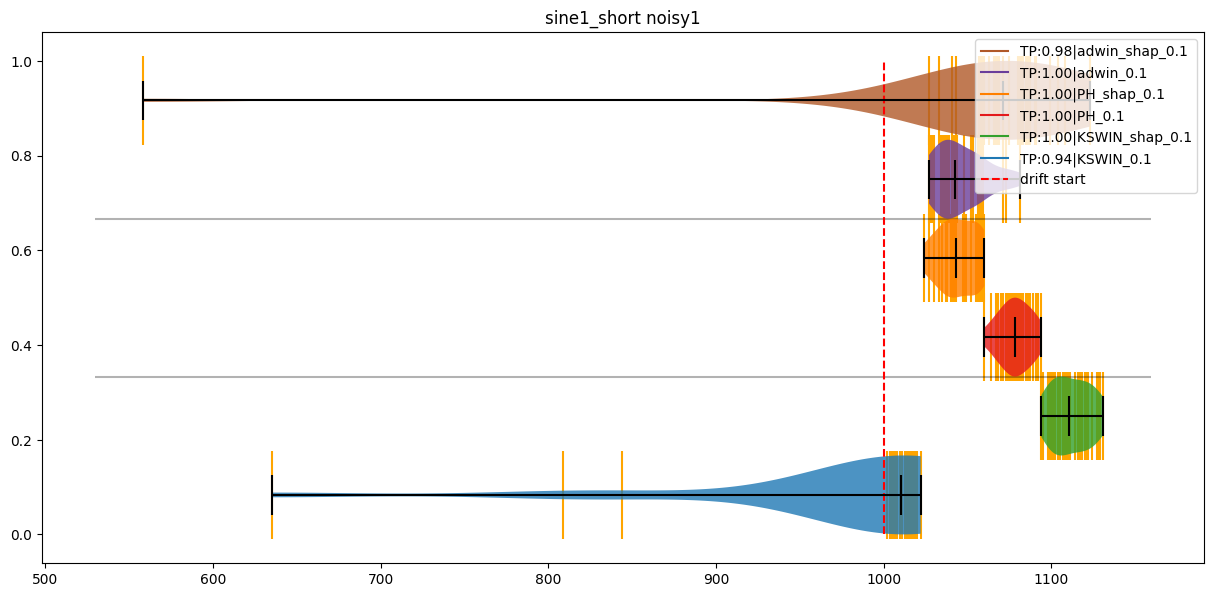

#################### sine2_short noisy1 3000 ####################
[(50, 2), (50, 2), (50, 2)]


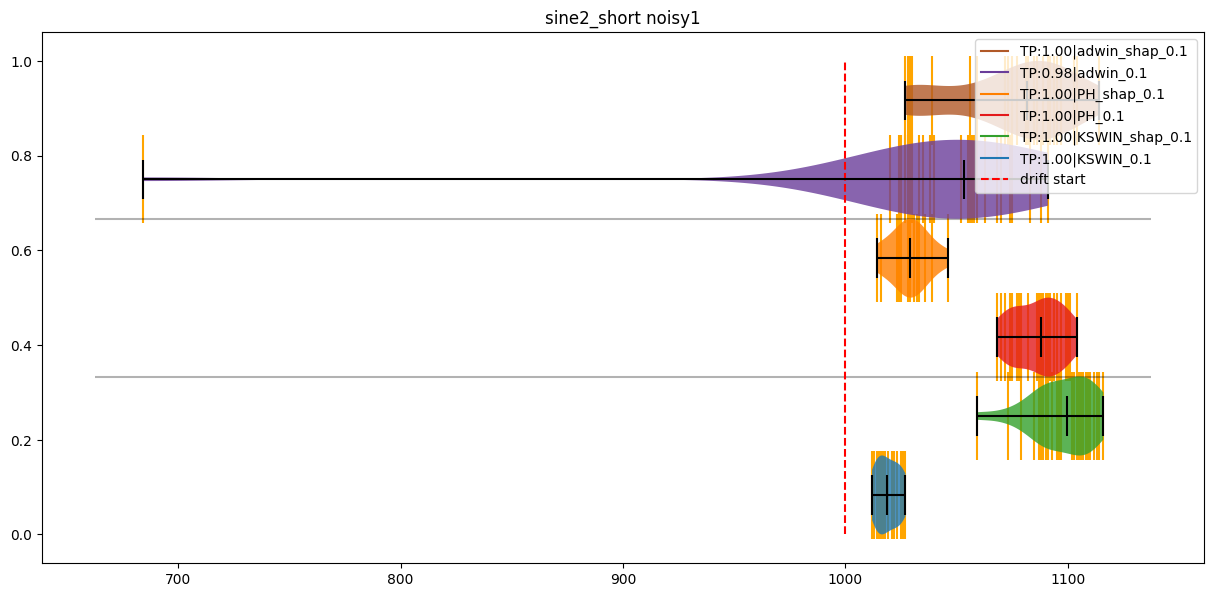

#################### smooth concept drift noisy1 3000 ####################
[(50, 2), (50, 2), (50, 2)]


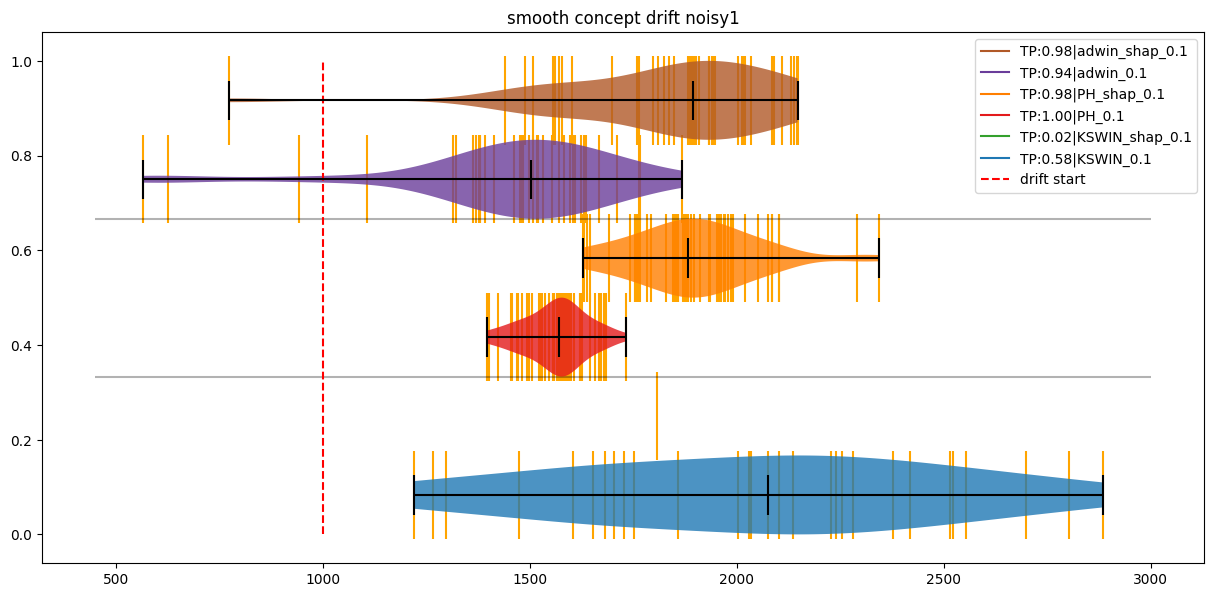

#################### abrupt concept drift noisy1 3000 ####################
[(50, 2), (50, 2), (50, 2)]


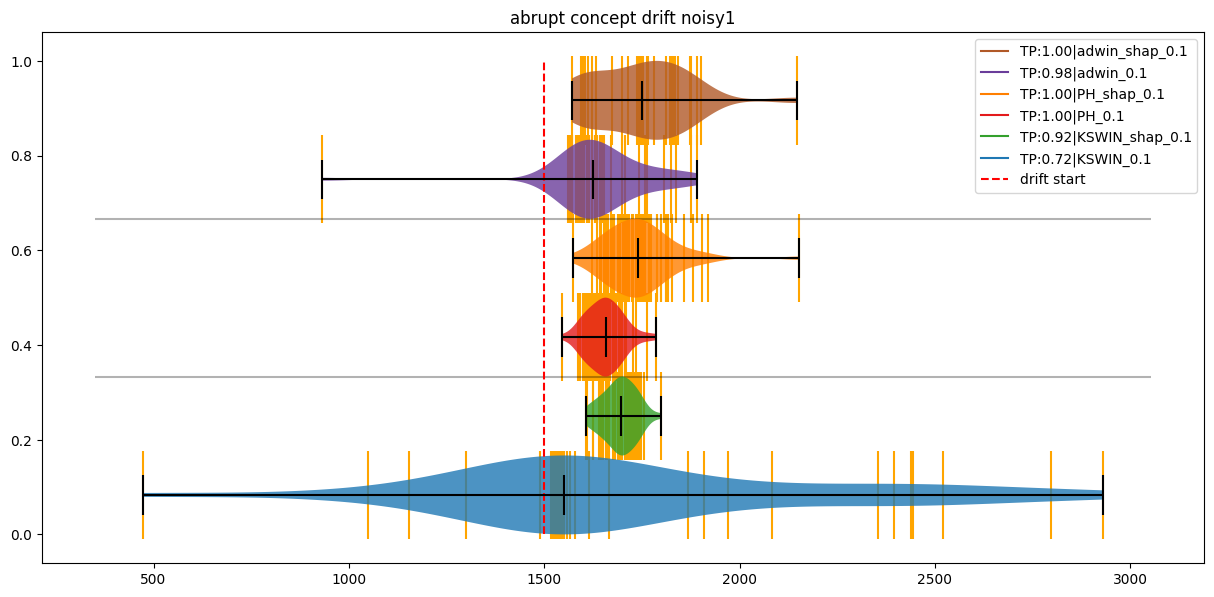

#################### abrupt covariate noisy1 3000 ####################
[(50, 2), (50, 2), (50, 2)]


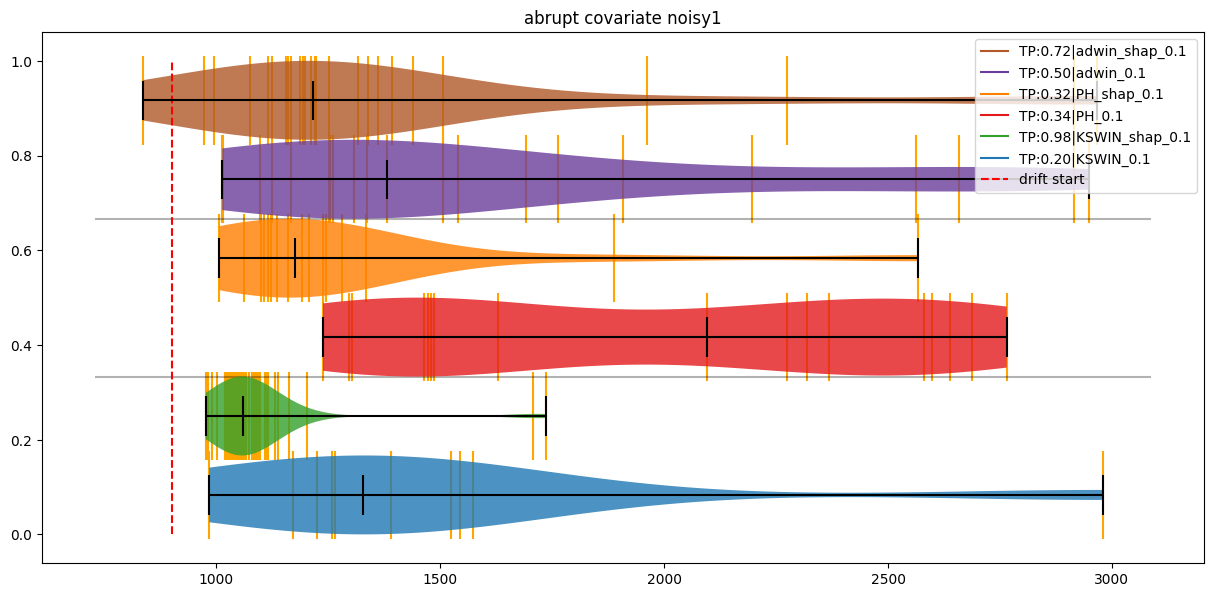

#################### gradual concept drift noisy1 3000 ####################
[(50, 2), (50, 2), (50, 2)]


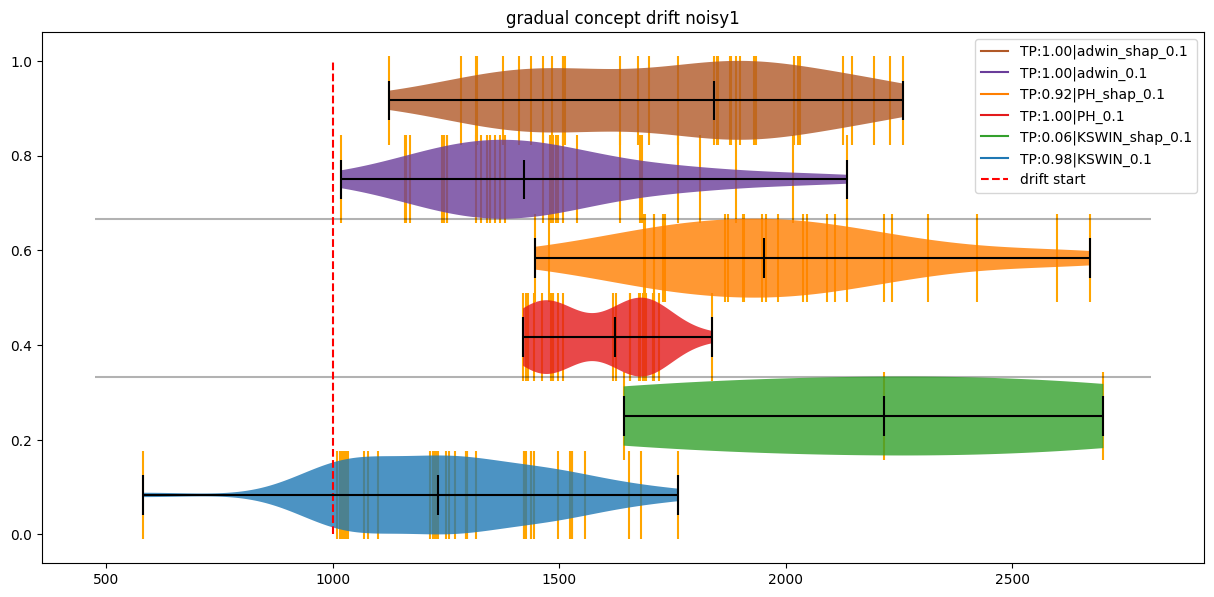

#################### nodrift_noisy1 3000 ####################
#################### stagger_short noisy5 6000 ####################
[(50, 2), (50, 2), (50, 2)]


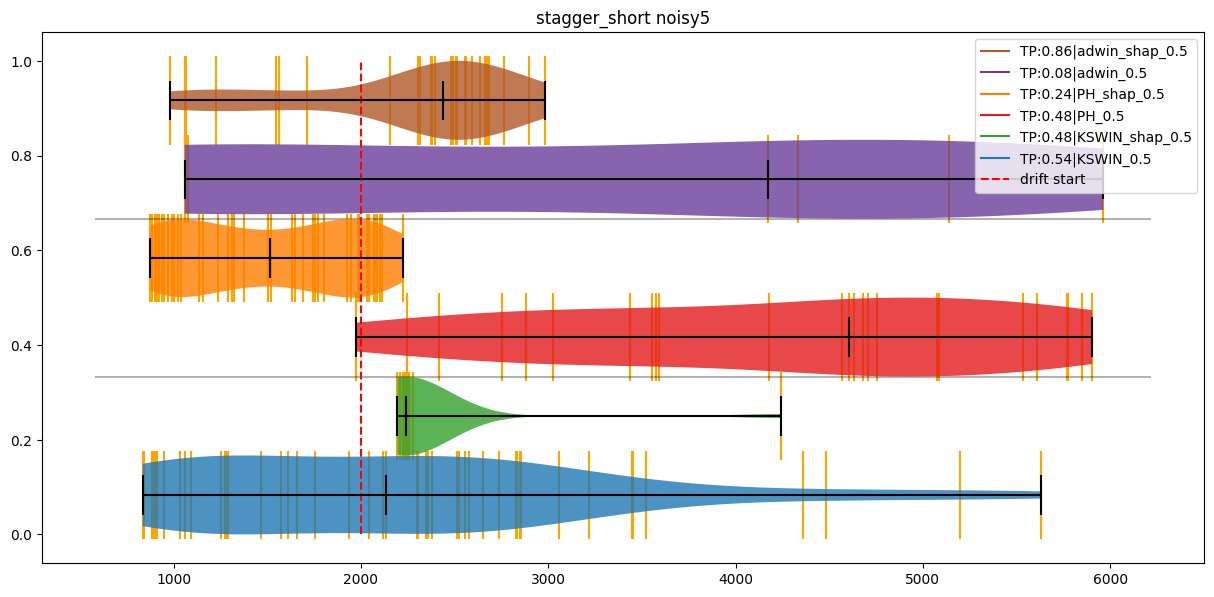

#################### sine1_short noisy5 3000 ####################
[(50, 2), (50, 2), (50, 2)]


invalid value encountered in scalar divide


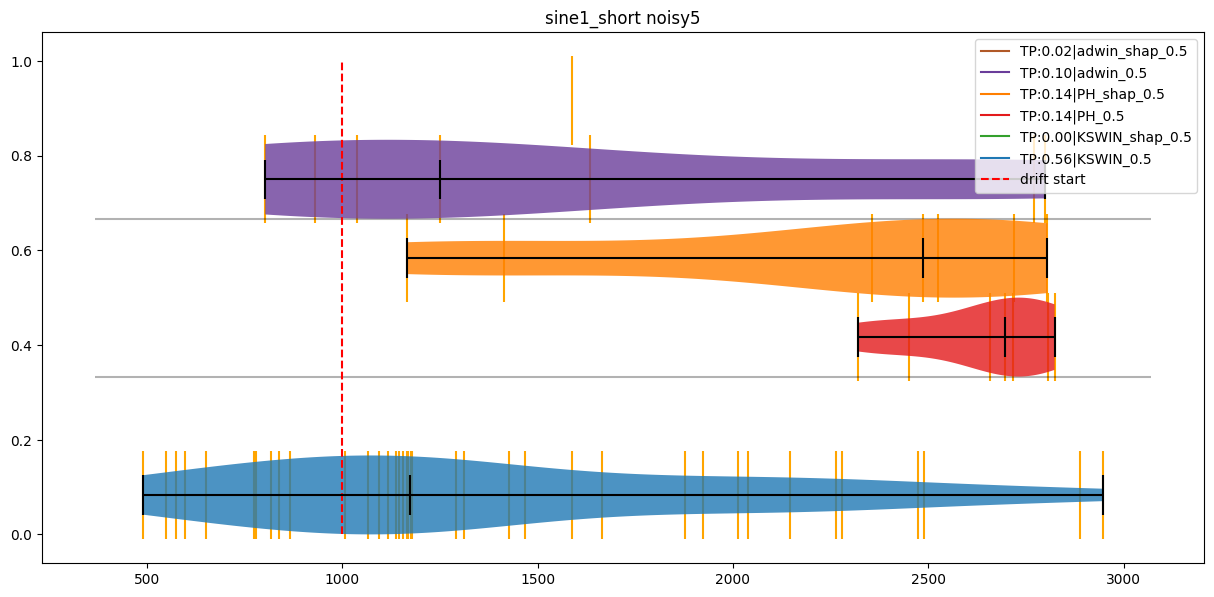

#################### sine2_short noisy5 3000 ####################
[(50, 2), (50, 2), (50, 2)]


invalid value encountered in scalar divide


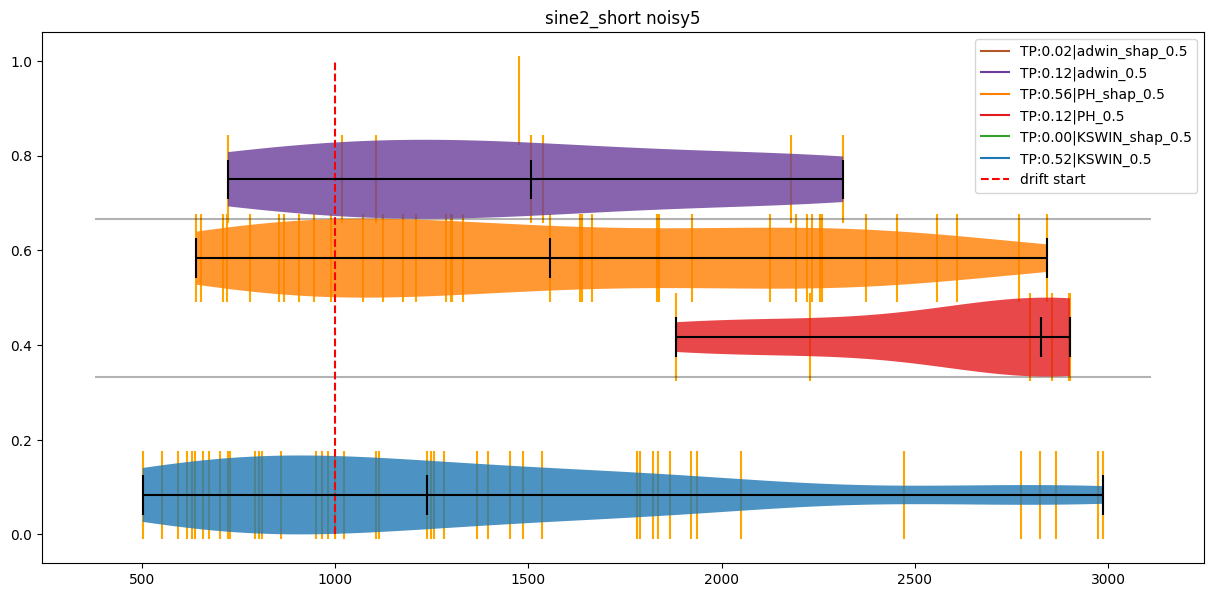

#################### smooth concept drift noisy5 3000 ####################
[(50, 2), (50, 2), (50, 2)]


invalid value encountered in scalar divide


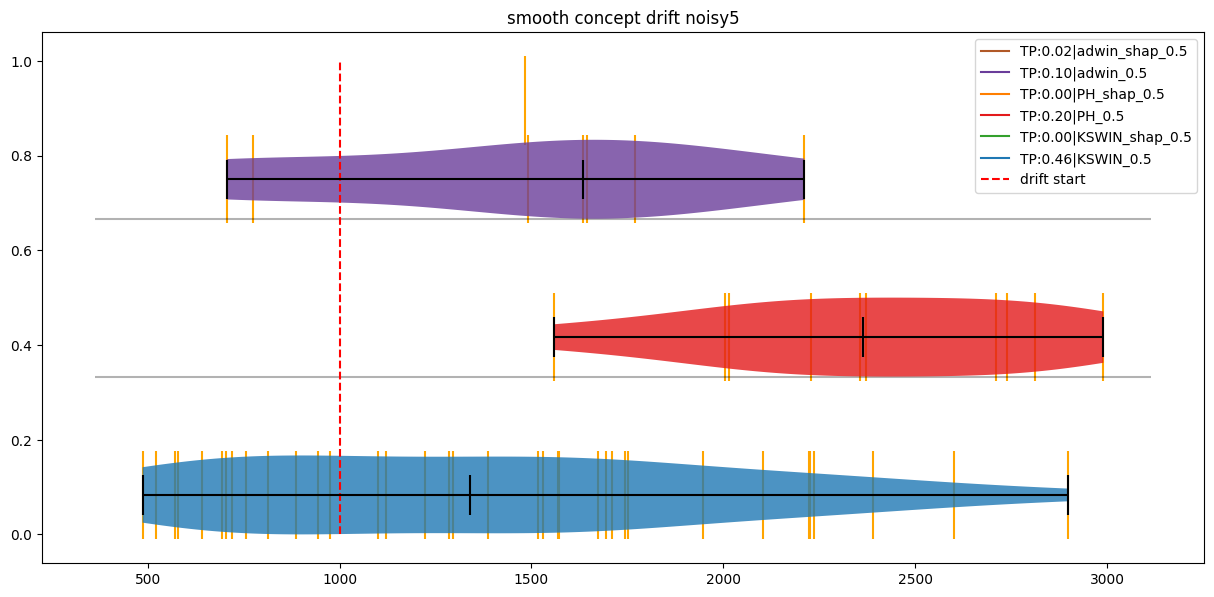

#################### abrupt concept drift noisy5 3000 ####################
[(50, 2), (50, 2), (50, 2)]


invalid value encountered in scalar divide


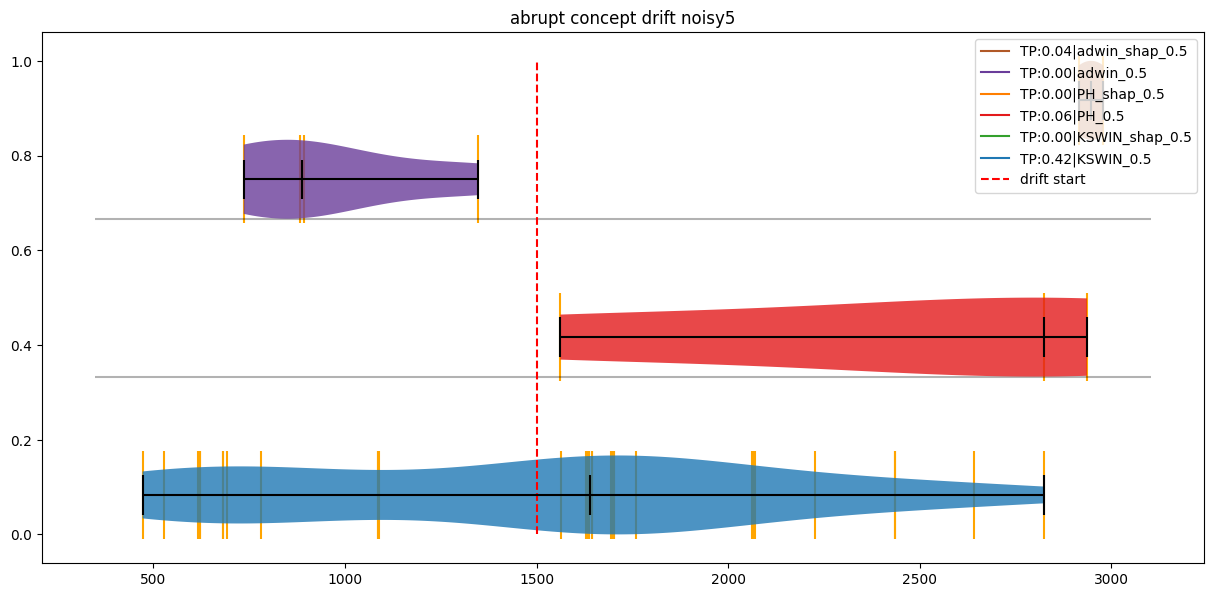

#################### abrupt covariate noisy5 3000 ####################
[(50, 2), (50, 2), (50, 2)]


invalid value encountered in scalar divide


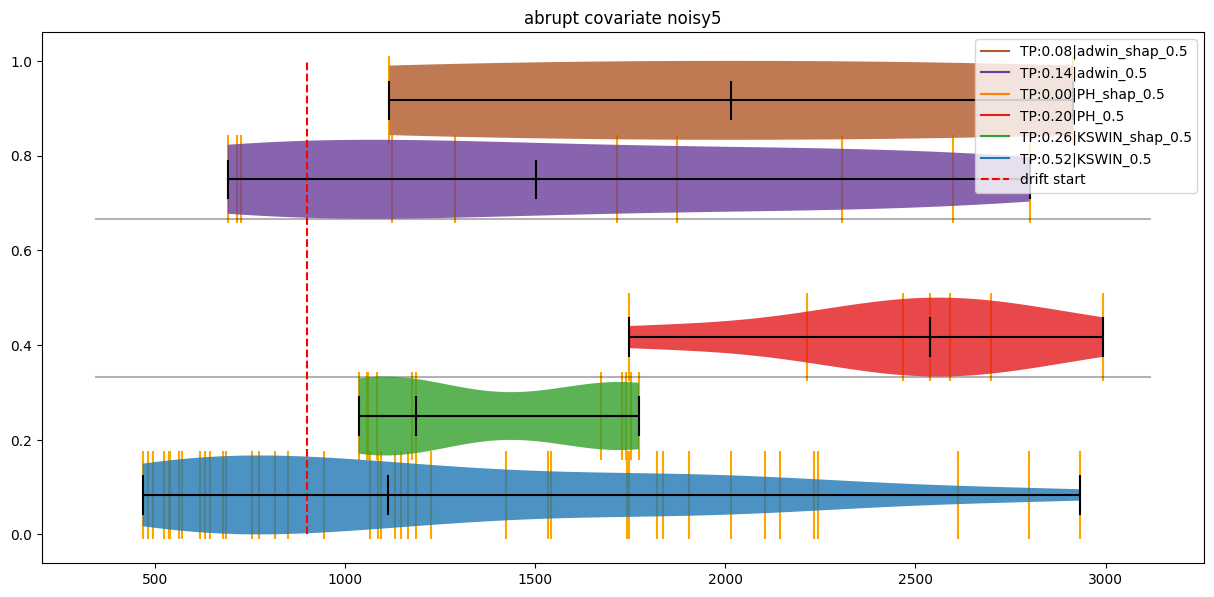

#################### gradual concept drift noisy5 3000 ####################
[(50, 2), (50, 2), (50, 2)]


invalid value encountered in scalar divide


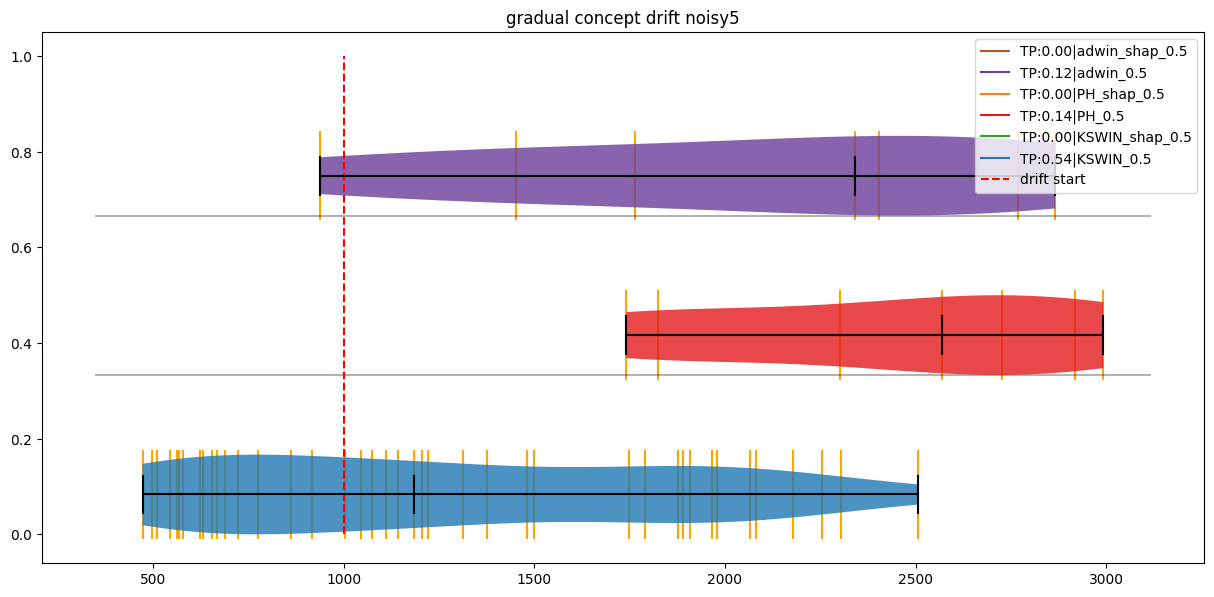

#################### nodrift_noisy5 3000 ####################


In [52]:
i=8 # Problem from 8
for f in list_df_generate_fcts:#[i:i+1]: 
    D_G = f()
    print("#"*20, f"{D_G.drift_name} {D_G.n}", "#"*20)
    if("nodrift" in D_G.drift_name):
        continue
    if(D_G.noise_rate!=0 ):
        df_results_dataset, sep_bar_indexes = get_df_detections(D_G, results,
                                                selected_methods, exp_type="df_reset", path=results_path+"/", noisy=True)
    else:
        df_results_dataset, sep_bar_indexes = get_df_detections(D_G, results,
                                                selected_methods, exp_type="df_reset", path=results_path+"/", noisy=False)

    ax = plot_violins(D_G, df_results_dataset, ax=None, sep_bar_indexes=sep_bar_indexes,
                            separate_true_false=False);
    ax.set_title(f"{D_G.drift_name}")
    #ax.set_xlim(800,1150)
    plt.show()

In [53]:
single_drift = [f for f in list_df_generate_fcts if "mooth_concept_drif" in f.__name__]#[:3]
#single_drift = [f for f in list_df_generate_fcts if "abrupt_concept_drif" in f.__name__]#[:3]
#single_drift = [f for f in list_df_generate_fcts if "abrupt_covariate_drif" in f.__name__]#[:3]
#single_drift = [f for f in list_df_generate_fcts if "nodrift" in f.__name__]#[:3]
single_drift

[<function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0)>,
 <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0.001)>,
 <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0.01)>,
 <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0.05)>,
 <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0.1)>,
 <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0.5)>]

In [54]:
for i,f in enumerate(single_drift[:]): 
    D_G = f()
    print(D_G.drift_name.replace(" ", "_"))
    #print("#"*20, f"{D_G.drift_name} {D_G.n}", "#"*20)
    df_results_dataset, sep_bar_indexes = get_df_detections(D_G, results,
                                                selected_methods, exp_type="df_reset", path=results_path+"/", noisy=True)

smooth_concept_drift
[(50, 2), (50, 2), (50, 2)]
smooth_concept_drift_noisy001
[(50, 2), (50, 2), (50, 2)]
smooth_concept_drift_noisy01
[(50, 2), (50, 2), (50, 2)]
smooth_concept_drift_noisy05
[(50, 2), (50, 2), (50, 2)]
smooth_concept_drift_noisy1
[(50, 2), (50, 2), (50, 2)]
smooth_concept_drift_noisy5
[(50, 2), (50, 2), (50, 2)]


In [55]:
D_G = single_drift[0]()
selected_methods = [["ADWIN"],["PH"],["KSWIN"]][1]

In [56]:
single_drift = [f for f in list_df_generate_fcts if "mooth_concept_drif" in f.__name__]#[:3]
#single_drift = [f for f in list_df_generate_fcts if "abrupt_concept_drif" in f.__name__]#[:3]
#single_drift = [f for f in list_df_generate_fcts if "abrupt_covariate_drif" in f.__name__]#[:3]
single_drift[:]

[<function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0)>,
 <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0.001)>,
 <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0.01)>,
 <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0.05)>,
 <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0.1)>,
 <function __main__.generate_noisy_smooth_concept_drift(n_samples=3000, noise_rate=0.5)>]

## Detector vs ShapDetect - Noise Variation
### For a given selected method

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|PH_shap_0.0', 'TP:1.00|PH_shap_0.001', 'TP:1.00|PH_shap_0.01', 'TP:1.00|PH_shap_0.05', 'TP:0.98|PH_shap_0.1', 'TP:0.00|PH_shap_0.5']


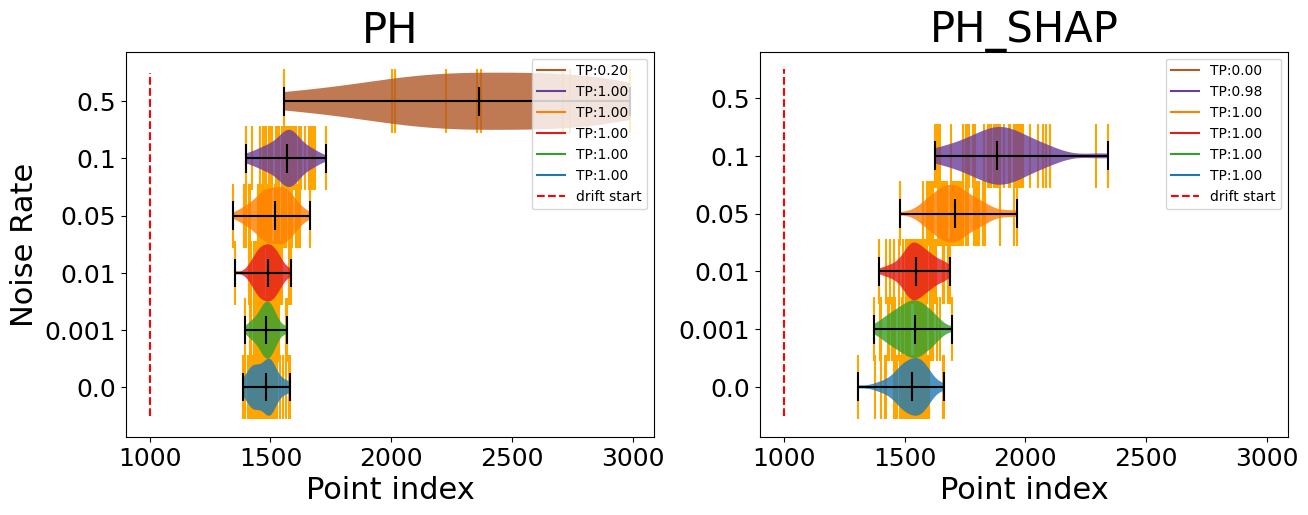

In [57]:
selected_methods = ["PH"]
ax = plot_violins_shap_noise(single_drift[:], D_G, selected_methods, results, path=results_path+"/")

### For all selected methods

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|adwin_shap_0.0', 'TP:0.98|adwin_shap_0.001', 'TP:0.98|adwin_shap_0.01', 'TP:1.00|adwin_shap_0.05', 'TP:0.98|adwin_shap_0.1', 'TP:0.02|adwin_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/smooth_concept_driftADWINnoise_distrib.pdf


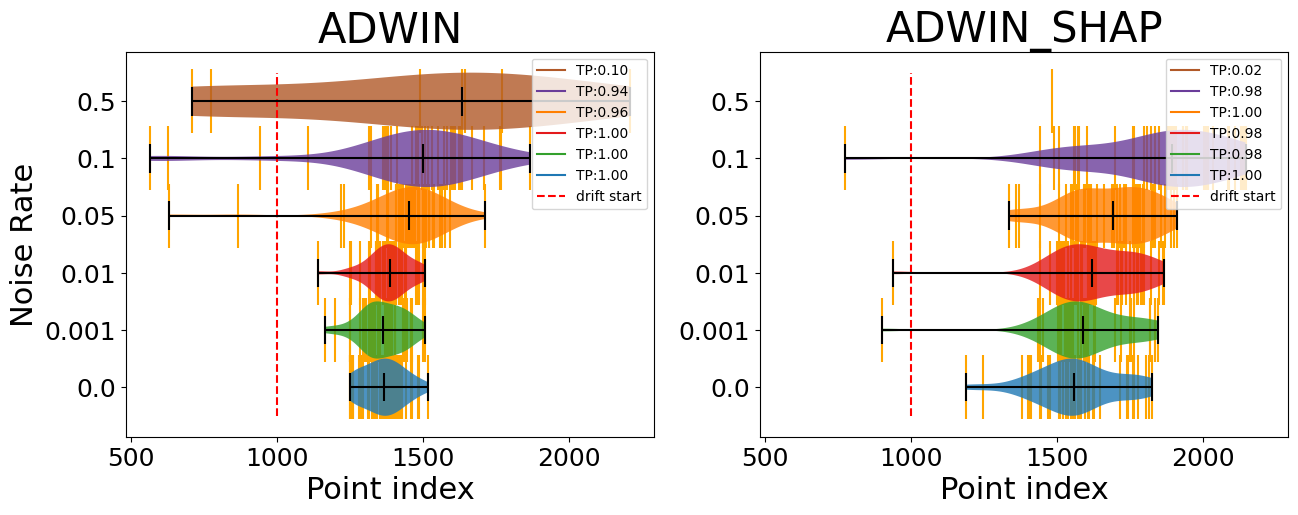

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|PH_shap_0.0', 'TP:1.00|PH_shap_0.001', 'TP:1.00|PH_shap_0.01', 'TP:1.00|PH_shap_0.05', 'TP:0.98|PH_shap_0.1', 'TP:0.00|PH_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/smooth_concept_driftPHnoise_distrib.pdf


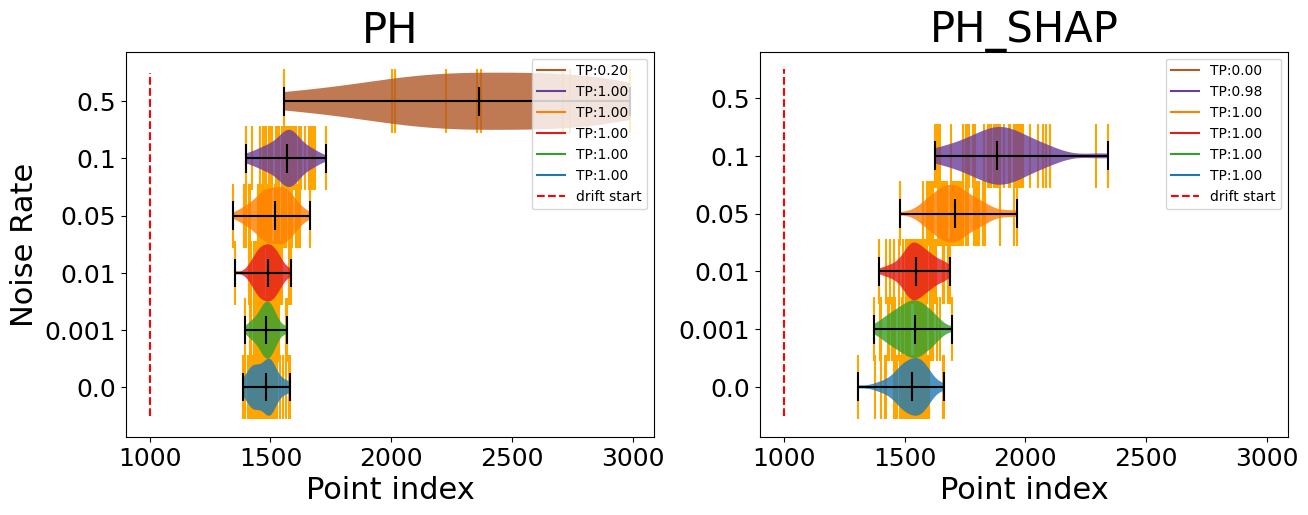

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:0.26|KSWIN_shap_0.0', 'TP:0.18|KSWIN_shap_0.001', 'TP:0.14|KSWIN_shap_0.01', 'TP:0.04|KSWIN_shap_0.05', 'TP:0.02|KSWIN_shap_0.1', 'TP:0.00|KSWIN_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/smooth_concept_driftKSWINnoise_distrib.pdf


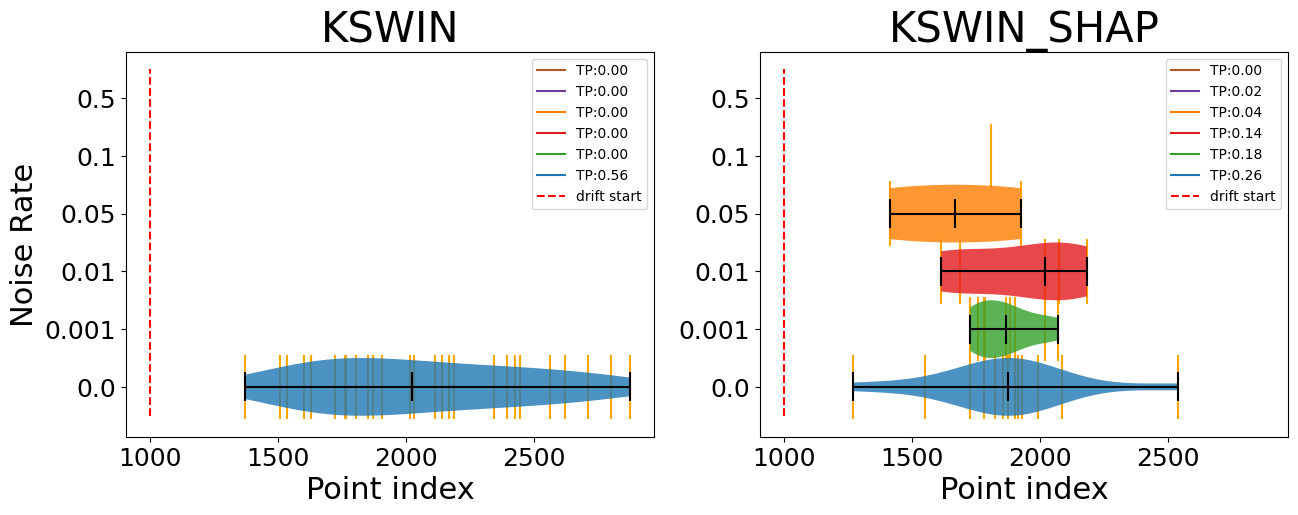

In [58]:
for selected_methods in [["ADWIN"],["PH"],["KSWIN"]]:
    ax = plot_violins_shap_noise(single_drift[:], D_G, selected_methods, results, path=results_path+"/")
    save_path = os.environ.get("FIGURES_PATH")+"_".join(single_drift[0].__name__.split("_")[2:])+selected_methods[0]
    save_path += 'noise_distrib.pdf'
    print(save_path)
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()


### For several drifts scenarios

In [59]:
results = os.listdir(results_path)

#################### New Drift: ####################


smooth concept drift
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|adwin_shap_0.0', 'TP:0.98|adwin_shap_0.001', 'TP:0.98|adwin_shap_0.01', 'TP:1.00|adwin_shap_0.05', 'TP:0.98|adwin_shap_0.1', 'TP:0.02|adwin_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/smooth_concept_driftADWINnoise_distrib.pdf


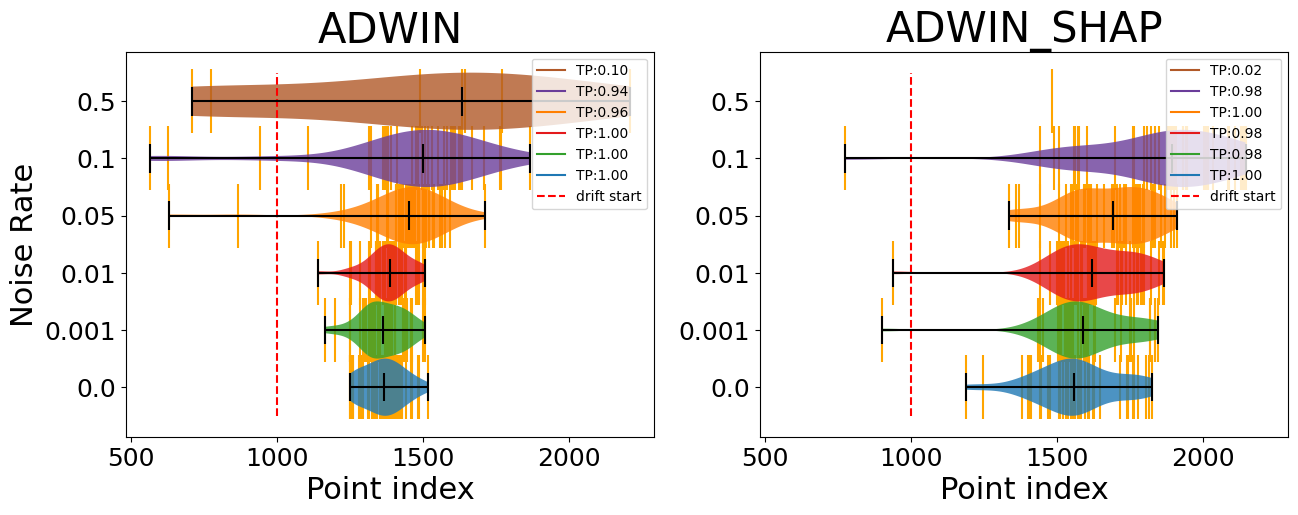

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|PH_shap_0.0', 'TP:1.00|PH_shap_0.001', 'TP:1.00|PH_shap_0.01', 'TP:1.00|PH_shap_0.05', 'TP:0.98|PH_shap_0.1', 'TP:0.00|PH_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/smooth_concept_driftPHnoise_distrib.pdf


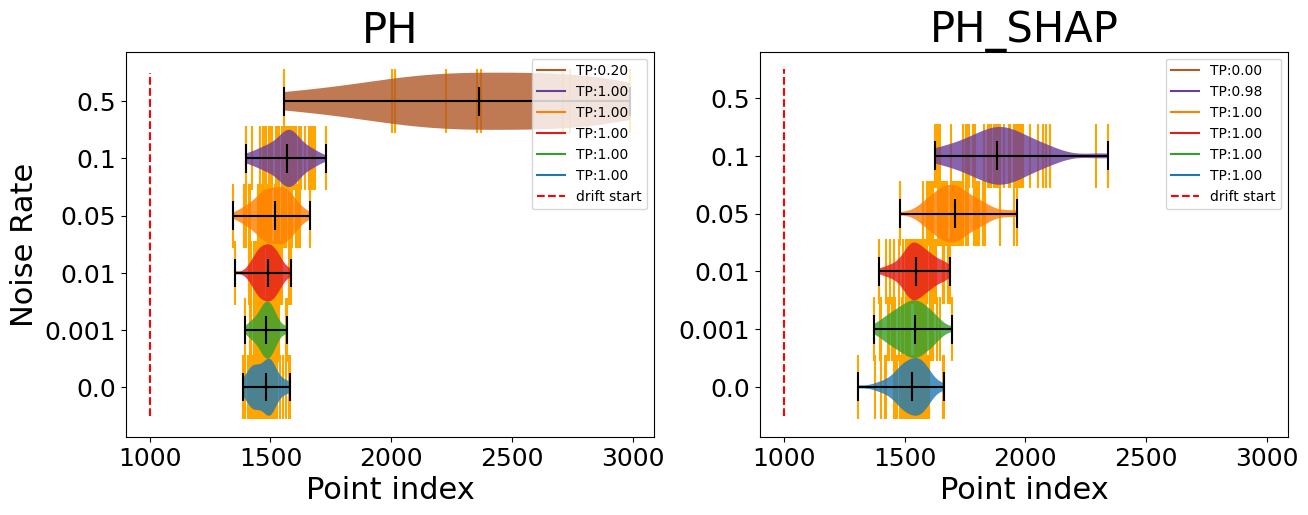

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:0.26|KSWIN_shap_0.0', 'TP:0.18|KSWIN_shap_0.001', 'TP:0.14|KSWIN_shap_0.01', 'TP:0.04|KSWIN_shap_0.05', 'TP:0.02|KSWIN_shap_0.1', 'TP:0.00|KSWIN_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/smooth_concept_driftKSWINnoise_distrib.pdf


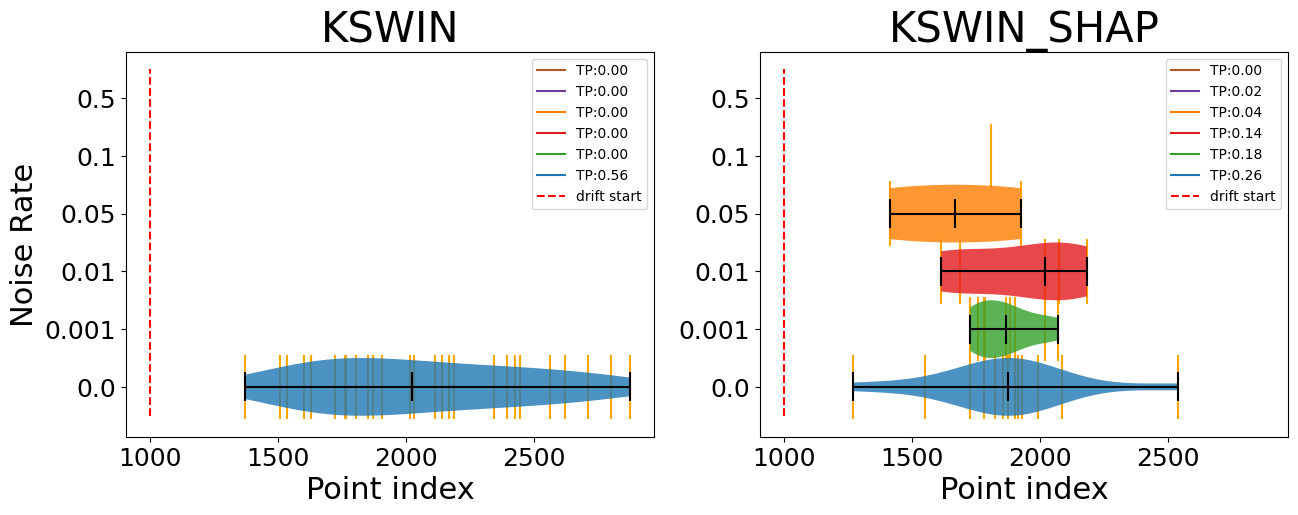

#################### New Drift: ####################
abrupt concept drift
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:0.96|adwin_shap_0.0', 'TP:0.94|adwin_shap_0.001', 'TP:1.00|adwin_shap_0.01', 'TP:1.00|adwin_shap_0.05', 'TP:1.00|adwin_shap_0.1', 'TP:0.04|adwin_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_concept_driftADWINnoise_distrib.pdf


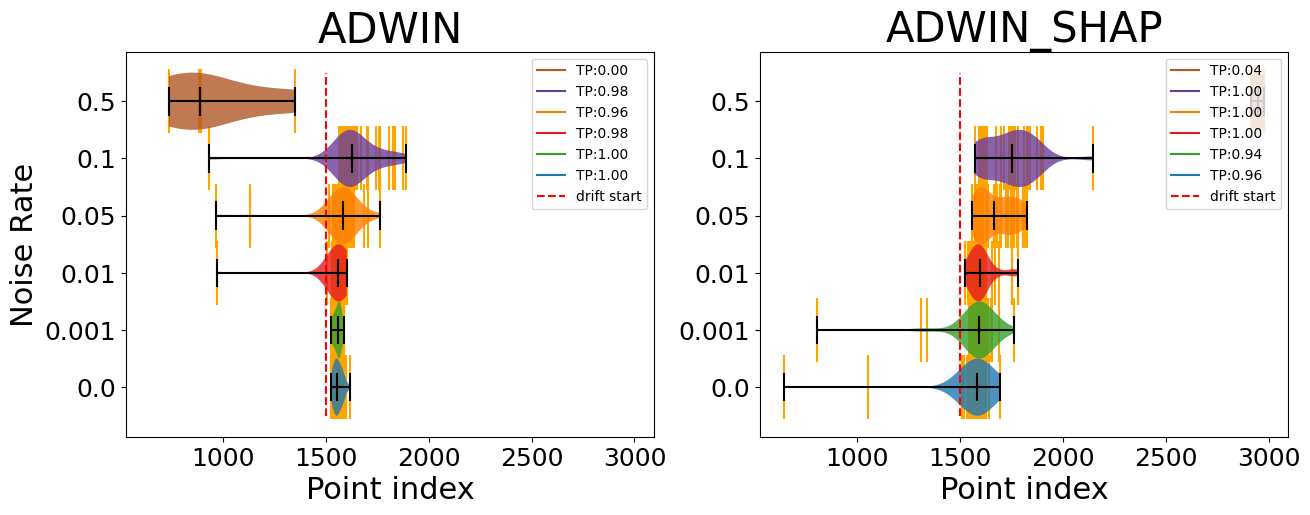

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|PH_shap_0.0', 'TP:1.00|PH_shap_0.001', 'TP:1.00|PH_shap_0.01', 'TP:1.00|PH_shap_0.05', 'TP:1.00|PH_shap_0.1', 'TP:0.00|PH_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_concept_driftPHnoise_distrib.pdf


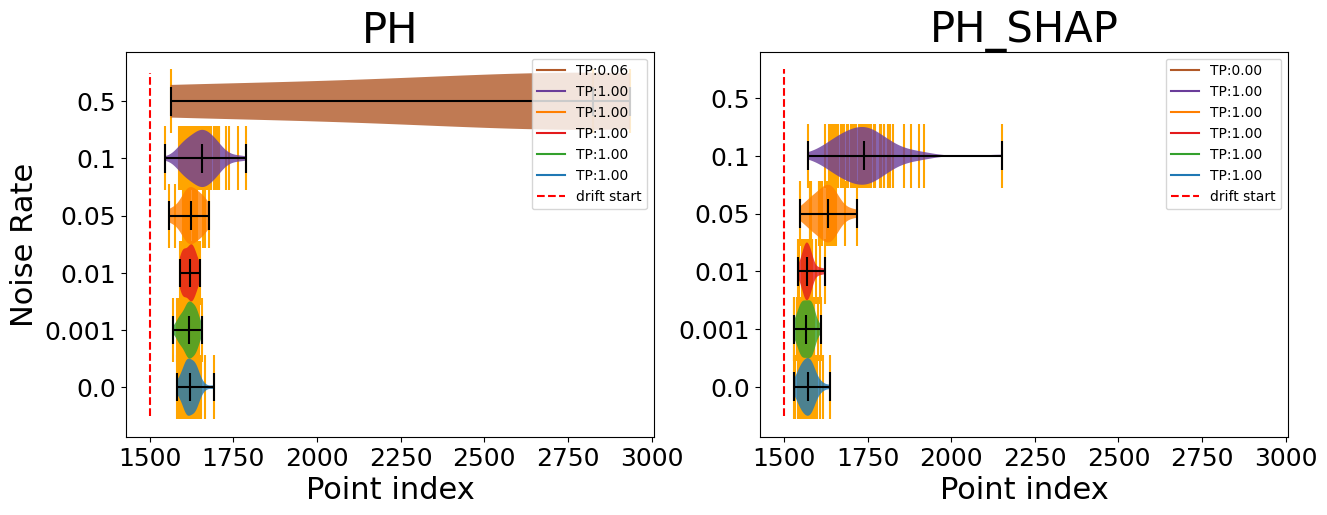

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|KSWIN_shap_0.0', 'TP:1.00|KSWIN_shap_0.001', 'TP:1.00|KSWIN_shap_0.01', 'TP:1.00|KSWIN_shap_0.05', 'TP:0.92|KSWIN_shap_0.1', 'TP:0.00|KSWIN_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_concept_driftKSWINnoise_distrib.pdf


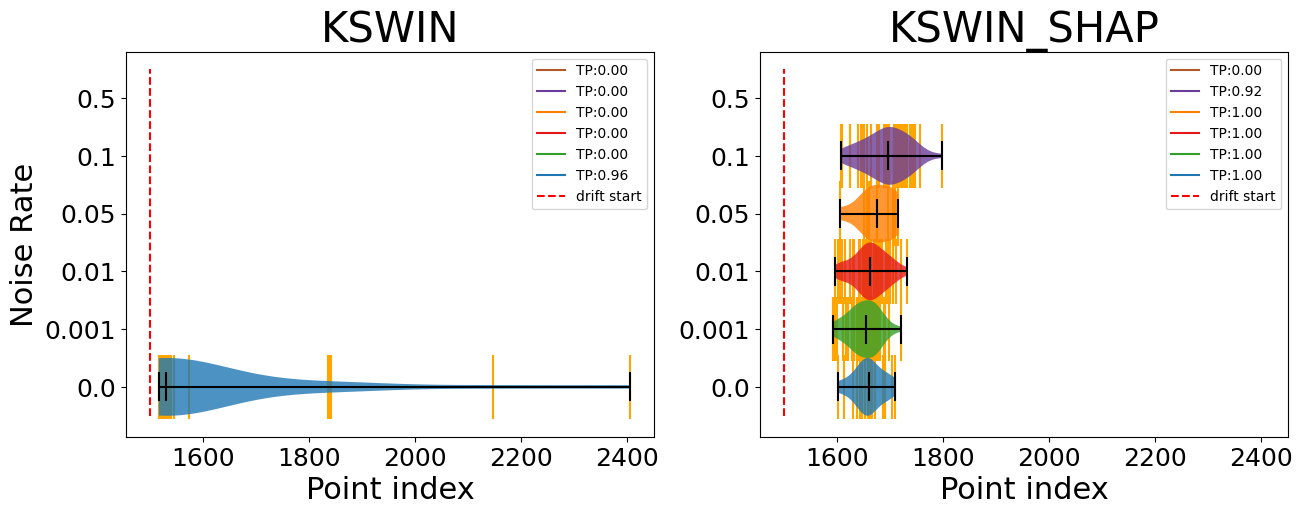

#################### New Drift: ####################
abrupt covariate
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:0.94|adwin_shap_0.0', 'TP:1.00|adwin_shap_0.001', 'TP:0.98|adwin_shap_0.01', 'TP:0.94|adwin_shap_0.05', 'TP:0.72|adwin_shap_0.1', 'TP:0.08|adwin_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_covariate_driftADWINnoise_distrib.pdf


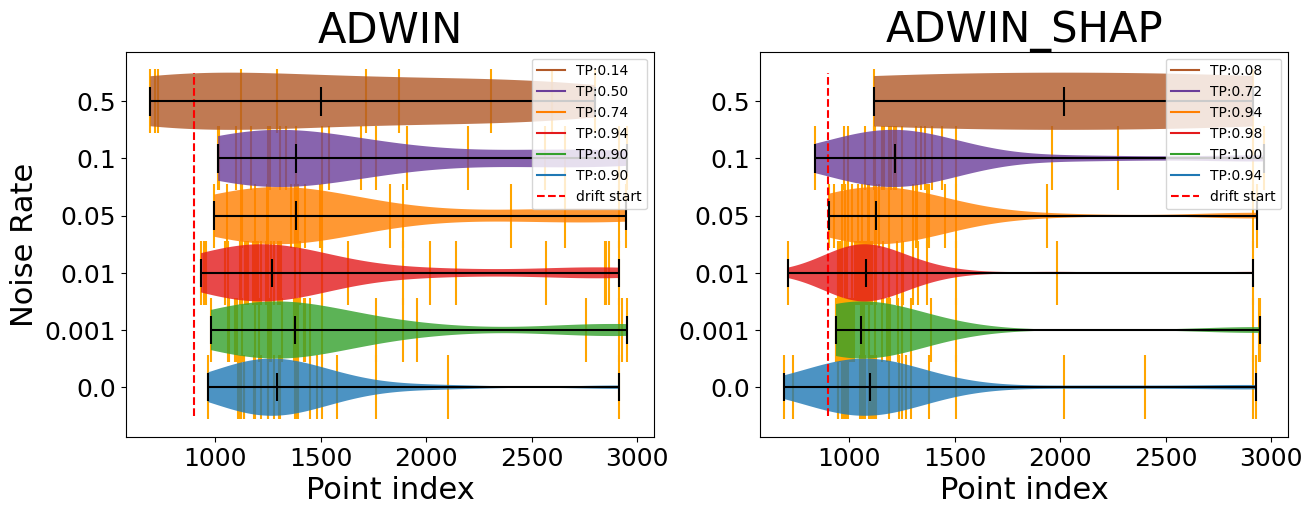

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:0.94|PH_shap_0.0', 'TP:0.88|PH_shap_0.001', 'TP:0.76|PH_shap_0.01', 'TP:0.54|PH_shap_0.05', 'TP:0.32|PH_shap_0.1', 'TP:0.00|PH_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_covariate_driftPHnoise_distrib.pdf


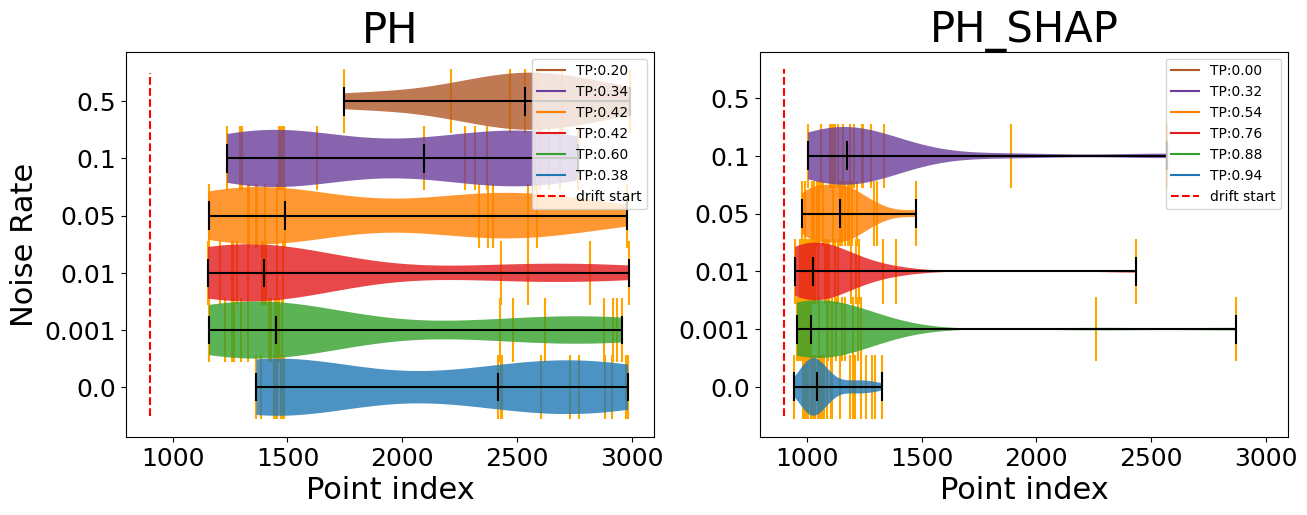

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|KSWIN_shap_0.0', 'TP:1.00|KSWIN_shap_0.001', 'TP:1.00|KSWIN_shap_0.01', 'TP:0.98|KSWIN_shap_0.05', 'TP:0.98|KSWIN_shap_0.1', 'TP:0.26|KSWIN_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_covariate_driftKSWINnoise_distrib.pdf


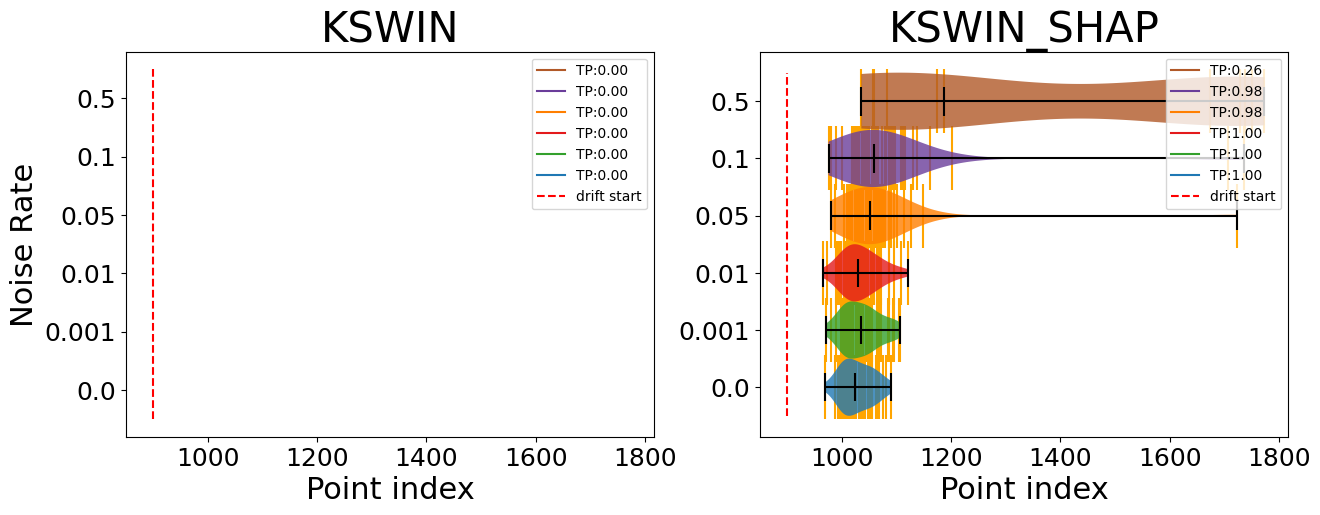

#################### New Drift: ####################
sine2_short
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|adwin_shap_0.0', 'TP:1.00|adwin_shap_0.001', 'TP:1.00|adwin_shap_0.01', 'TP:1.00|adwin_shap_0.05', 'TP:1.00|adwin_shap_0.1', 'TP:0.02|adwin_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine2ADWINnoise_distrib.pdf


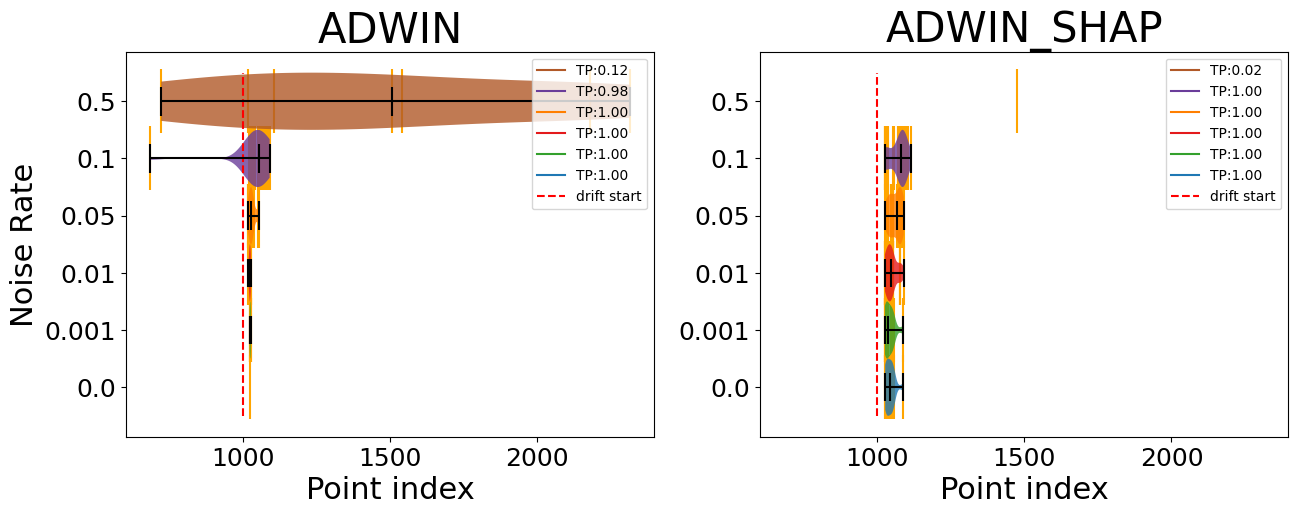

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|PH_shap_0.0', 'TP:1.00|PH_shap_0.001', 'TP:1.00|PH_shap_0.01', 'TP:1.00|PH_shap_0.05', 'TP:1.00|PH_shap_0.1', 'TP:0.56|PH_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine2PHnoise_distrib.pdf


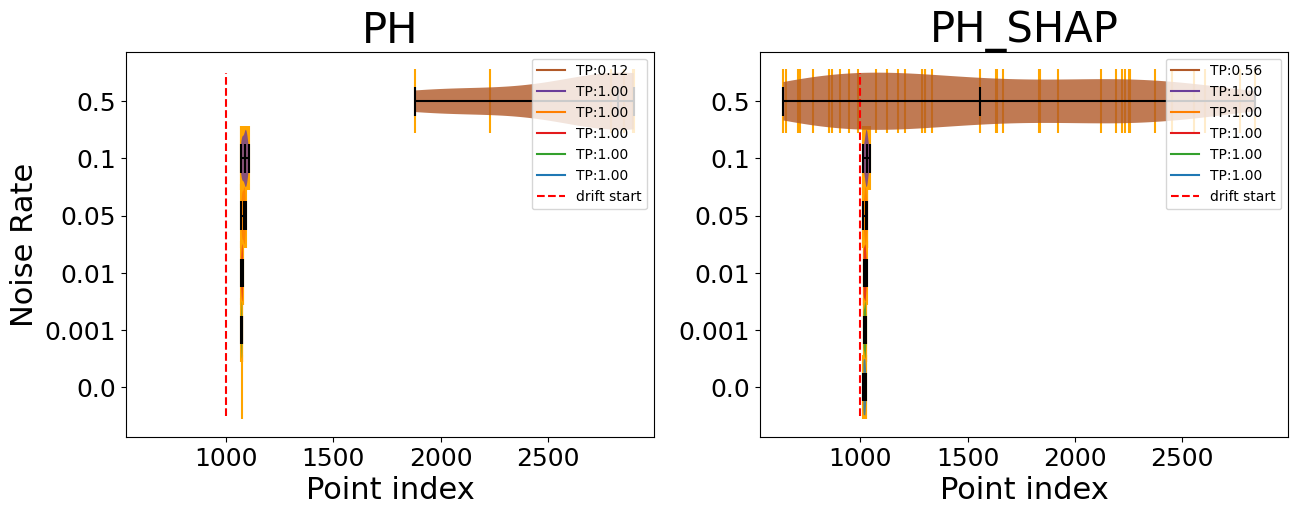

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|KSWIN_shap_0.0', 'TP:1.00|KSWIN_shap_0.001', 'TP:1.00|KSWIN_shap_0.01', 'TP:1.00|KSWIN_shap_0.05', 'TP:1.00|KSWIN_shap_0.1', 'TP:0.00|KSWIN_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine2KSWINnoise_distrib.pdf


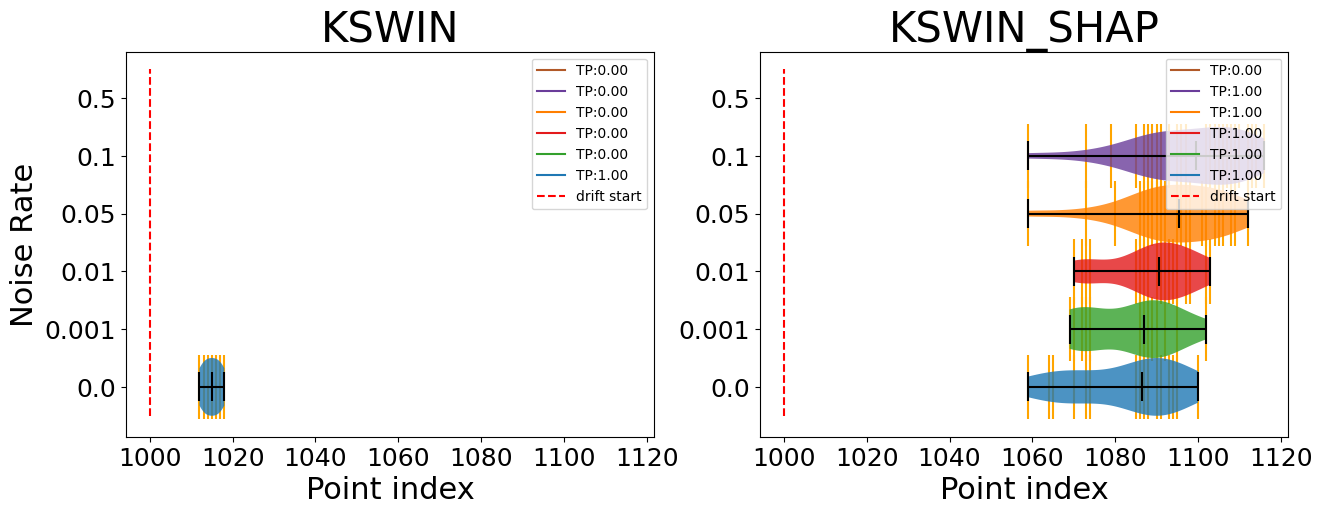

#################### New Drift: ####################
sine1_short
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|adwin_shap_0.0', 'TP:1.00|adwin_shap_0.001', 'TP:1.00|adwin_shap_0.01', 'TP:0.96|adwin_shap_0.05', 'TP:0.98|adwin_shap_0.1', 'TP:0.02|adwin_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine1ADWINnoise_distrib.pdf


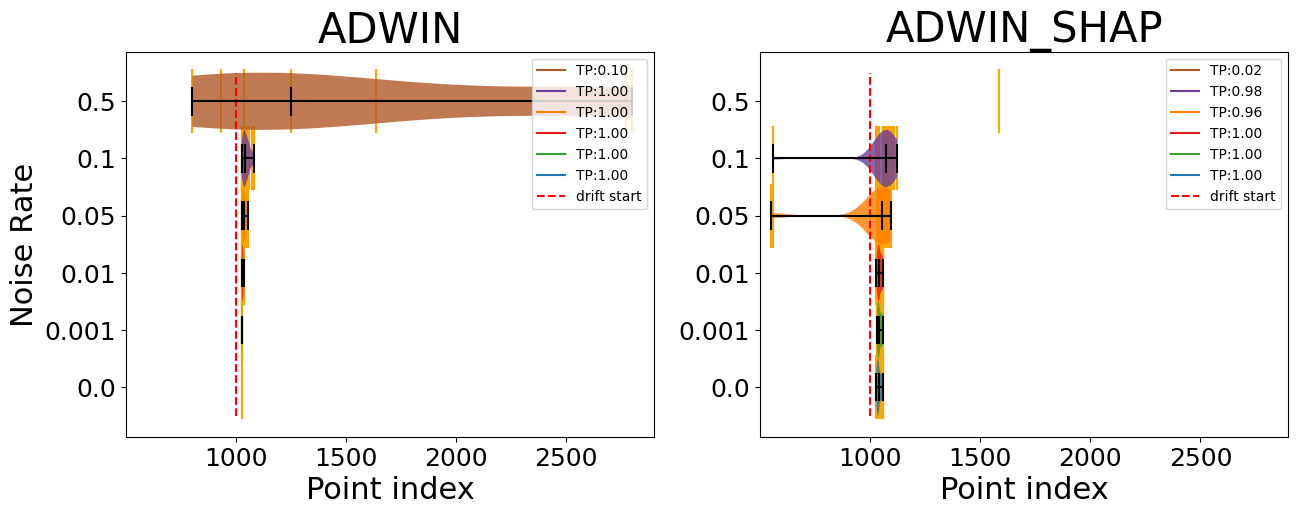

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|PH_shap_0.0', 'TP:1.00|PH_shap_0.001', 'TP:1.00|PH_shap_0.01', 'TP:1.00|PH_shap_0.05', 'TP:1.00|PH_shap_0.1', 'TP:0.14|PH_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine1PHnoise_distrib.pdf


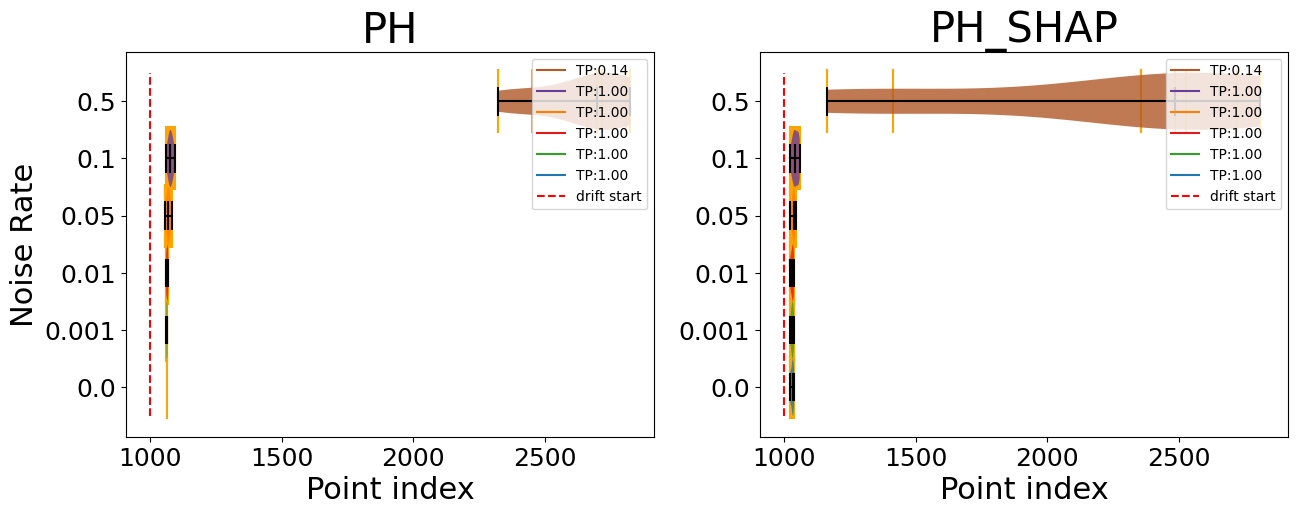

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|KSWIN_shap_0.0', 'TP:1.00|KSWIN_shap_0.001', 'TP:1.00|KSWIN_shap_0.01', 'TP:1.00|KSWIN_shap_0.05', 'TP:1.00|KSWIN_shap_0.1', 'TP:0.00|KSWIN_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine1KSWINnoise_distrib.pdf


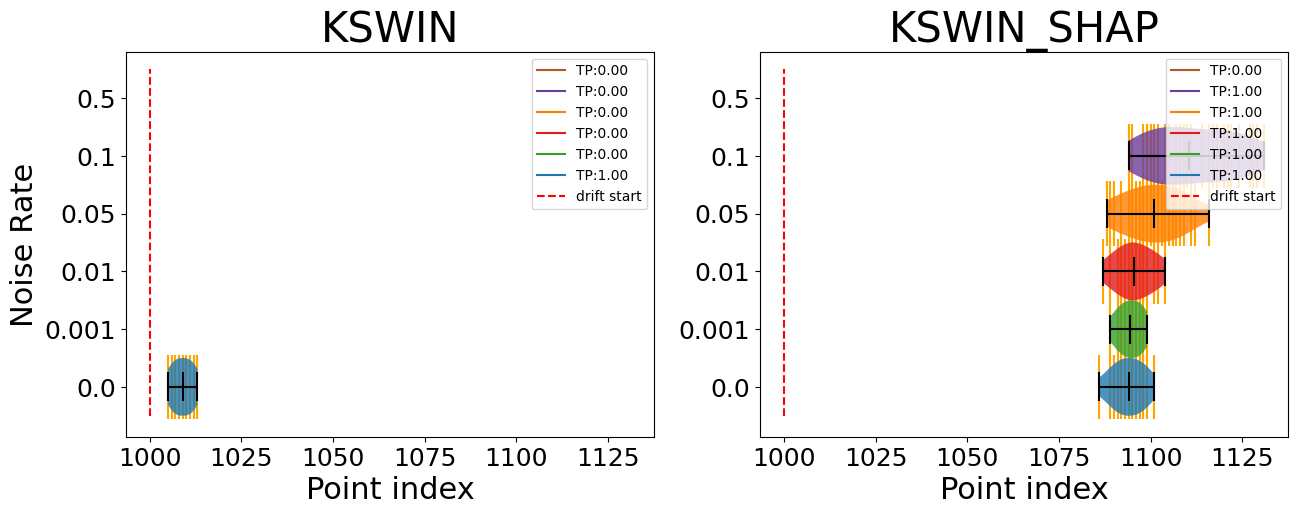

#################### New Drift: ####################
gradual concept drift
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|adwin_shap_0.0', 'TP:1.00|adwin_shap_0.001', 'TP:1.00|adwin_shap_0.01', 'TP:1.00|adwin_shap_0.05', 'TP:1.00|adwin_shap_0.1', 'TP:0.00|adwin_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/gradual_concept_driftADWINnoise_distrib.pdf


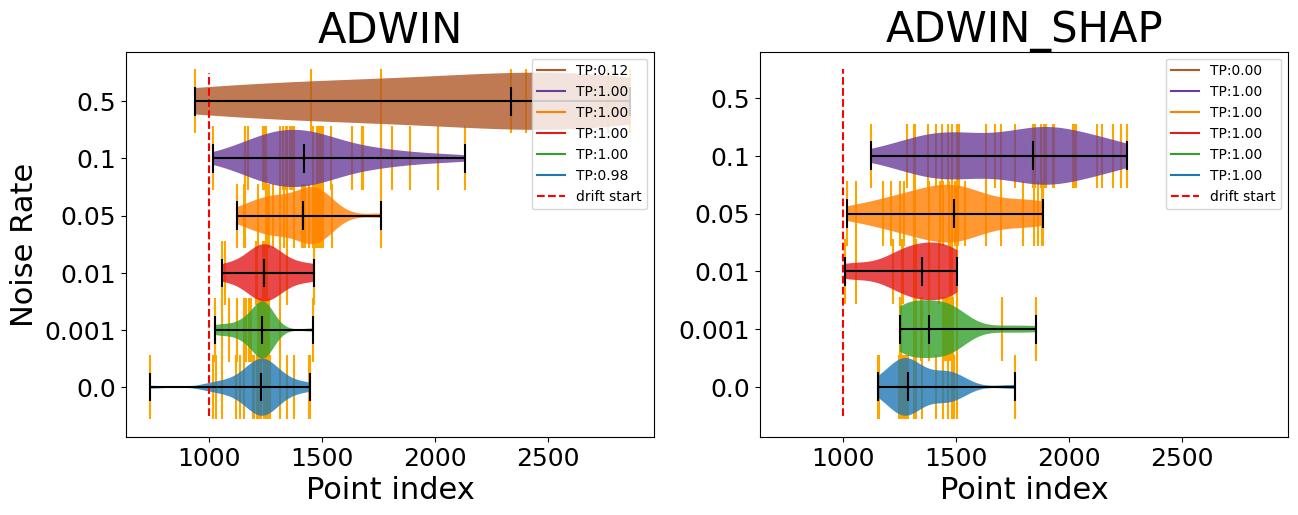

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:1.00|PH_shap_0.0', 'TP:1.00|PH_shap_0.001', 'TP:1.00|PH_shap_0.01', 'TP:1.00|PH_shap_0.05', 'TP:0.92|PH_shap_0.1', 'TP:0.00|PH_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/gradual_concept_driftPHnoise_distrib.pdf


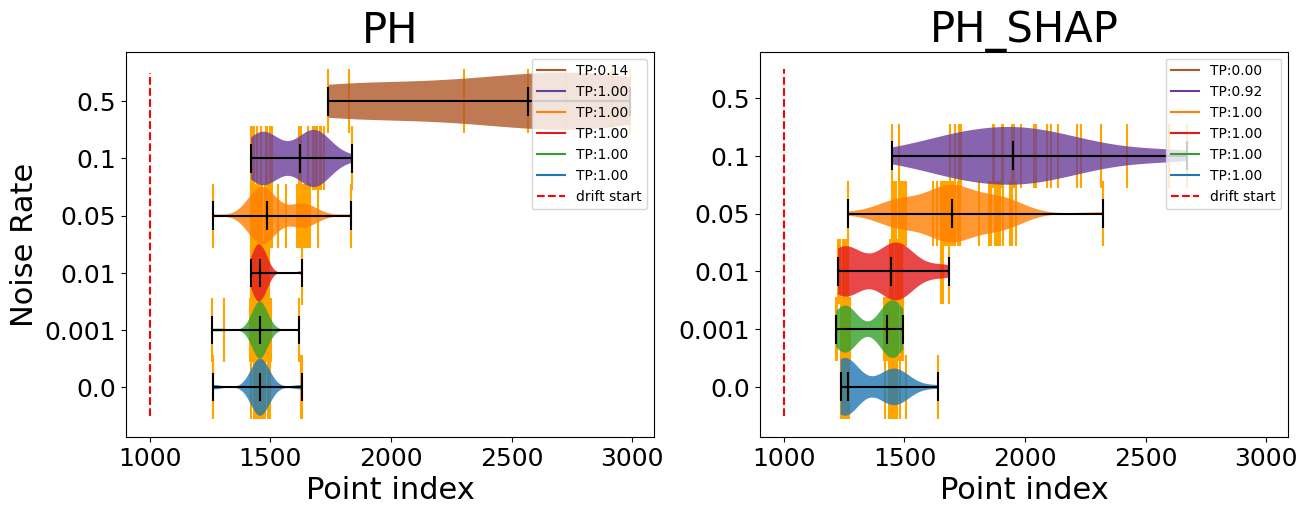

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['drift start', 'TP:0.12|KSWIN_shap_0.0', 'TP:0.14|KSWIN_shap_0.001', 'TP:0.12|KSWIN_shap_0.01', 'TP:0.02|KSWIN_shap_0.05', 'TP:0.06|KSWIN_shap_0.1', 'TP:0.00|KSWIN_shap_0.5']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/gradual_concept_driftKSWINnoise_distrib.pdf


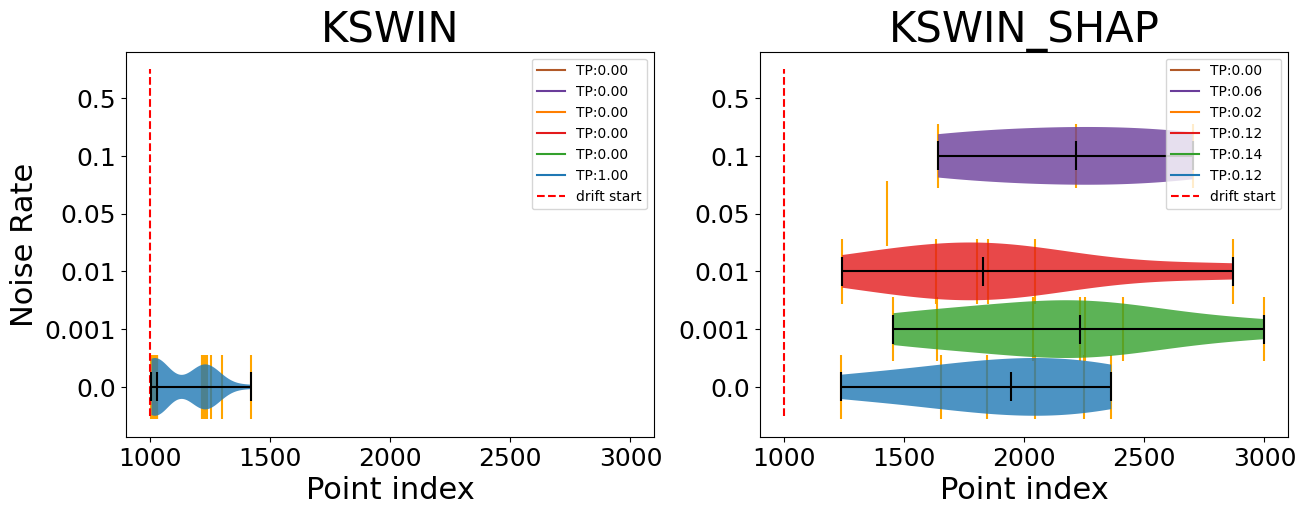

In [60]:
for d_name in ["mooth_concept_drif", "abrupt_concept_drif", "abrupt_covariate_drif", "sine2","sine1","gradual"]:#,"stagger"][:]:
    single_drift = [f for f in list_df_generate_fcts if d_name in f.__name__]
    print("#"*20,"New Drift:","#"*20)
    D_G = single_drift[0]()
    print(D_G.drift_name)
    for selected_methods in [["ADWIN"],["PH"],["KSWIN"]]:
        fig, ax = plot_violins_shap_noise(single_drift, D_G, selected_methods, results, path=results_path+"/")
        save_path = os.environ.get("FIGURES_PATH")+"_".join(single_drift[0].__name__.split("_")[2:])+selected_methods[0]
        save_path += 'noise_distrib.pdf'
        print(save_path)
        plt.savefig(save_path, bbox_inches='tight')
        plt.show()
        
    

## tighter plot

#################### New Drift: ####################
smooth concept drift
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['0', '500', '1000', '1500', '2000', '2500']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/smooth_concept_driftADWINnoise_distrib_TIGHT.pdf


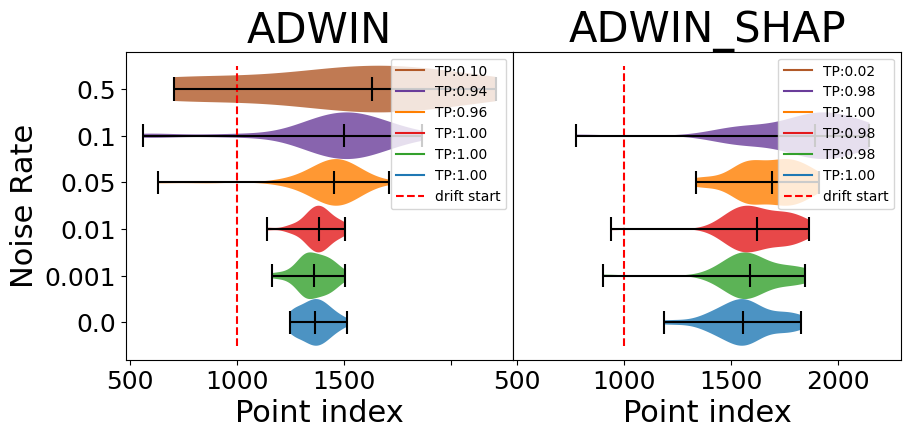

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['500', '1000', '1500', '2000', '2500', '3000', '3500']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/smooth_concept_driftPHnoise_distrib_TIGHT.pdf


FixedFormatter should only be used together with FixedLocator


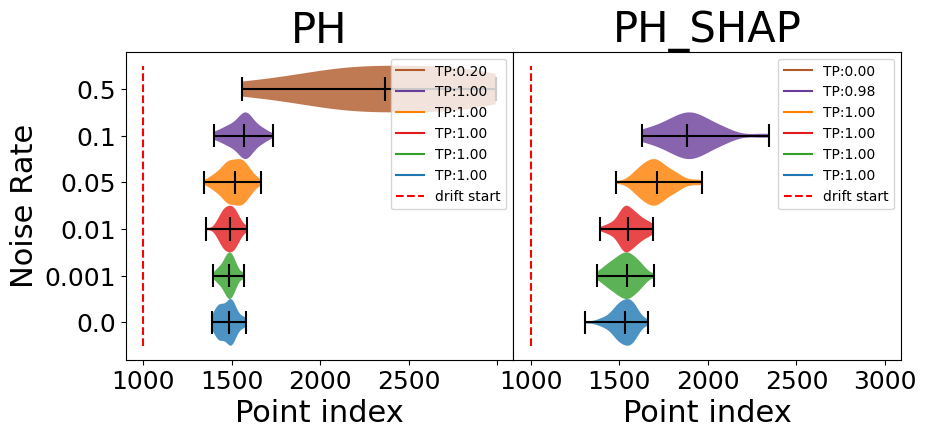

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['500', '1000', '1500', '2000', '2500', '3000']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/smooth_concept_driftKSWINnoise_distrib_TIGHT.pdf


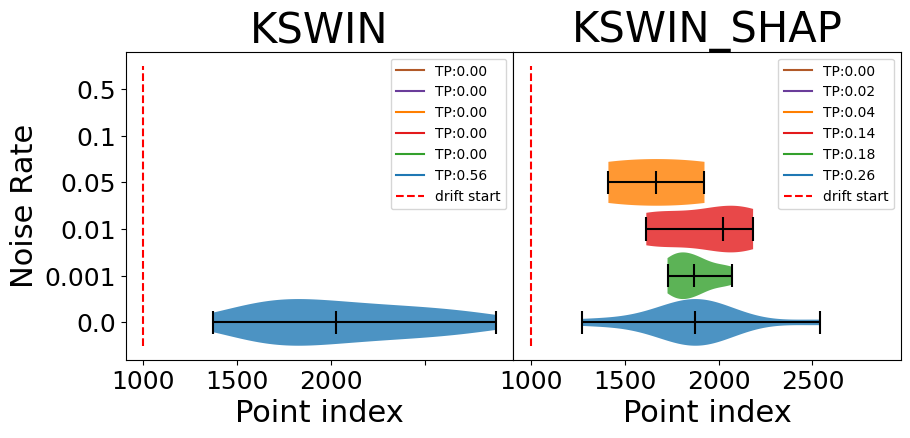

#################### New Drift: ####################
abrupt concept drift
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['0', '1000', '2000', '3000', '4000']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_concept_driftADWINnoise_distrib_TIGHT.pdf


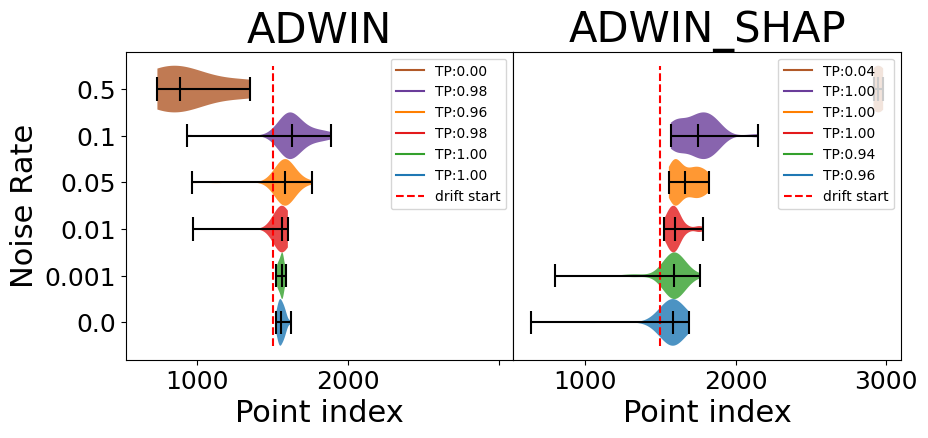

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator


['1000', '1500', '2000', '2500', '3000', '3500']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_concept_driftPHnoise_distrib_TIGHT.pdf


FixedFormatter should only be used together with FixedLocator


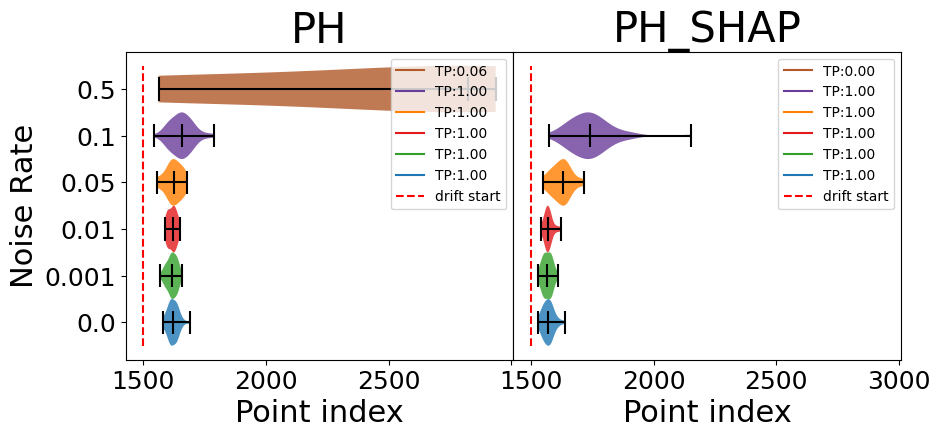

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['1400', '1600', '1800', '2000', '2200', '2400', '2600']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_concept_driftKSWINnoise_distrib_TIGHT.pdf


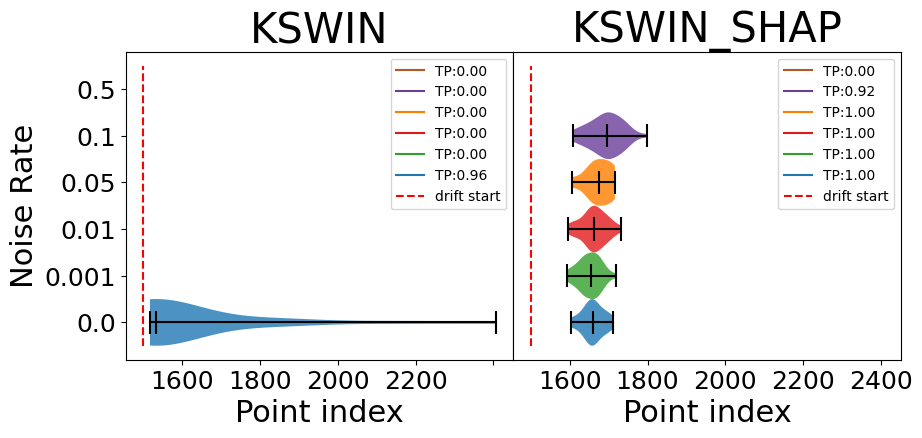

#################### New Drift: ####################
abrupt covariate
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['0', '1000', '2000', '3000', '4000']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_covariate_driftADWINnoise_distrib_TIGHT.pdf


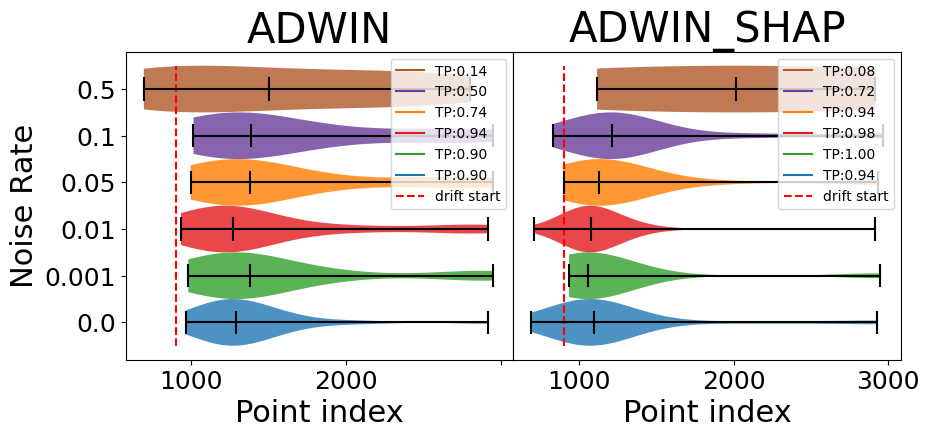

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['500', '1000', '1500', '2000', '2500', '3000', '3500']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_covariate_driftPHnoise_distrib_TIGHT.pdf


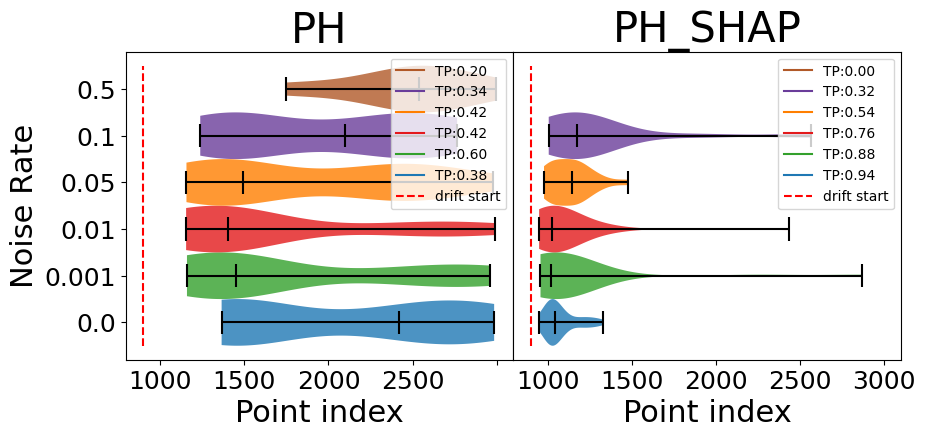

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['800', '1000', '1200', '1400', '1600', '1800', '2000']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/abrupt_covariate_driftKSWINnoise_distrib_TIGHT.pdf


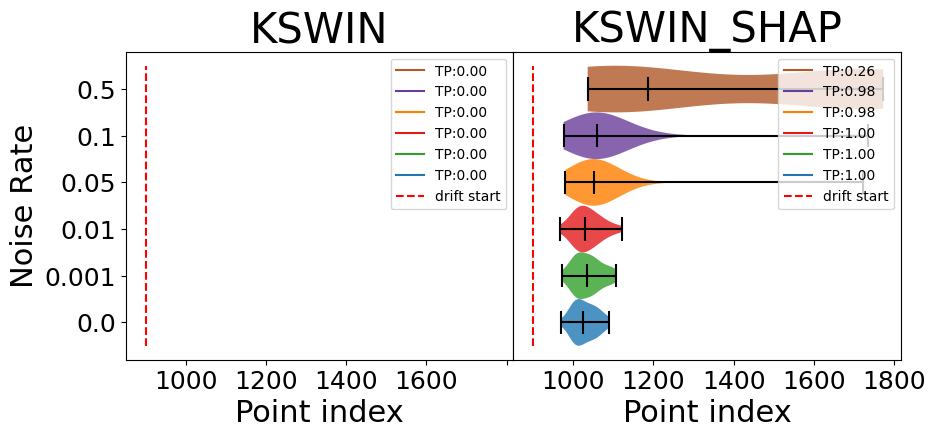

#################### New Drift: ####################
sine2_short
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['500', '1000', '1500', '2000', '2500']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine2ADWINnoise_distrib_TIGHT.pdf


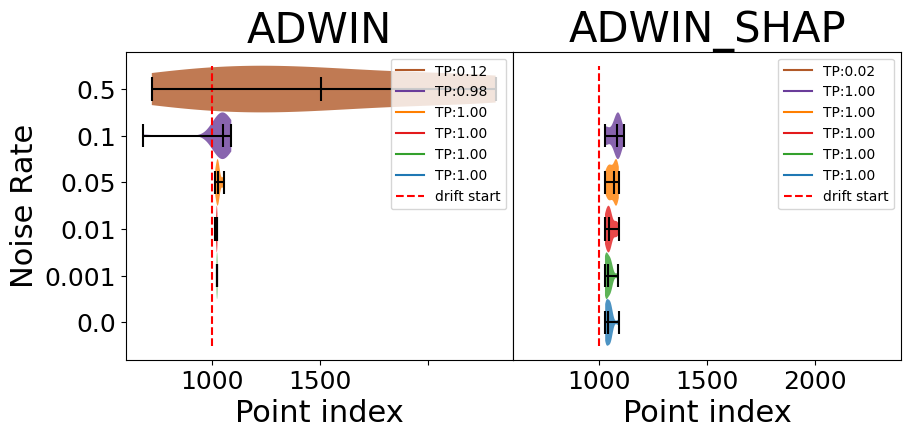

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['500', '1000', '1500', '2000', '2500', '3000']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine2PHnoise_distrib_TIGHT.pdf


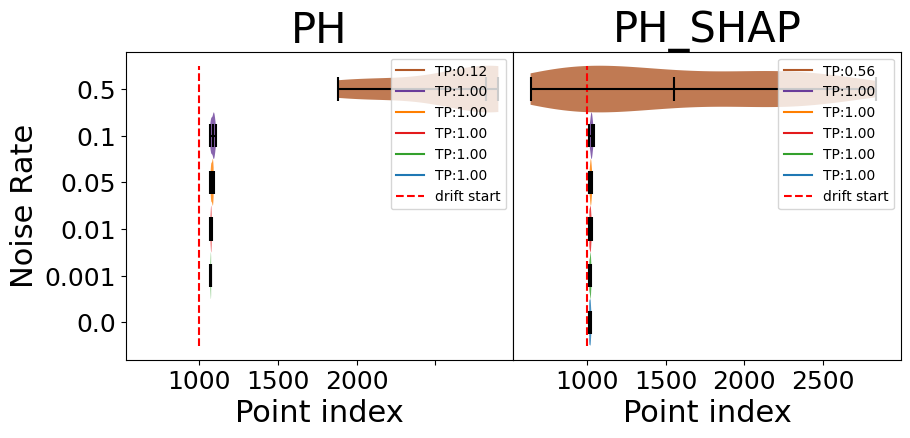

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['950', '1000', '1050', '1100', '1150']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine2KSWINnoise_distrib_TIGHT.pdf


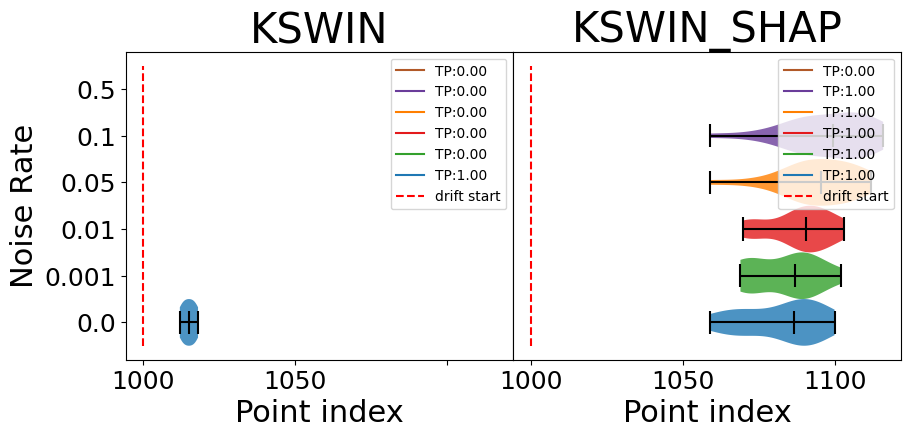

#################### New Drift: ####################
sine1_short
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['500', '1000', '1500', '2000', '2500', '3000']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine1ADWINnoise_distrib_TIGHT.pdf


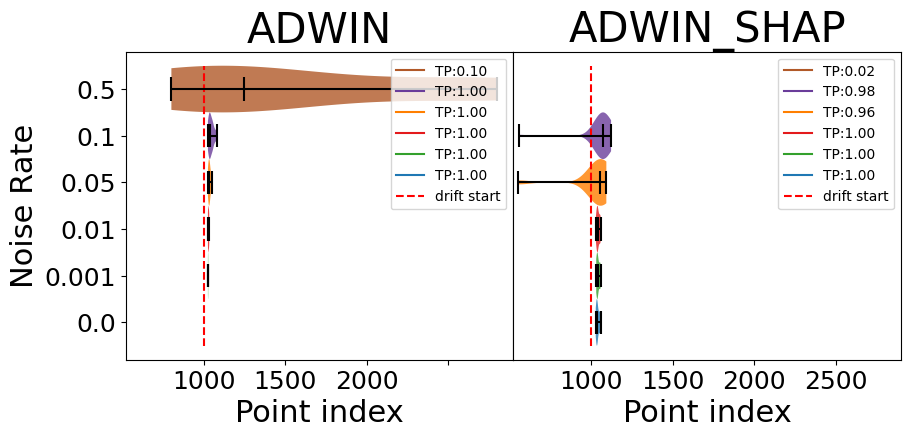

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['500', '1000', '1500', '2000', '2500', '3000']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine1PHnoise_distrib_TIGHT.pdf


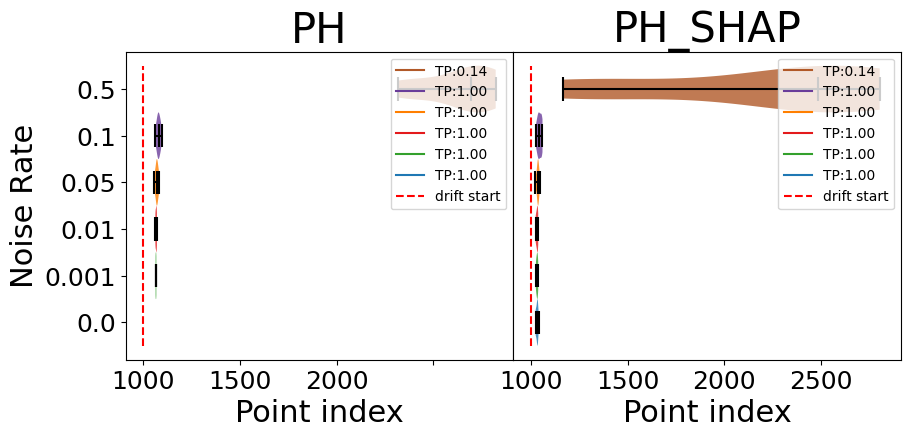

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['950', '1000', '1050', '1100', '1150']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine1KSWINnoise_distrib_TIGHT.pdf


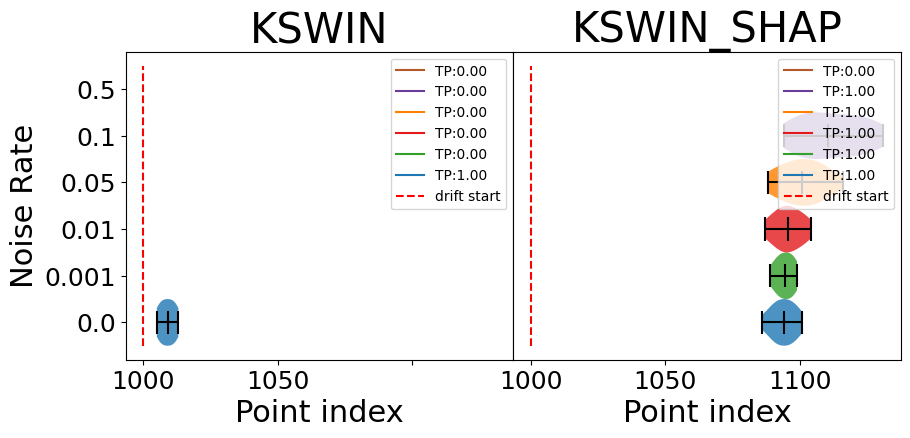

#################### New Drift: ####################
gradual concept drift
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['500', '1000', '1500', '2000', '2500', '3000']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/gradual_concept_driftADWINnoise_distrib_TIGHT.pdf


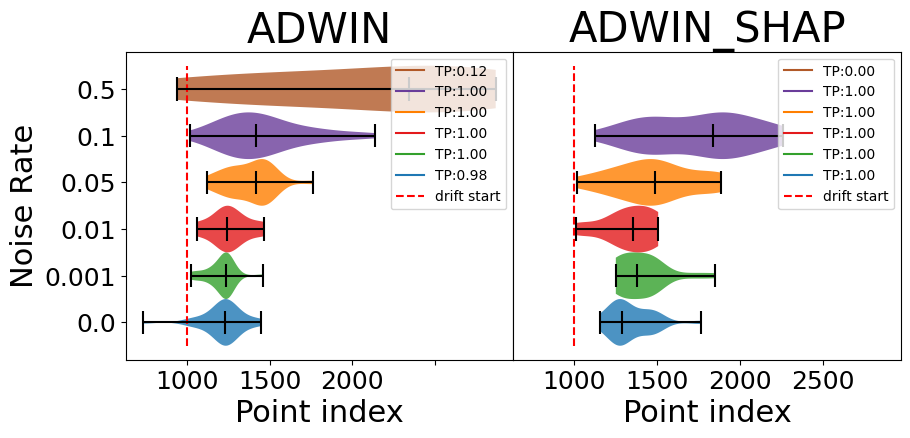

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['500', '1000', '1500', '2000', '2500', '3000', '3500']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/gradual_concept_driftPHnoise_distrib_TIGHT.pdf


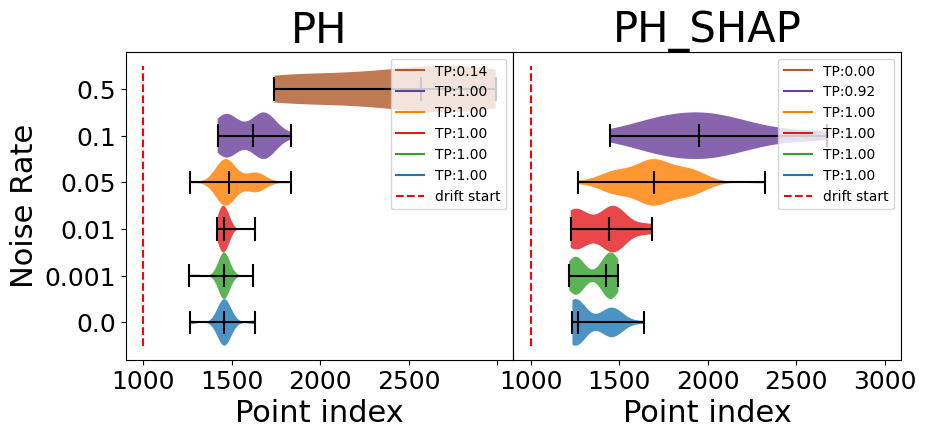

[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]
[(50, 2)]


invalid value encountered in scalar divide
invalid value encountered in scalar divide
FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


['500', '1000', '1500', '2000', '2500', '3000', '3500']
/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/gradual_concept_driftKSWINnoise_distrib_TIGHT.pdf


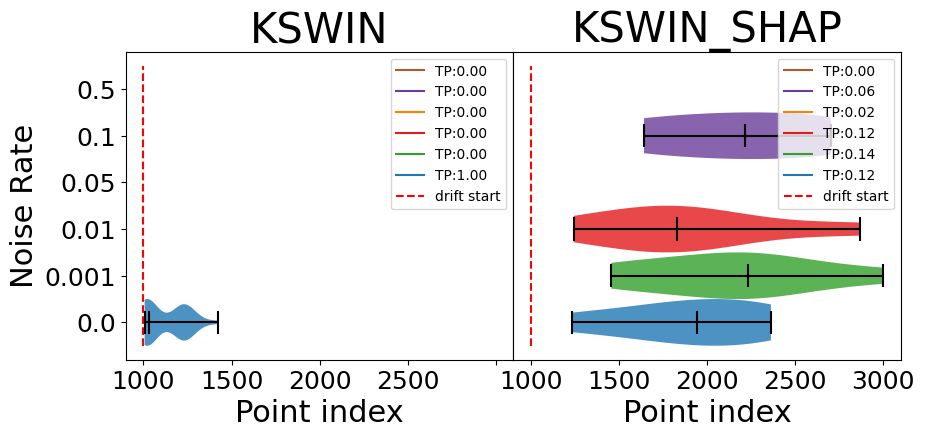

In [69]:
for d_name in ["mooth_concept_drif", "abrupt_concept_drif", "abrupt_covariate_drif", "sine2","sine1","gradual"]:
    single_drift = [f for f in list_df_generate_fcts if d_name in f.__name__]
    print("#"*20,"New Drift:","#"*20)
    D_G = single_drift[0]()
    print(D_G.drift_name)
    for selected_methods in [["ADWIN"],["PH"],["KSWIN"]]:
        fig, ax = plot_violins_shap_noise_TIGHT(single_drift, D_G, selected_methods, results, path=results_path+"/")

        save_path = os.environ.get("FIGURES_PATH")+"_".join(single_drift[0].__name__.split("_")[2:])+selected_methods[0]
        save_path += 'noise_distrib_TIGHT.pdf'
        print(save_path)
        plt.savefig(save_path, bbox_inches='tight')
        plt.show()
        
    

# Single drift scenario single detector

In [62]:
selected_methods = ["KSWIN"]#['ADWIN', 'PH', 'KSWIN']

In [63]:

D_G = list_df_generate_fcts[2]()
print(D_G.drift_name, "#"*20)
df_results_dataset, sep_bar_indexes = get_df_detections(D_G, results,
                                                        selected_methods, exp_type="df_reset", path=results_path+"/")

sine2_short ####################
[(50, 2)]


In [64]:
for col in  ["retrain_PH_loss","retrain_KSWIN_0","retrain_KSWIN.", "retrain_adwin_loss"]:
    for real_col in df_results_dataset.columns:
        if(col in real_col):
            df_results_dataset = df_results_dataset.drop(columns=[real_col])
            print(f"{real_col} dropped")

In [65]:
#TODO: Add metrics name before labels

In [66]:
df_results_dataset.columns = [x.replace("_loss","") for x in df_results_dataset.columns]

/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine2_shortnoisy_KSWIN_compare.pdf


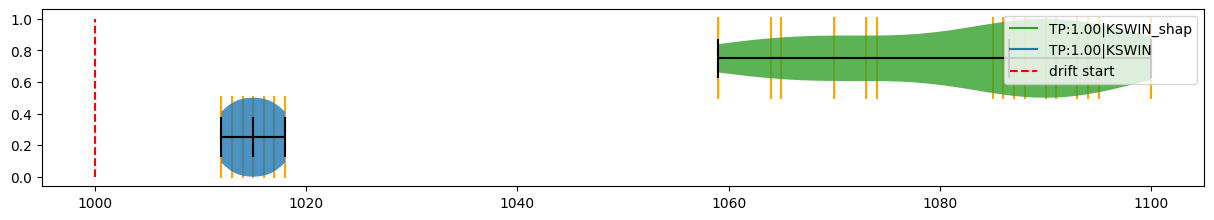

In [67]:
ax = plot_violins(D_G, df_results_dataset.iloc[:,:], ax=None, sep_bar_indexes=sep_bar_indexes, separate_true_false=False);
#ax.set_xlim(800,1150)


#plt.legend([])
save_path = os.environ.get("FIGURES_PATH")+D_G.drift_name.replace(" ","_")
save_path += 'noisy_'+selected_methods[0]+'_compare.pdf'
print(save_path)
plt.savefig(save_path, bbox_inches='tight')
plt.show()

/home/bastienzim/Documents/ShapleyDirs/Shap-Adwin/figures/sine2_shortnoisy_KSWIN_compare.pdf


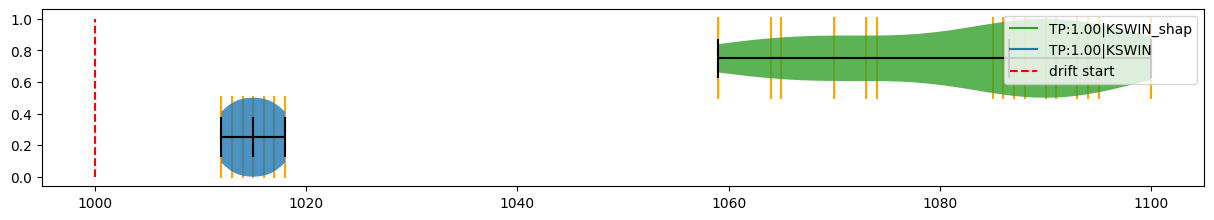

In [68]:
ax = plot_violins(D_G, df_results_dataset.iloc[:,:], ax=None, sep_bar_indexes=sep_bar_indexes, separate_true_false=False);
#ax.set_xlim(800,1150)


#plt.legend([])
save_path = os.environ.get("FIGURES_PATH")+D_G.drift_name.replace(" ","_")
save_path += 'noisy_'+selected_methods[0]+'_compare.pdf'
print(save_path)
plt.savefig(save_path, bbox_inches='tight')
plt.show()